<a href="https://colab.research.google.com/github/StickMonkey615/JHCSMod4/blob/main/ANN%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Guidance

This notebook is a template for module 4b and 4c, which will be tested in Google Colab, your code needs to run there.
The structure has been provided to improve consistency and make it easier for markers to understand your code but still give students the flexibility to be creative.  You need to populate the required functions to solve this problem.  All dependencies should be documented in the next cell.

You can:
    add further cells or text blocks to extend or further explain your solution
    add further functions

Dont:
    rename functions
   

In [92]:
# Fixed dependencies - do not remove or change.
import pytest
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/gdrive/')
# Import your dependencies
!pip install --upgrade xlrd > 1.2.0
import xlrd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
import keras

In [93]:
# Import data

def import_local_data(file_path):
    """This function needs to import the data file into collab and return a pandas dataframe
    """
    raw_df = pd.read_excel(file_path)
    return raw_df

In [94]:
local_file_path = "breast-cancer.xls"

In [95]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

In [96]:
# Look at the different dataframe column headings
print(raw_data.columns)

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')


In [97]:
# Determine data types for each column
for i in range(0, len(raw_data.columns)):
    print(type(raw_data.values[1][i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [98]:
#Look at the range of values for each field
from collections import Counter
rng_vals=[]
for i in range(0,len(raw_data.columns)):
    rng_vals.append(Counter(raw_data.iloc[:,i].values))
    print(f"{raw_data.columns[i]}: {rng_vals[i]}")
del rng_vals, i

age: Counter({'50-59': 96, '40-49': 90, '60-69': 57, '30-39': 36, '70-79': 6, '20-29': 1})
menopause: Counter({'premeno': 150, 'ge40': 129, 'lt40': 7})
tumor-size: Counter({'30-34': 60, '25-29': 54, '20-24': 50, '15-19': 30, datetime.datetime(2014, 10, 1, 0, 0): 28, '40-44': 22, '35-39': 19, '0-4': 8, '50-54': 8, datetime.datetime(2019, 9, 5, 0, 0): 4, '45-49': 3})
inv-nodes: Counter({'0-2': 213, datetime.datetime(2019, 5, 3, 0, 0): 36, datetime.datetime(2019, 8, 6, 0, 0): 17, datetime.datetime(2019, 11, 9, 0, 0): 10, '15-17': 6, datetime.datetime(2014, 12, 1, 0, 0): 3, '24-26': 1})
node-caps: Counter({'no': 222, 'yes': 56, '?': 8})
deg-malig: Counter({2: 130, 3: 85, 1: 71})
breast: Counter({'left': 152, 'right': 134})
breast-quad: Counter({'left_low': 110, 'left_up': 97, 'right_up': 33, 'right_low': 24, 'central': 21, '?': 1})
irradiat: Counter({'no': 218, 'yes': 68})
Class: Counter({'no-recurrence-events': 201, 'recurrence-events': 85})


**All fields look to contain data that is catagorical in nature.**

**Some contain data that appears erroneous:**
 
*   **'tumor-size' and 'inv-nodes' appear to contain some data in a datetime format and some in string.**
*   **'node-caps' and 'breast-quad' contain Question Marks.**

**Need a way to address these erroneous data inputs.**



In [99]:
# Look in more detail at the columns with datetime data.
print(raw_data.iloc[:, 2].values)

['15-19' '15-19' '35-39' '35-39' '30-34' '25-29' '40-44'
 datetime.datetime(2014, 10, 1, 0, 0) '0-4' '40-44' '25-29' '15-19'
 '30-34' '25-29' '25-29' '20-24' datetime.datetime(2014, 10, 1, 0, 0)
 '15-19' '40-44' '20-24' '20-24' '40-44' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) datetime.datetime(2014, 10, 1, 0, 0)
 '30-34' '15-19' '30-34' '25-29' '25-29' '20-24' '30-34' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '45-49' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) '35-39' '35-39' '25-29' '20-24'
 '15-19' '30-34' datetime.datetime(2014, 10, 1, 0, 0) '35-39' '50-54'
 '40-44' '15-19' '30-34' '0-4' '40-44' '25-29' '25-29' '20-24' '35-39'
 '50-54' '0-4' '40-44' '30-34' '20-24' '30-34' '20-24' '15-19' '25-29'
 '15-19' '50-54' datetime.datetime(2014, 10, 1, 0, 0) '25-29' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '30-34' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '25-29' '25-29' '30-34'
 '15-19' '25-29' '30-34' '15-19'

In [100]:
# Look at output data
raw_data['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

Only 2 possible outputs, thus needs converting to binary format for use in classifier models.

In [101]:
# Check output balance
out = raw_data.iloc[:, -1].values
no_rows = len(raw_data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
code_rows = le.fit_transform(out)
print("True outputs: {:.2f} %".format(sum(code_rows)/len(raw_data)*100))
pos = sum(code_rows)
neg = len(raw_data)-sum(code_rows)
del out, no_rows, le, code_rows

True outputs: 29.72 %


Clear imbalance between output data. Some degree of bias/weighting/sampling will be required to ensure that results accurately predict outcomes for both True and False outcomes.

In [102]:
# Explain your key findings

**Data set is made up of 9 independent variables all of which appear catagorical in nature. Although stored as an integer, 'deg-malig' can be viewed as  catagorical data as it can only contain 3 discrete values.**

**The inclusion of datetime data entries in both the 'tumor-size' and 'inv-nodes' fields appears to be caused by a formatting entry within Excel. For example, '10-14' being input erroneously as 10/14 thus Excel has interpreted (and converted) it to the datetime field 01/10/2014. A function will need to be written within the model to convert these back to correct format.**

**How to deal with '?' entries in fields that are otherwise boolean poses an interesting dilemma. If these are infact meant to signify that the presence is unknown because no diagnostic work has been conducted, then this woiuld signify a valid dat entry. If it is however just an incomplete data entry then there is a risk its inclusion could skew the model results. Without knowing which it seems wisest to remove this data from the dataset. Removal of the entire field could well deprive the model of important information, thus just removing these specific entries (rows) appears the most sensible option, particularly noting that there are relatively few occurences.**

**Data set is imbalanced, with dependent variable outputs only True in 30% of instances. The model applied will require this imbalance to be taken into account so as not to sacrifice results predicting this smaller class (surely the aim of cancer diagnosis) so as to achieve a high accuracy figure.**

**Output variable will need converting into binary output for use with a binary classification model.**

Create any data pre-processing that you will conduct on seen and unseen data.  Regardless of the model you use, this dataframe must contain only numeric features and have a strategy for any expected missing values. Any objects can that are needed to handle the test data that are dependent on the training data can be stored in the model class.  You are recommended to use sklearn Pipelines or similar functionality to ensure reproducibility.

In [103]:
# Correct date types in 'tumor-size' and 'inv-nodes' variables
for i in range(0, len(raw_data)):
    if type(raw_data['tumor-size'][i]) is not str:
        if raw_data['tumor-size'][i].day == 1:
            raw_data['tumor-size'][i] = str(raw_data['tumor-size'][i].month) +'-' + str(raw_data['tumor-size'][i].year-2000)
        else:
            raw_data['tumor-size'][i] = str(raw_data['tumor-size'][i].day) + '-' + str(raw_data['tumor-size'][i].month)
    if type(raw_data['inv-nodes'][i]) is not str:
        if raw_data['inv-nodes'][i].day == 1:
            raw_data['inv-nodes'][i] = str(raw_data['inv-nodes'][i].month) + '-' + str(raw_data['inv-nodes'][i].year-2000)
        else:
            raw_data['inv-nodes'][i] = str(raw_data['inv-nodes'][i].day) + '-' + str(raw_data['inv-nodes'][i].month)        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Settin

In [104]:
# Remove all rows containing ? data
indx = raw_data[raw_data.isin(['?'])].stack(dropna=True).unstack().index
print(f"indx: {indx}")
raw_data = raw_data.drop(index=indx)

indx: Int64Index([20, 31, 50, 54, 71, 92, 149, 240, 264], dtype='int64')


In [105]:
# Split your data so that you can test the effectiveness of your model
# Split the data into a Training set and a Test set
dfs = np.split(raw_data, [len(raw_data.columns)-1], axis=1)
X = dfs[0]
y = dfs[1]

# Handle categorical values and drop dummy variable
# Remove non-categorical data
dm = X.pop('deg-malig')
# Encode the catagorical data (dummy variables)
proc_X = pd.get_dummies(data=X, prefix_sep='_', drop_first=True)
# Add back in non-categorical data
proc_X.insert(0, 'deg-malig', dm)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(proc_X, y, test_size = 0.25, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [106]:
# Populate preprocess_training_data and preprocess_test_data to preprocess data.
# You must process test and train separately so your model does not accidently gain information that a model wouldnt have in reality and therefore get better predictions

In [107]:
class Module4_Model:
    
    def __init__(self):
        self.model = None
        self.metrics = [
            keras.metrics.TruePositives(name='tp'),
            keras.metrics.FalsePositives(name='fp'),
            keras.metrics.TrueNegatives(name='tn'),
            keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='accuracy'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.Precision(name='precision'),
        ]
        self.EPOCHS = 500
        self.BATCH = 100
        self.THR = 0.3
        self.stop_crit = keras.callbacks.EarlyStopping(
            monitor='val_prc',
            verbose=1,
            patience=10,
            mode='max',
            restore_best_weights=True)

    def preprocess_training_data(self, training_df):
        """
        This function should process the training data and store any features
        required in the class
        """         
        # Apply feature scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        processed_df = sc.fit_transform(training_df)
        return processed_df, sc

    def preprocess_test_data(self, test_df):
        """
        This function should process the test data and store any features
        required in the class
        """
        # Apply feature scaling
        processed_df = self.scalar.transform(test_df)
        return processed_df

    def make_model(self,X_train_processed,output_bias=None):
        if output_bias is not None:
            output_bias = keras.initializers.Constant(output_bias)
        self.model = keras.Sequential([
            keras.layers.Dense(16,
                              activation='relu',
                              input_shape=(X_train_processed.shape[-1],)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(1,
                               activation='sigmoid',
                               bias_initializer=output_bias)
            ])
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                           loss=keras.losses.BinaryCrossentropy(),
                           metrics=self.metrics)


In [108]:
# Dont change
my_model = Module4_Model()

In [109]:
# Dont change
x_train_processed, my_model.scalar = my_model.preprocess_training_data(X_train)
x_val_processed = my_model.preprocess_test_data(X_val)

In [110]:
# Encode the output data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = pd.DataFrame(lb.fit_transform(y_train))
y_val = pd.DataFrame(lb.transform(y_val))
y_test = pd.DataFrame(lb.transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
# Create a model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ELU,PReLU,Dropout

#classifier = Sequential()
#first hidden layer
#classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=31))
#second hidden layer
#classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
#classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [112]:
#classifier.summary()

In [113]:
#compiling the ANN
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
my_model.make_model(x_train_processed,np.log([pos/neg]))
my_model.model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                512       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [114]:
# Dont change
x_test_processed = my_model.preprocess_test_data(X_test)

In [115]:
# Train your model
# Fitting the ANN to the training set
my_model.model.fit(x_train_processed,
                   y_train,
                   batch_size=my_model.BATCH,
                   epochs=my_model.EPOCHS,
                   callbacks=[my_model.stop_crit],
                   validation_data=(x_val_processed,y_val))

Epoch 1/500
1/2 [==============>...............] - ETA: 1s - loss: 0.7538 - tp: 8.0000 - fp: 19.0000 - tn: 53.0000 - fn: 20.0000 - accuracy: 0.6100 - recall: 0.2857 - precision: 0.2963

2/2 [==============================] - 3s 811ms/step - loss: 0.7962 - tp: 10.0000 - fp: 31.0000 - tn: 87.0000 - fn: 37.0000 - accuracy: 0.5879 - recall: 0.2128 - precision: 0.2439 - val_loss: 0.5907 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8273 - tp: 6.0000 - fp: 19.0000 - tn: 52.0000 - fn: 23.0000 - accuracy: 0.5800 - recall: 0.2069 - precision: 0.2400

2/2 [==============================] - 0s 34ms/step - loss: 0.7953 - tp: 9.0000 - fp: 27.0000 - tn: 91.0000 - fn: 38.0000 - accuracy: 0.6061 - recall: 0.1915 - precision: 0.2500 - val_loss: 0.5900 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7104 - tp: 5.0000 - fp: 11.0000 - tn: 60.0000 - fn: 24.0000 - accuracy: 0.6500 - recall: 0.1724 - precision: 0.3125

2/2 [==============================] - 0s 35ms/step - loss: 0.7540 - tp: 11.0000 - fp: 25.0000 - tn: 93.0000 - fn: 36.0000 - accuracy: 0.6303 - recall: 0.2340 - precision: 0.3056 - val_loss: 0.5897 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6138 - tp: 12.0000 - fp: 8.0000 - tn: 62.0000 - fn: 18.0000 - accuracy: 0.7400 - recall: 0.4000 - precision: 0.6000

2/2 [==============================] - 0s 34ms/step - loss: 0.6835 - tp: 15.0000 - fp: 17.0000 - tn: 101.0000 - fn: 32.0000 - accuracy: 0.7030 - recall: 0.3191 - precision: 0.4688 - val_loss: 0.5898 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7539 - tp: 4.0000 - fp: 11.0000 - tn: 63.0000 - fn: 22.0000 - accuracy: 0.6700 - recall: 0.1538 - precision: 0.2667

2/2 [==============================] - 0s 42ms/step - loss: 0.7893 - tp: 8.0000 - fp: 20.0000 - tn: 98.0000 - fn: 39.0000 - accuracy: 0.6424 - recall: 0.1702 - precision: 0.2857 - val_loss: 0.5898 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8378 - tp: 5.0000 - fp: 12.0000 - tn: 57.0000 - fn: 26.0000 - accuracy: 0.6200 - recall: 0.1613 - precision: 0.2941

2/2 [==============================] - 0s 39ms/step - loss: 0.7855 - tp: 7.0000 - fp: 21.0000 - tn: 97.0000 - fn: 40.0000 - accuracy: 0.6303 - recall: 0.1489 - precision: 0.2500 - val_loss: 0.5900 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7062 - tp: 8.0000 - fp: 15.0000 - tn: 58.0000 - fn: 19.0000 - accuracy: 0.6600 - recall: 0.2963 - precision: 0.3478

2/2 [==============================] - 0s 67ms/step - loss: 0.7433 - tp: 10.0000 - fp: 23.0000 - tn: 95.0000 - fn: 37.0000 - accuracy: 0.6364 - recall: 0.2128 - precision: 0.3030 - val_loss: 0.5902 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7245 - tp: 7.0000 - fp: 13.0000 - tn: 56.0000 - fn: 24.0000 - accuracy: 0.6300 - recall: 0.2258 - precision: 0.3500

2/2 [==============================] - 0s 50ms/step - loss: 0.6703 - tp: 12.0000 - fp: 23.0000 - tn: 95.0000 - fn: 35.0000 - accuracy: 0.6485 - recall: 0.2553 - precision: 0.3429 - val_loss: 0.5902 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8347 - tp: 4.0000 - fp: 14.0000 - tn: 57.0000 - fn: 25.0000 - accuracy: 0.6100 - recall: 0.1379 - precision: 0.2222

2/2 [==============================] - 0s 44ms/step - loss: 0.8066 - tp: 8.0000 - fp: 25.0000 - tn: 93.0000 - fn: 39.0000 - accuracy: 0.6121 - recall: 0.1702 - precision: 0.2424 - val_loss: 0.5902 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5616 - tp: 7.0000 - fp: 11.0000 - tn: 63.0000 - fn: 19.0000 - accuracy: 0.7000 - recall: 0.2692 - precision: 0.3889

2/2 [==============================] - 0s 39ms/step - loss: 0.6746 - tp: 13.0000 - fp: 17.0000 - tn: 101.0000 - fn: 34.0000 - accuracy: 0.6909 - recall: 0.2766 - precision: 0.4333 - val_loss: 0.5902 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6502 - tp: 6.0000 - fp: 11.0000 - tn: 60.0000 - fn: 23.0000 - accuracy: 0.6600 - recall: 0.2069 - precision: 0.3529

2/2 [==============================] - 0s 40ms/step - loss: 0.6933 - tp: 8.0000 - fp: 17.0000 - tn: 101.0000 - fn: 39.0000 - accuracy: 0.6606 - recall: 0.1702 - precision: 0.3200 - val_loss: 0.5901 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6798 - tp: 6.0000 - fp: 8.0000 - tn: 60.0000 - fn: 26.0000 - accuracy: 0.6600 - recall: 0.1875 - precision: 0.4286

2/2 [==============================] - 0s 37ms/step - loss: 0.6459 - tp: 12.0000 - fp: 20.0000 - tn: 98.0000 - fn: 35.0000 - accuracy: 0.6667 - recall: 0.2553 - precision: 0.3750 - val_loss: 0.5903 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7607 - tp: 5.0000 - fp: 16.0000 - tn: 56.0000 - fn: 23.0000 - accuracy: 0.6100 - recall: 0.1786 - precision: 0.2381

2/2 [==============================] - 0s 38ms/step - loss: 0.7600 - tp: 10.0000 - fp: 26.0000 - tn: 92.0000 - fn: 37.0000 - accuracy: 0.6182 - recall: 0.2128 - precision: 0.2778 - val_loss: 0.5910 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7737 - tp: 4.0000 - fp: 12.0000 - tn: 62.0000 - fn: 22.0000 - accuracy: 0.6600 - recall: 0.1538 - precision: 0.2500

2/2 [==============================] - 0s 43ms/step - loss: 0.7432 - tp: 12.0000 - fp: 20.0000 - tn: 98.0000 - fn: 35.0000 - accuracy: 0.6667 - recall: 0.2553 - precision: 0.3750 - val_loss: 0.5917 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6076 - tp: 7.0000 - fp: 8.0000 - tn: 67.0000 - fn: 18.0000 - accuracy: 0.7400 - recall: 0.2800 - precision: 0.4667

2/2 [==============================] - 0s 38ms/step - loss: 0.6158 - tp: 13.0000 - fp: 16.0000 - tn: 102.0000 - fn: 34.0000 - accuracy: 0.6970 - recall: 0.2766 - precision: 0.4483 - val_loss: 0.5922 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6679 - tp: 14.0000 - fp: 15.0000 - tn: 54.0000 - fn: 17.0000 - accuracy: 0.6800 - recall: 0.4516 - precision: 0.4828

2/2 [==============================] - 0s 42ms/step - loss: 0.6940 - tp: 14.0000 - fp: 20.0000 - tn: 98.0000 - fn: 33.0000 - accuracy: 0.6788 - recall: 0.2979 - precision: 0.4118 - val_loss: 0.5926 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5620 - tp: 6.0000 - fp: 7.0000 - tn: 71.0000 - fn: 16.0000 - accuracy: 0.7700 - recall: 0.2727 - precision: 0.4615

2/2 [==============================] - 0s 41ms/step - loss: 0.6771 - tp: 11.0000 - fp: 13.0000 - tn: 105.0000 - fn: 36.0000 - accuracy: 0.7030 - recall: 0.2340 - precision: 0.4583 - val_loss: 0.5932 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6848 - tp: 6.0000 - fp: 10.0000 - tn: 62.0000 - fn: 22.0000 - accuracy: 0.6800 - recall: 0.2143 - precision: 0.3750

2/2 [==============================] - 0s 36ms/step - loss: 0.6695 - tp: 11.0000 - fp: 18.0000 - tn: 100.0000 - fn: 36.0000 - accuracy: 0.6727 - recall: 0.2340 - precision: 0.3793 - val_loss: 0.5937 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6402 - tp: 6.0000 - fp: 11.0000 - tn: 60.0000 - fn: 23.0000 - accuracy: 0.6600 - recall: 0.2069 - precision: 0.3529

2/2 [==============================] - 0s 41ms/step - loss: 0.6394 - tp: 11.0000 - fp: 16.0000 - tn: 102.0000 - fn: 36.0000 - accuracy: 0.6848 - recall: 0.2340 - precision: 0.4074 - val_loss: 0.5941 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7805 - tp: 7.0000 - fp: 13.0000 - tn: 54.0000 - fn: 26.0000 - accuracy: 0.6100 - recall: 0.2121 - precision: 0.3500

2/2 [==============================] - 0s 43ms/step - loss: 0.7010 - tp: 11.0000 - fp: 16.0000 - tn: 102.0000 - fn: 36.0000 - accuracy: 0.6848 - recall: 0.2340 - precision: 0.4074 - val_loss: 0.5945 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7036 - tp: 6.0000 - fp: 18.0000 - tn: 52.0000 - fn: 24.0000 - accuracy: 0.5800 - recall: 0.2000 - precision: 0.2500

2/2 [==============================] - 0s 43ms/step - loss: 0.7072 - tp: 11.0000 - fp: 24.0000 - tn: 94.0000 - fn: 36.0000 - accuracy: 0.6364 - recall: 0.2340 - precision: 0.3143 - val_loss: 0.5952 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6153 - tp: 6.0000 - fp: 5.0000 - tn: 66.0000 - fn: 23.0000 - accuracy: 0.7200 - recall: 0.2069 - precision: 0.5455

2/2 [==============================] - 0s 40ms/step - loss: 0.6134 - tp: 10.0000 - fp: 11.0000 - tn: 107.0000 - fn: 37.0000 - accuracy: 0.7091 - recall: 0.2128 - precision: 0.4762 - val_loss: 0.5960 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5839 - tp: 7.0000 - fp: 11.0000 - tn: 64.0000 - fn: 18.0000 - accuracy: 0.7100 - recall: 0.2800 - precision: 0.3889

2/2 [==============================] - 0s 40ms/step - loss: 0.5885 - tp: 15.0000 - fp: 16.0000 - tn: 102.0000 - fn: 32.0000 - accuracy: 0.7091 - recall: 0.3191 - precision: 0.4839 - val_loss: 0.5970 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6195 - tp: 11.0000 - fp: 14.0000 - tn: 58.0000 - fn: 17.0000 - accuracy: 0.6900 - recall: 0.3929 - precision: 0.4400

2/2 [==============================] - 0s 40ms/step - loss: 0.6525 - tp: 16.0000 - fp: 24.0000 - tn: 94.0000 - fn: 31.0000 - accuracy: 0.6667 - recall: 0.3404 - precision: 0.4000 - val_loss: 0.5983 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6719 - tp: 6.0000 - fp: 12.0000 - tn: 60.0000 - fn: 22.0000 - accuracy: 0.6600 - recall: 0.2143 - precision: 0.3333

2/2 [==============================] - 0s 47ms/step - loss: 0.6708 - tp: 13.0000 - fp: 19.0000 - tn: 99.0000 - fn: 34.0000 - accuracy: 0.6788 - recall: 0.2766 - precision: 0.4062 - val_loss: 0.5996 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6432 - tp: 7.0000 - fp: 8.0000 - tn: 64.0000 - fn: 21.0000 - accuracy: 0.7100 - recall: 0.2500 - precision: 0.4667

2/2 [==============================] - 0s 54ms/step - loss: 0.5613 - tp: 13.0000 - fp: 11.0000 - tn: 107.0000 - fn: 34.0000 - accuracy: 0.7273 - recall: 0.2766 - precision: 0.5417 - val_loss: 0.6007 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6231 - tp: 8.0000 - fp: 4.0000 - tn: 64.0000 - fn: 24.0000 - accuracy: 0.7200 - recall: 0.2500 - precision: 0.6667

2/2 [==============================] - 0s 39ms/step - loss: 0.6224 - tp: 13.0000 - fp: 10.0000 - tn: 108.0000 - fn: 34.0000 - accuracy: 0.7333 - recall: 0.2766 - precision: 0.5652 - val_loss: 0.6015 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6016 - tp: 6.0000 - fp: 2.0000 - tn: 72.0000 - fn: 20.0000 - accuracy: 0.7800 - recall: 0.2308 - precision: 0.7500

2/2 [==============================] - 0s 39ms/step - loss: 0.6043 - tp: 10.0000 - fp: 7.0000 - tn: 111.0000 - fn: 37.0000 - accuracy: 0.7333 - recall: 0.2128 - precision: 0.5882 - val_loss: 0.6024 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6756 - tp: 6.0000 - fp: 11.0000 - tn: 61.0000 - fn: 22.0000 - accuracy: 0.6700 - recall: 0.2143 - precision: 0.3529

2/2 [==============================] - 0s 48ms/step - loss: 0.6626 - tp: 11.0000 - fp: 17.0000 - tn: 101.0000 - fn: 36.0000 - accuracy: 0.6788 - recall: 0.2340 - precision: 0.3929 - val_loss: 0.6031 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6120 - tp: 8.0000 - fp: 7.0000 - tn: 64.0000 - fn: 21.0000 - accuracy: 0.7200 - recall: 0.2759 - precision: 0.5333

2/2 [==============================] - 0s 39ms/step - loss: 0.6501 - tp: 12.0000 - fp: 12.0000 - tn: 106.0000 - fn: 35.0000 - accuracy: 0.7152 - recall: 0.2553 - precision: 0.5000 - val_loss: 0.6039 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7014 - tp: 6.0000 - fp: 5.0000 - tn: 64.0000 - fn: 25.0000 - accuracy: 0.7000 - recall: 0.1935 - precision: 0.5455

2/2 [==============================] - 0s 43ms/step - loss: 0.6297 - tp: 11.0000 - fp: 7.0000 - tn: 111.0000 - fn: 36.0000 - accuracy: 0.7394 - recall: 0.2340 - precision: 0.6111 - val_loss: 0.6047 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5509 - tp: 3.0000 - fp: 7.0000 - tn: 67.0000 - fn: 23.0000 - accuracy: 0.7000 - recall: 0.1154 - precision: 0.3000

2/2 [==============================] - 0s 38ms/step - loss: 0.6328 - tp: 7.0000 - fp: 13.0000 - tn: 105.0000 - fn: 40.0000 - accuracy: 0.6788 - recall: 0.1489 - precision: 0.3500 - val_loss: 0.6059 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5782 - tp: 6.0000 - fp: 6.0000 - tn: 64.0000 - fn: 24.0000 - accuracy: 0.7000 - recall: 0.2000 - precision: 0.5000

2/2 [==============================] - 0s 37ms/step - loss: 0.5673 - tp: 11.0000 - fp: 7.0000 - tn: 111.0000 - fn: 36.0000 - accuracy: 0.7394 - recall: 0.2340 - precision: 0.6111 - val_loss: 0.6068 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6354 - tp: 5.0000 - fp: 6.0000 - tn: 67.0000 - fn: 22.0000 - accuracy: 0.7200 - recall: 0.1852 - precision: 0.4545

2/2 [==============================] - 0s 42ms/step - loss: 0.6678 - tp: 10.0000 - fp: 12.0000 - tn: 106.0000 - fn: 37.0000 - accuracy: 0.7030 - recall: 0.2128 - precision: 0.4545 - val_loss: 0.6077 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5115 - tp: 6.0000 - fp: 3.0000 - tn: 72.0000 - fn: 19.0000 - accuracy: 0.7800 - recall: 0.2400 - precision: 0.6667

2/2 [==============================] - 0s 50ms/step - loss: 0.5589 - tp: 13.0000 - fp: 8.0000 - tn: 110.0000 - fn: 34.0000 - accuracy: 0.7455 - recall: 0.2766 - precision: 0.6190 - val_loss: 0.6084 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6229 - tp: 8.0000 - fp: 6.0000 - tn: 68.0000 - fn: 18.0000 - accuracy: 0.7600 - recall: 0.3077 - precision: 0.5714

2/2 [==============================] - 0s 39ms/step - loss: 0.5797 - tp: 14.0000 - fp: 8.0000 - tn: 110.0000 - fn: 33.0000 - accuracy: 0.7515 - recall: 0.2979 - precision: 0.6364 - val_loss: 0.6091 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6097 - tp: 7.0000 - fp: 6.0000 - tn: 65.0000 - fn: 22.0000 - accuracy: 0.7200 - recall: 0.2414 - precision: 0.5385

2/2 [==============================] - 0s 41ms/step - loss: 0.6198 - tp: 12.0000 - fp: 11.0000 - tn: 107.0000 - fn: 35.0000 - accuracy: 0.7212 - recall: 0.2553 - precision: 0.5217 - val_loss: 0.6096 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7129 - tp: 4.0000 - fp: 8.0000 - tn: 64.0000 - fn: 24.0000 - accuracy: 0.6800 - recall: 0.1429 - precision: 0.3333

2/2 [==============================] - 0s 41ms/step - loss: 0.6699 - tp: 10.0000 - fp: 13.0000 - tn: 105.0000 - fn: 37.0000 - accuracy: 0.6970 - recall: 0.2128 - precision: 0.4348 - val_loss: 0.6104 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 39/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5607 - tp: 5.0000 - fp: 7.0000 - tn: 66.0000 - fn: 22.0000 - accuracy: 0.7100 - recall: 0.1852 - precision: 0.4167

2/2 [==============================] - 0s 40ms/step - loss: 0.5998 - tp: 11.0000 - fp: 12.0000 - tn: 106.0000 - fn: 36.0000 - accuracy: 0.7091 - recall: 0.2340 - precision: 0.4783 - val_loss: 0.6114 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6122 - tp: 8.0000 - fp: 5.0000 - tn: 63.0000 - fn: 24.0000 - accuracy: 0.7100 - recall: 0.2500 - precision: 0.6154

2/2 [==============================] - 0s 40ms/step - loss: 0.5715 - tp: 11.0000 - fp: 12.0000 - tn: 106.0000 - fn: 36.0000 - accuracy: 0.7091 - recall: 0.2340 - precision: 0.4783 - val_loss: 0.6123 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5019 - tp: 15.0000 - fp: 6.0000 - tn: 62.0000 - fn: 17.0000 - accuracy: 0.7700 - recall: 0.4688 - precision: 0.7143

2/2 [==============================] - 0s 53ms/step - loss: 0.5460 - tp: 19.0000 - fp: 12.0000 - tn: 106.0000 - fn: 28.0000 - accuracy: 0.7576 - recall: 0.4043 - precision: 0.6129 - val_loss: 0.6131 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5945 - tp: 7.0000 - fp: 7.0000 - tn: 63.0000 - fn: 23.0000 - accuracy: 0.7000 - recall: 0.2333 - precision: 0.5000

2/2 [==============================] - 0s 35ms/step - loss: 0.5700 - tp: 12.0000 - fp: 13.0000 - tn: 105.0000 - fn: 35.0000 - accuracy: 0.7091 - recall: 0.2553 - precision: 0.4800 - val_loss: 0.6139 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6288 - tp: 6.0000 - fp: 12.0000 - tn: 60.0000 - fn: 22.0000 - accuracy: 0.6600 - recall: 0.2143 - precision: 0.3333

2/2 [==============================] - 0s 47ms/step - loss: 0.5671 - tp: 15.0000 - fp: 16.0000 - tn: 102.0000 - fn: 32.0000 - accuracy: 0.7091 - recall: 0.3191 - precision: 0.4839 - val_loss: 0.6148 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5677 - tp: 7.0000 - fp: 4.0000 - tn: 67.0000 - fn: 22.0000 - accuracy: 0.7400 - recall: 0.2414 - precision: 0.6364

2/2 [==============================] - 0s 39ms/step - loss: 0.5926 - tp: 9.0000 - fp: 7.0000 - tn: 111.0000 - fn: 38.0000 - accuracy: 0.7273 - recall: 0.1915 - precision: 0.5625 - val_loss: 0.6158 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5962 - tp: 4.0000 - fp: 7.0000 - tn: 65.0000 - fn: 24.0000 - accuracy: 0.6900 - recall: 0.1429 - precision: 0.3636

2/2 [==============================] - 0s 46ms/step - loss: 0.5917 - tp: 8.0000 - fp: 11.0000 - tn: 107.0000 - fn: 39.0000 - accuracy: 0.6970 - recall: 0.1702 - precision: 0.4211 - val_loss: 0.6167 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5824 - tp: 9.0000 - fp: 4.0000 - tn: 64.0000 - fn: 23.0000 - accuracy: 0.7300 - recall: 0.2812 - precision: 0.6923

2/2 [==============================] - 0s 40ms/step - loss: 0.5603 - tp: 13.0000 - fp: 10.0000 - tn: 108.0000 - fn: 34.0000 - accuracy: 0.7333 - recall: 0.2766 - precision: 0.5652 - val_loss: 0.6175 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 47/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5668 - tp: 7.0000 - fp: 4.0000 - tn: 68.0000 - fn: 21.0000 - accuracy: 0.7500 - recall: 0.2500 - precision: 0.6364

2/2 [==============================] - 0s 38ms/step - loss: 0.5715 - tp: 12.0000 - fp: 9.0000 - tn: 109.0000 - fn: 35.0000 - accuracy: 0.7333 - recall: 0.2553 - precision: 0.5714 - val_loss: 0.6183 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 48/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5183 - tp: 9.0000 - fp: 7.0000 - tn: 67.0000 - fn: 17.0000 - accuracy: 0.7600 - recall: 0.3462 - precision: 0.5625

2/2 [==============================] - 0s 44ms/step - loss: 0.5511 - tp: 15.0000 - fp: 11.0000 - tn: 107.0000 - fn: 32.0000 - accuracy: 0.7394 - recall: 0.3191 - precision: 0.5769 - val_loss: 0.6192 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 49/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5838 - tp: 8.0000 - fp: 6.0000 - tn: 65.0000 - fn: 21.0000 - accuracy: 0.7300 - recall: 0.2759 - precision: 0.5714

2/2 [==============================] - 0s 41ms/step - loss: 0.6019 - tp: 14.0000 - fp: 14.0000 - tn: 104.0000 - fn: 33.0000 - accuracy: 0.7152 - recall: 0.2979 - precision: 0.5000 - val_loss: 0.6202 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 50/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5668 - tp: 9.0000 - fp: 4.0000 - tn: 67.0000 - fn: 20.0000 - accuracy: 0.7600 - recall: 0.3103 - precision: 0.6923

2/2 [==============================] - 0s 46ms/step - loss: 0.5529 - tp: 15.0000 - fp: 9.0000 - tn: 109.0000 - fn: 32.0000 - accuracy: 0.7515 - recall: 0.3191 - precision: 0.6250 - val_loss: 0.6210 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 51/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4736 - tp: 12.0000 - fp: 6.0000 - tn: 68.0000 - fn: 14.0000 - accuracy: 0.8000 - recall: 0.4615 - precision: 0.6667

2/2 [==============================] - 0s 40ms/step - loss: 0.5089 - tp: 16.0000 - fp: 8.0000 - tn: 110.0000 - fn: 31.0000 - accuracy: 0.7636 - recall: 0.3404 - precision: 0.6667 - val_loss: 0.6217 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 52/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5230 - tp: 9.0000 - fp: 9.0000 - tn: 61.0000 - fn: 21.0000 - accuracy: 0.7000 - recall: 0.3000 - precision: 0.5000

2/2 [==============================] - 0s 38ms/step - loss: 0.5452 - tp: 14.0000 - fp: 15.0000 - tn: 103.0000 - fn: 33.0000 - accuracy: 0.7091 - recall: 0.2979 - precision: 0.4828 - val_loss: 0.6224 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 53/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5919 - tp: 10.0000 - fp: 6.0000 - tn: 62.0000 - fn: 22.0000 - accuracy: 0.7200 - recall: 0.3125 - precision: 0.6250

2/2 [==============================] - 0s 38ms/step - loss: 0.5910 - tp: 13.0000 - fp: 14.0000 - tn: 104.0000 - fn: 34.0000 - accuracy: 0.7091 - recall: 0.2766 - precision: 0.4815 - val_loss: 0.6230 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 54/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4531 - tp: 8.0000 - fp: 5.0000 - tn: 70.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.3200 - precision: 0.6154

2/2 [==============================] - 0s 41ms/step - loss: 0.5086 - tp: 15.0000 - fp: 6.0000 - tn: 112.0000 - fn: 32.0000 - accuracy: 0.7697 - recall: 0.3191 - precision: 0.7143 - val_loss: 0.6238 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 55/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5640 - tp: 8.0000 - fp: 5.0000 - tn: 68.0000 - fn: 19.0000 - accuracy: 0.7600 - recall: 0.2963 - precision: 0.6154

2/2 [==============================] - 0s 44ms/step - loss: 0.5718 - tp: 14.0000 - fp: 12.0000 - tn: 106.0000 - fn: 33.0000 - accuracy: 0.7273 - recall: 0.2979 - precision: 0.5385 - val_loss: 0.6248 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 56/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4794 - tp: 9.0000 - fp: 5.0000 - tn: 72.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.3913 - precision: 0.6429

2/2 [==============================] - 0s 43ms/step - loss: 0.5303 - tp: 17.0000 - fp: 8.0000 - tn: 110.0000 - fn: 30.0000 - accuracy: 0.7697 - recall: 0.3617 - precision: 0.6800 - val_loss: 0.6257 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 57/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5463 - tp: 6.0000 - fp: 6.0000 - tn: 68.0000 - fn: 20.0000 - accuracy: 0.7400 - recall: 0.2308 - precision: 0.5000

2/2 [==============================] - 0s 42ms/step - loss: 0.5444 - tp: 14.0000 - fp: 9.0000 - tn: 109.0000 - fn: 33.0000 - accuracy: 0.7455 - recall: 0.2979 - precision: 0.6087 - val_loss: 0.6266 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 58/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6161 - tp: 8.0000 - fp: 6.0000 - tn: 63.0000 - fn: 23.0000 - accuracy: 0.7100 - recall: 0.2581 - precision: 0.5714

2/2 [==============================] - 0s 37ms/step - loss: 0.5762 - tp: 13.0000 - fp: 9.0000 - tn: 109.0000 - fn: 34.0000 - accuracy: 0.7394 - recall: 0.2766 - precision: 0.5909 - val_loss: 0.6274 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 59/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4885 - tp: 10.0000 - fp: 5.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.3704 - precision: 0.6667

2/2 [==============================] - 0s 56ms/step - loss: 0.5336 - tp: 14.0000 - fp: 7.0000 - tn: 111.0000 - fn: 33.0000 - accuracy: 0.7576 - recall: 0.2979 - precision: 0.6667 - val_loss: 0.6282 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 60/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5802 - tp: 9.0000 - fp: 3.0000 - tn: 67.0000 - fn: 21.0000 - accuracy: 0.7600 - recall: 0.3000 - precision: 0.7500

2/2 [==============================] - 0s 35ms/step - loss: 0.5231 - tp: 14.0000 - fp: 5.0000 - tn: 113.0000 - fn: 33.0000 - accuracy: 0.7697 - recall: 0.2979 - precision: 0.7368 - val_loss: 0.6288 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4436 - tp: 10.0000 - fp: 2.0000 - tn: 76.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.4545 - precision: 0.8333

2/2 [==============================] - 0s 58ms/step - loss: 0.4954 - tp: 20.0000 - fp: 4.0000 - tn: 114.0000 - fn: 27.0000 - accuracy: 0.8121 - recall: 0.4255 - precision: 0.8333 - val_loss: 0.6293 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4895 - tp: 7.0000 - fp: 4.0000 - tn: 70.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.2692 - precision: 0.6364

2/2 [==============================] - 0s 50ms/step - loss: 0.5297 - tp: 13.0000 - fp: 9.0000 - tn: 109.0000 - fn: 34.0000 - accuracy: 0.7394 - recall: 0.2766 - precision: 0.5909 - val_loss: 0.6298 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5117 - tp: 9.0000 - fp: 7.0000 - tn: 67.0000 - fn: 17.0000 - accuracy: 0.7600 - recall: 0.3462 - precision: 0.5625

2/2 [==============================] - 0s 46ms/step - loss: 0.5532 - tp: 13.0000 - fp: 13.0000 - tn: 105.0000 - fn: 34.0000 - accuracy: 0.7152 - recall: 0.2766 - precision: 0.5000 - val_loss: 0.6304 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5706 - tp: 9.0000 - fp: 7.0000 - tn: 63.0000 - fn: 21.0000 - accuracy: 0.7200 - recall: 0.3000 - precision: 0.5625

2/2 [==============================] - 0s 40ms/step - loss: 0.5301 - tp: 14.0000 - fp: 10.0000 - tn: 108.0000 - fn: 33.0000 - accuracy: 0.7394 - recall: 0.2979 - precision: 0.5833 - val_loss: 0.6312 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 65/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5448 - tp: 7.0000 - fp: 4.0000 - tn: 68.0000 - fn: 21.0000 - accuracy: 0.7500 - recall: 0.2500 - precision: 0.6364

2/2 [==============================] - 0s 40ms/step - loss: 0.5360 - tp: 13.0000 - fp: 6.0000 - tn: 112.0000 - fn: 34.0000 - accuracy: 0.7576 - recall: 0.2766 - precision: 0.6842 - val_loss: 0.6319 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 66/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5699 - tp: 10.0000 - fp: 4.0000 - tn: 64.0000 - fn: 22.0000 - accuracy: 0.7400 - recall: 0.3125 - precision: 0.7143

2/2 [==============================] - 0s 46ms/step - loss: 0.5280 - tp: 14.0000 - fp: 8.0000 - tn: 110.0000 - fn: 33.0000 - accuracy: 0.7515 - recall: 0.2979 - precision: 0.6364 - val_loss: 0.6324 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 67/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4868 - tp: 11.0000 - fp: 6.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.7700 - recall: 0.3929 - precision: 0.6471

2/2 [==============================] - 0s 45ms/step - loss: 0.5077 - tp: 17.0000 - fp: 8.0000 - tn: 110.0000 - fn: 30.0000 - accuracy: 0.7697 - recall: 0.3617 - precision: 0.6800 - val_loss: 0.6329 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 68/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4918 - tp: 11.0000 - fp: 6.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.7700 - recall: 0.3929 - precision: 0.6471

2/2 [==============================] - 0s 45ms/step - loss: 0.4837 - tp: 17.0000 - fp: 8.0000 - tn: 110.0000 - fn: 30.0000 - accuracy: 0.7697 - recall: 0.3617 - precision: 0.6800 - val_loss: 0.6337 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 69/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5649 - tp: 7.0000 - fp: 6.0000 - tn: 65.0000 - fn: 22.0000 - accuracy: 0.7200 - recall: 0.2414 - precision: 0.5385

2/2 [==============================] - 0s 47ms/step - loss: 0.5315 - tp: 12.0000 - fp: 9.0000 - tn: 109.0000 - fn: 35.0000 - accuracy: 0.7333 - recall: 0.2553 - precision: 0.5714 - val_loss: 0.6343 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 70/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4869 - tp: 10.0000 - fp: 4.0000 - tn: 71.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.4000 - precision: 0.7143

2/2 [==============================] - 0s 40ms/step - loss: 0.5277 - tp: 16.0000 - fp: 9.0000 - tn: 109.0000 - fn: 31.0000 - accuracy: 0.7576 - recall: 0.3404 - precision: 0.6400 - val_loss: 0.6349 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 71/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5322 - tp: 5.0000 - fp: 5.0000 - tn: 66.0000 - fn: 24.0000 - accuracy: 0.7100 - recall: 0.1724 - precision: 0.5000

2/2 [==============================] - 0s 40ms/step - loss: 0.5141 - tp: 11.0000 - fp: 9.0000 - tn: 109.0000 - fn: 36.0000 - accuracy: 0.7273 - recall: 0.2340 - precision: 0.5500 - val_loss: 0.6353 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 72/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4486 - tp: 14.0000 - fp: 7.0000 - tn: 63.0000 - fn: 16.0000 - accuracy: 0.7700 - recall: 0.4667 - precision: 0.6667

2/2 [==============================] - 0s 45ms/step - loss: 0.4727 - tp: 17.0000 - fp: 9.0000 - tn: 109.0000 - fn: 30.0000 - accuracy: 0.7636 - recall: 0.3617 - precision: 0.6538 - val_loss: 0.6359 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 73/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5655 - tp: 7.0000 - fp: 8.0000 - tn: 67.0000 - fn: 18.0000 - accuracy: 0.7400 - recall: 0.2800 - precision: 0.4667

2/2 [==============================] - 0s 50ms/step - loss: 0.5778 - tp: 14.0000 - fp: 13.0000 - tn: 105.0000 - fn: 33.0000 - accuracy: 0.7212 - recall: 0.2979 - precision: 0.5185 - val_loss: 0.6366 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 74/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5746 - tp: 6.0000 - fp: 5.0000 - tn: 64.0000 - fn: 25.0000 - accuracy: 0.7000 - recall: 0.1935 - precision: 0.5455

2/2 [==============================] - 0s 44ms/step - loss: 0.5185 - tp: 14.0000 - fp: 8.0000 - tn: 110.0000 - fn: 33.0000 - accuracy: 0.7515 - recall: 0.2979 - precision: 0.6364 - val_loss: 0.6372 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 75/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5481 - tp: 8.0000 - fp: 9.0000 - tn: 59.0000 - fn: 24.0000 - accuracy: 0.6700 - recall: 0.2500 - precision: 0.4706

2/2 [==============================] - 0s 48ms/step - loss: 0.5014 - tp: 13.0000 - fp: 11.0000 - tn: 107.0000 - fn: 34.0000 - accuracy: 0.7273 - recall: 0.2766 - precision: 0.5417 - val_loss: 0.6379 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 76/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5669 - tp: 5.0000 - fp: 5.0000 - tn: 71.0000 - fn: 19.0000 - accuracy: 0.7600 - recall: 0.2083 - precision: 0.5000

2/2 [==============================] - 0s 45ms/step - loss: 0.5398 - tp: 15.0000 - fp: 6.0000 - tn: 112.0000 - fn: 32.0000 - accuracy: 0.7697 - recall: 0.3191 - precision: 0.7143 - val_loss: 0.6387 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 77/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5336 - tp: 10.0000 - fp: 9.0000 - tn: 61.0000 - fn: 20.0000 - accuracy: 0.7100 - recall: 0.3333 - precision: 0.5263

2/2 [==============================] - 0s 44ms/step - loss: 0.5377 - tp: 14.0000 - fp: 14.0000 - tn: 104.0000 - fn: 33.0000 - accuracy: 0.7152 - recall: 0.2979 - precision: 0.5000 - val_loss: 0.6393 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 78/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5967 - tp: 8.0000 - fp: 5.0000 - tn: 64.0000 - fn: 23.0000 - accuracy: 0.7200 - recall: 0.2581 - precision: 0.6154

2/2 [==============================] - 0s 47ms/step - loss: 0.5430 - tp: 13.0000 - fp: 9.0000 - tn: 109.0000 - fn: 34.0000 - accuracy: 0.7394 - recall: 0.2766 - precision: 0.5909 - val_loss: 0.6402 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 79/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5162 - tp: 7.0000 - fp: 5.0000 - tn: 69.0000 - fn: 19.0000 - accuracy: 0.7600 - recall: 0.2692 - precision: 0.5833

2/2 [==============================] - 0s 45ms/step - loss: 0.4844 - tp: 14.0000 - fp: 6.0000 - tn: 112.0000 - fn: 33.0000 - accuracy: 0.7636 - recall: 0.2979 - precision: 0.7000 - val_loss: 0.6411 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 80/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5357 - tp: 8.0000 - fp: 3.0000 - tn: 66.0000 - fn: 23.0000 - accuracy: 0.7400 - recall: 0.2581 - precision: 0.7273

2/2 [==============================] - 0s 43ms/step - loss: 0.5209 - tp: 12.0000 - fp: 9.0000 - tn: 109.0000 - fn: 35.0000 - accuracy: 0.7333 - recall: 0.2553 - precision: 0.5714 - val_loss: 0.6420 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 81/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5577 - tp: 13.0000 - fp: 1.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.8000 - recall: 0.4062 - precision: 0.9286

2/2 [==============================] - 0s 45ms/step - loss: 0.5239 - tp: 15.0000 - fp: 2.0000 - tn: 116.0000 - fn: 32.0000 - accuracy: 0.7939 - recall: 0.3191 - precision: 0.8824 - val_loss: 0.6430 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 82/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4963 - tp: 10.0000 - fp: 5.0000 - tn: 66.0000 - fn: 19.0000 - accuracy: 0.7600 - recall: 0.3448 - precision: 0.6667

2/2 [==============================] - 0s 40ms/step - loss: 0.5051 - tp: 18.0000 - fp: 7.0000 - tn: 111.0000 - fn: 29.0000 - accuracy: 0.7818 - recall: 0.3830 - precision: 0.7200 - val_loss: 0.6441 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 83/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5369 - tp: 8.0000 - fp: 1.0000 - tn: 67.0000 - fn: 24.0000 - accuracy: 0.7500 - recall: 0.2500 - precision: 0.8889

2/2 [==============================] - 0s 52ms/step - loss: 0.4797 - tp: 16.0000 - fp: 3.0000 - tn: 115.0000 - fn: 31.0000 - accuracy: 0.7939 - recall: 0.3404 - precision: 0.8421 - val_loss: 0.6452 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 84/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5446 - tp: 7.0000 - fp: 5.0000 - tn: 70.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.2800 - precision: 0.5833

2/2 [==============================] - 0s 46ms/step - loss: 0.5243 - tp: 14.0000 - fp: 6.0000 - tn: 112.0000 - fn: 33.0000 - accuracy: 0.7636 - recall: 0.2979 - precision: 0.7000 - val_loss: 0.6464 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 85/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4872 - tp: 7.0000 - fp: 2.0000 - tn: 69.0000 - fn: 22.0000 - accuracy: 0.7600 - recall: 0.2414 - precision: 0.7778

2/2 [==============================] - 0s 43ms/step - loss: 0.4939 - tp: 13.0000 - fp: 7.0000 - tn: 111.0000 - fn: 34.0000 - accuracy: 0.7515 - recall: 0.2766 - precision: 0.6500 - val_loss: 0.6472 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 86/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5308 - tp: 10.0000 - fp: 5.0000 - tn: 67.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.3571 - precision: 0.6667

2/2 [==============================] - 0s 48ms/step - loss: 0.4972 - tp: 19.0000 - fp: 6.0000 - tn: 112.0000 - fn: 28.0000 - accuracy: 0.7939 - recall: 0.4043 - precision: 0.7600 - val_loss: 0.6482 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 87/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4592 - tp: 10.0000 - fp: 5.0000 - tn: 71.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.4167 - precision: 0.6667

2/2 [==============================] - 0s 53ms/step - loss: 0.5201 - tp: 16.0000 - fp: 8.0000 - tn: 110.0000 - fn: 31.0000 - accuracy: 0.7636 - recall: 0.3404 - precision: 0.6667 - val_loss: 0.6492 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 88/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5110 - tp: 3.0000 - fp: 5.0000 - tn: 70.0000 - fn: 22.0000 - accuracy: 0.7300 - recall: 0.1200 - precision: 0.3750

2/2 [==============================] - 0s 45ms/step - loss: 0.4844 - tp: 12.0000 - fp: 8.0000 - tn: 110.0000 - fn: 35.0000 - accuracy: 0.7394 - recall: 0.2553 - precision: 0.6000 - val_loss: 0.6503 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 89/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5110 - tp: 12.0000 - fp: 5.0000 - tn: 60.0000 - fn: 23.0000 - accuracy: 0.7200 - recall: 0.3429 - precision: 0.7059

2/2 [==============================] - 0s 57ms/step - loss: 0.4632 - tp: 15.0000 - fp: 5.0000 - tn: 113.0000 - fn: 32.0000 - accuracy: 0.7758 - recall: 0.3191 - precision: 0.7500 - val_loss: 0.6512 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 90/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5112 - tp: 4.0000 - fp: 2.0000 - tn: 71.0000 - fn: 23.0000 - accuracy: 0.7500 - recall: 0.1481 - precision: 0.6667

2/2 [==============================] - 0s 42ms/step - loss: 0.5036 - tp: 11.0000 - fp: 5.0000 - tn: 113.0000 - fn: 36.0000 - accuracy: 0.7515 - recall: 0.2340 - precision: 0.6875 - val_loss: 0.6518 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4617 - tp: 10.0000 - fp: 3.0000 - tn: 73.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4167 - precision: 0.7692

2/2 [==============================] - 0s 44ms/step - loss: 0.4898 - tp: 17.0000 - fp: 6.0000 - tn: 112.0000 - fn: 30.0000 - accuracy: 0.7818 - recall: 0.3617 - precision: 0.7391 - val_loss: 0.6525 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4600 - tp: 11.0000 - fp: 5.0000 - tn: 69.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.4231 - precision: 0.6875

2/2 [==============================] - 0s 71ms/step - loss: 0.4872 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.6531 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4951 - tp: 10.0000 - fp: 3.0000 - tn: 68.0000 - fn: 19.0000 - accuracy: 0.7800 - recall: 0.3448 - precision: 0.7692

2/2 [==============================] - 0s 61ms/step - loss: 0.5200 - tp: 16.0000 - fp: 9.0000 - tn: 109.0000 - fn: 31.0000 - accuracy: 0.7576 - recall: 0.3404 - precision: 0.6400 - val_loss: 0.6536 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4833 - tp: 9.0000 - fp: 6.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.7700 - recall: 0.3462 - precision: 0.6000

2/2 [==============================] - 0s 38ms/step - loss: 0.5139 - tp: 14.0000 - fp: 7.0000 - tn: 111.0000 - fn: 33.0000 - accuracy: 0.7576 - recall: 0.2979 - precision: 0.6667 - val_loss: 0.6541 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 95/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5108 - tp: 12.0000 - fp: 6.0000 - tn: 63.0000 - fn: 19.0000 - accuracy: 0.7500 - recall: 0.3871 - precision: 0.6667

2/2 [==============================] - 0s 47ms/step - loss: 0.5063 - tp: 16.0000 - fp: 8.0000 - tn: 110.0000 - fn: 31.0000 - accuracy: 0.7636 - recall: 0.3404 - precision: 0.6667 - val_loss: 0.6547 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 96/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5310 - tp: 7.0000 - fp: 5.0000 - tn: 66.0000 - fn: 22.0000 - accuracy: 0.7300 - recall: 0.2414 - precision: 0.5833

2/2 [==============================] - 0s 40ms/step - loss: 0.5097 - tp: 14.0000 - fp: 8.0000 - tn: 110.0000 - fn: 33.0000 - accuracy: 0.7515 - recall: 0.2979 - precision: 0.6364 - val_loss: 0.6552 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 97/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4750 - tp: 10.0000 - fp: 3.0000 - tn: 69.0000 - fn: 18.0000 - accuracy: 0.7900 - recall: 0.3571 - precision: 0.7692

2/2 [==============================] - 0s 53ms/step - loss: 0.4598 - tp: 18.0000 - fp: 4.0000 - tn: 114.0000 - fn: 29.0000 - accuracy: 0.8000 - recall: 0.3830 - precision: 0.8182 - val_loss: 0.6558 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 98/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4839 - tp: 9.0000 - fp: 5.0000 - tn: 66.0000 - fn: 20.0000 - accuracy: 0.7500 - recall: 0.3103 - precision: 0.6429

2/2 [==============================] - 0s 45ms/step - loss: 0.4926 - tp: 16.0000 - fp: 7.0000 - tn: 111.0000 - fn: 31.0000 - accuracy: 0.7697 - recall: 0.3404 - precision: 0.6957 - val_loss: 0.6565 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 99/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4789 - tp: 14.0000 - fp: 8.0000 - tn: 60.0000 - fn: 18.0000 - accuracy: 0.7400 - recall: 0.4375 - precision: 0.6364

2/2 [==============================] - 0s 48ms/step - loss: 0.4574 - tp: 20.0000 - fp: 9.0000 - tn: 109.0000 - fn: 27.0000 - accuracy: 0.7818 - recall: 0.4255 - precision: 0.6897 - val_loss: 0.6572 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 100/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4746 - tp: 13.0000 - fp: 3.0000 - tn: 67.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4333 - precision: 0.8125

2/2 [==============================] - 0s 42ms/step - loss: 0.4463 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.6581 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 101/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4836 - tp: 10.0000 - fp: 5.0000 - tn: 65.0000 - fn: 20.0000 - accuracy: 0.7500 - recall: 0.3333 - precision: 0.6667

2/2 [==============================] - 0s 39ms/step - loss: 0.4587 - tp: 15.0000 - fp: 7.0000 - tn: 111.0000 - fn: 32.0000 - accuracy: 0.7636 - recall: 0.3191 - precision: 0.6818 - val_loss: 0.6591 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 102/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3927 - tp: 8.0000 - fp: 3.0000 - tn: 74.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.3478 - precision: 0.7273

2/2 [==============================] - 0s 40ms/step - loss: 0.4437 - tp: 17.0000 - fp: 5.0000 - tn: 113.0000 - fn: 30.0000 - accuracy: 0.7879 - recall: 0.3617 - precision: 0.7727 - val_loss: 0.6598 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 103/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5299 - tp: 9.0000 - fp: 5.0000 - tn: 65.0000 - fn: 21.0000 - accuracy: 0.7400 - recall: 0.3000 - precision: 0.6429

2/2 [==============================] - 0s 46ms/step - loss: 0.4859 - tp: 16.0000 - fp: 7.0000 - tn: 111.0000 - fn: 31.0000 - accuracy: 0.7697 - recall: 0.3404 - precision: 0.6957 - val_loss: 0.6606 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 104/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4787 - tp: 13.0000 - fp: 2.0000 - tn: 66.0000 - fn: 19.0000 - accuracy: 0.7900 - recall: 0.4062 - precision: 0.8667

2/2 [==============================] - 0s 61ms/step - loss: 0.4656 - tp: 16.0000 - fp: 3.0000 - tn: 115.0000 - fn: 31.0000 - accuracy: 0.7939 - recall: 0.3404 - precision: 0.8421 - val_loss: 0.6616 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 105/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5755 - tp: 6.0000 - fp: 4.0000 - tn: 66.0000 - fn: 24.0000 - accuracy: 0.7200 - recall: 0.2000 - precision: 0.6000

2/2 [==============================] - 0s 59ms/step - loss: 0.5392 - tp: 11.0000 - fp: 7.0000 - tn: 111.0000 - fn: 36.0000 - accuracy: 0.7394 - recall: 0.2340 - precision: 0.6111 - val_loss: 0.6625 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 106/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5001 - tp: 8.0000 - fp: 8.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.7800 - recall: 0.3636 - precision: 0.5000

2/2 [==============================] - 0s 48ms/step - loss: 0.5311 - tp: 15.0000 - fp: 12.0000 - tn: 106.0000 - fn: 32.0000 - accuracy: 0.7333 - recall: 0.3191 - precision: 0.5556 - val_loss: 0.6636 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 107/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5345 - tp: 8.0000 - fp: 8.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.7600 - recall: 0.3333 - precision: 0.5000

2/2 [==============================] - 0s 39ms/step - loss: 0.5049 - tp: 17.0000 - fp: 8.0000 - tn: 110.0000 - fn: 30.0000 - accuracy: 0.7697 - recall: 0.3617 - precision: 0.6800 - val_loss: 0.6649 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 108/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5033 - tp: 7.0000 - fp: 5.0000 - tn: 67.0000 - fn: 21.0000 - accuracy: 0.7400 - recall: 0.2500 - precision: 0.5833

2/2 [==============================] - 0s 43ms/step - loss: 0.4981 - tp: 12.0000 - fp: 8.0000 - tn: 110.0000 - fn: 35.0000 - accuracy: 0.7394 - recall: 0.2553 - precision: 0.6000 - val_loss: 0.6660 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 109/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4261 - tp: 13.0000 - fp: 4.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.5200 - precision: 0.7647

2/2 [==============================] - 0s 42ms/step - loss: 0.4511 - tp: 22.0000 - fp: 10.0000 - tn: 108.0000 - fn: 25.0000 - accuracy: 0.7879 - recall: 0.4681 - precision: 0.6875 - val_loss: 0.6671 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 110/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5208 - tp: 9.0000 - fp: 5.0000 - tn: 64.0000 - fn: 22.0000 - accuracy: 0.7300 - recall: 0.2903 - precision: 0.6429

2/2 [==============================] - 0s 53ms/step - loss: 0.4825 - tp: 17.0000 - fp: 7.0000 - tn: 111.0000 - fn: 30.0000 - accuracy: 0.7758 - recall: 0.3617 - precision: 0.7083 - val_loss: 0.6683 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 111/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4363 - tp: 10.0000 - fp: 4.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.3448 - precision: 0.7143

2/2 [==============================] - 0s 43ms/step - loss: 0.4429 - tp: 16.0000 - fp: 5.0000 - tn: 113.0000 - fn: 31.0000 - accuracy: 0.7818 - recall: 0.3404 - precision: 0.7619 - val_loss: 0.6694 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 112/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4716 - tp: 11.0000 - fp: 1.0000 - tn: 70.0000 - fn: 18.0000 - accuracy: 0.8100 - recall: 0.3793 - precision: 0.9167

2/2 [==============================] - 0s 37ms/step - loss: 0.4661 - tp: 18.0000 - fp: 3.0000 - tn: 115.0000 - fn: 29.0000 - accuracy: 0.8061 - recall: 0.3830 - precision: 0.8571 - val_loss: 0.6704 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 113/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4563 - tp: 16.0000 - fp: 4.0000 - tn: 65.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.5161 - precision: 0.8000

2/2 [==============================] - 0s 44ms/step - loss: 0.4484 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.6715 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 114/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5065 - tp: 7.0000 - fp: 3.0000 - tn: 69.0000 - fn: 21.0000 - accuracy: 0.7600 - recall: 0.2500 - precision: 0.7000

2/2 [==============================] - 0s 44ms/step - loss: 0.4639 - tp: 14.0000 - fp: 4.0000 - tn: 114.0000 - fn: 33.0000 - accuracy: 0.7758 - recall: 0.2979 - precision: 0.7778 - val_loss: 0.6723 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 13.0000 - val_accuracy: 0.6905 - val_recall: 0.1333 - val_precision: 1.0000
Epoch 115/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4839 - tp: 7.0000 - fp: 1.0000 - tn: 71.0000 - fn: 21.0000 - accuracy: 0.7800 - recall: 0.2500 - precision: 0.8750

2/2 [==============================] - 0s 48ms/step - loss: 0.4873 - tp: 13.0000 - fp: 2.0000 - tn: 116.0000 - fn: 34.0000 - accuracy: 0.7818 - recall: 0.2766 - precision: 0.8667 - val_loss: 0.6731 - val_tp: 2.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 13.0000 - val_accuracy: 0.6667 - val_recall: 0.1333 - val_precision: 0.6667
Epoch 116/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5256 - tp: 10.0000 - fp: 7.0000 - tn: 62.0000 - fn: 21.0000 - accuracy: 0.7200 - recall: 0.3226 - precision: 0.5882

2/2 [==============================] - 0s 47ms/step - loss: 0.4792 - tp: 16.0000 - fp: 9.0000 - tn: 109.0000 - fn: 31.0000 - accuracy: 0.7576 - recall: 0.3404 - precision: 0.6400 - val_loss: 0.6740 - val_tp: 2.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 13.0000 - val_accuracy: 0.6667 - val_recall: 0.1333 - val_precision: 0.6667
Epoch 117/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4952 - tp: 12.0000 - fp: 4.0000 - tn: 62.0000 - fn: 22.0000 - accuracy: 0.7400 - recall: 0.3529 - precision: 0.7500

2/2 [==============================] - 0s 47ms/step - loss: 0.4691 - tp: 16.0000 - fp: 6.0000 - tn: 112.0000 - fn: 31.0000 - accuracy: 0.7758 - recall: 0.3404 - precision: 0.7273 - val_loss: 0.6748 - val_tp: 2.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 13.0000 - val_accuracy: 0.6667 - val_recall: 0.1333 - val_precision: 0.6667
Epoch 118/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4688 - tp: 13.0000 - fp: 1.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.8000 - recall: 0.4062 - precision: 0.9286

2/2 [==============================] - 0s 38ms/step - loss: 0.4504 - tp: 18.0000 - fp: 5.0000 - tn: 113.0000 - fn: 29.0000 - accuracy: 0.7939 - recall: 0.3830 - precision: 0.7826 - val_loss: 0.6754 - val_tp: 2.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 13.0000 - val_accuracy: 0.6667 - val_recall: 0.1333 - val_precision: 0.6667
Epoch 119/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4891 - tp: 12.0000 - fp: 3.0000 - tn: 66.0000 - fn: 19.0000 - accuracy: 0.7800 - recall: 0.3871 - precision: 0.8000

2/2 [==============================] - 0s 48ms/step - loss: 0.4780 - tp: 18.0000 - fp: 9.0000 - tn: 109.0000 - fn: 29.0000 - accuracy: 0.7697 - recall: 0.3830 - precision: 0.6667 - val_loss: 0.6763 - val_tp: 2.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 13.0000 - val_accuracy: 0.6667 - val_recall: 0.1333 - val_precision: 0.6667
Epoch 120/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4659 - tp: 11.0000 - fp: 3.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.7800 - recall: 0.3667 - precision: 0.7857

2/2 [==============================] - 0s 60ms/step - loss: 0.4338 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.6771 - val_tp: 2.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 13.0000 - val_accuracy: 0.6667 - val_recall: 0.1333 - val_precision: 0.6667
Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4829 - tp: 10.0000 - fp: 3.0000 - tn: 68.0000 - fn: 19.0000 - accuracy: 0.7800 - recall: 0.3448 - precision: 0.7692

2/2 [==============================] - 0s 48ms/step - loss: 0.4850 - tp: 17.0000 - fp: 9.0000 - tn: 109.0000 - fn: 30.0000 - accuracy: 0.7636 - recall: 0.3617 - precision: 0.6538 - val_loss: 0.6781 - val_tp: 2.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 13.0000 - val_accuracy: 0.6667 - val_recall: 0.1333 - val_precision: 0.6667
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5388 - tp: 12.0000 - fp: 6.0000 - tn: 59.0000 - fn: 23.0000 - accuracy: 0.7100 - recall: 0.3429 - precision: 0.6667

2/2 [==============================] - 0s 44ms/step - loss: 0.4762 - tp: 16.0000 - fp: 7.0000 - tn: 111.0000 - fn: 31.0000 - accuracy: 0.7697 - recall: 0.3404 - precision: 0.6957 - val_loss: 0.6791 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4022 - tp: 9.0000 - fp: 5.0000 - tn: 72.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.3913 - precision: 0.6429

2/2 [==============================] - 0s 46ms/step - loss: 0.4660 - tp: 15.0000 - fp: 5.0000 - tn: 113.0000 - fn: 32.0000 - accuracy: 0.7758 - recall: 0.3191 - precision: 0.7500 - val_loss: 0.6800 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4245 - tp: 13.0000 - fp: 5.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5200 - precision: 0.7222

2/2 [==============================] - 0s 40ms/step - loss: 0.4310 - tp: 22.0000 - fp: 6.0000 - tn: 112.0000 - fn: 25.0000 - accuracy: 0.8121 - recall: 0.4681 - precision: 0.7857 - val_loss: 0.6807 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 125/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4990 - tp: 6.0000 - fp: 1.0000 - tn: 71.0000 - fn: 22.0000 - accuracy: 0.7700 - recall: 0.2143 - precision: 0.8571

2/2 [==============================] - 0s 41ms/step - loss: 0.4523 - tp: 18.0000 - fp: 5.0000 - tn: 113.0000 - fn: 29.0000 - accuracy: 0.7939 - recall: 0.3830 - precision: 0.7826 - val_loss: 0.6814 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 126/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4135 - tp: 7.0000 - fp: 3.0000 - tn: 74.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.3043 - precision: 0.7000

2/2 [==============================] - 0s 41ms/step - loss: 0.4424 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.6821 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 127/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4769 - tp: 4.0000 - fp: 3.0000 - tn: 75.0000 - fn: 18.0000 - accuracy: 0.7900 - recall: 0.1818 - precision: 0.5714

2/2 [==============================] - 0s 40ms/step - loss: 0.4607 - tp: 16.0000 - fp: 3.0000 - tn: 115.0000 - fn: 31.0000 - accuracy: 0.7939 - recall: 0.3404 - precision: 0.8421 - val_loss: 0.6829 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 128/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4955 - tp: 10.0000 - fp: 6.0000 - tn: 62.0000 - fn: 22.0000 - accuracy: 0.7200 - recall: 0.3125 - precision: 0.6250

2/2 [==============================] - 0s 49ms/step - loss: 0.4931 - tp: 14.0000 - fp: 11.0000 - tn: 107.0000 - fn: 33.0000 - accuracy: 0.7333 - recall: 0.2979 - precision: 0.5600 - val_loss: 0.6837 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 129/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5061 - tp: 14.0000 - fp: 5.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.4516 - precision: 0.7368

2/2 [==============================] - 0s 57ms/step - loss: 0.4631 - tp: 22.0000 - fp: 5.0000 - tn: 113.0000 - fn: 25.0000 - accuracy: 0.8182 - recall: 0.4681 - precision: 0.8148 - val_loss: 0.6844 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 130/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4872 - tp: 7.0000 - fp: 2.0000 - tn: 71.0000 - fn: 20.0000 - accuracy: 0.7800 - recall: 0.2593 - precision: 0.7778

2/2 [==============================] - 0s 44ms/step - loss: 0.4902 - tp: 13.0000 - fp: 5.0000 - tn: 113.0000 - fn: 34.0000 - accuracy: 0.7636 - recall: 0.2766 - precision: 0.7222 - val_loss: 0.6852 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 131/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4960 - tp: 10.0000 - fp: 5.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.3704 - precision: 0.6667

2/2 [==============================] - 0s 49ms/step - loss: 0.4539 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.6859 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 132/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4515 - tp: 12.0000 - fp: 3.0000 - tn: 67.0000 - fn: 18.0000 - accuracy: 0.7900 - recall: 0.4000 - precision: 0.8000

2/2 [==============================] - 0s 44ms/step - loss: 0.4223 - tp: 18.0000 - fp: 5.0000 - tn: 113.0000 - fn: 29.0000 - accuracy: 0.7939 - recall: 0.3830 - precision: 0.7826 - val_loss: 0.6867 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 133/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4835 - tp: 9.0000 - fp: 4.0000 - tn: 68.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.3214 - precision: 0.6923

2/2 [==============================] - 0s 50ms/step - loss: 0.4330 - tp: 19.0000 - fp: 5.0000 - tn: 113.0000 - fn: 28.0000 - accuracy: 0.8000 - recall: 0.4043 - precision: 0.7917 - val_loss: 0.6875 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 134/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4813 - tp: 7.0000 - fp: 4.0000 - tn: 69.0000 - fn: 20.0000 - accuracy: 0.7600 - recall: 0.2593 - precision: 0.6364

2/2 [==============================] - 0s 53ms/step - loss: 0.4423 - tp: 18.0000 - fp: 7.0000 - tn: 111.0000 - fn: 29.0000 - accuracy: 0.7818 - recall: 0.3830 - precision: 0.7200 - val_loss: 0.6884 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 135/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4315 - tp: 11.0000 - fp: 4.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.3929 - precision: 0.7333

2/2 [==============================] - 0s 42ms/step - loss: 0.4220 - tp: 17.0000 - fp: 5.0000 - tn: 113.0000 - fn: 30.0000 - accuracy: 0.7879 - recall: 0.3617 - precision: 0.7727 - val_loss: 0.6895 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 136/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4476 - tp: 15.0000 - fp: 4.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.7895

2/2 [==============================] - 0s 65ms/step - loss: 0.4314 - tp: 23.0000 - fp: 6.0000 - tn: 112.0000 - fn: 24.0000 - accuracy: 0.8182 - recall: 0.4894 - precision: 0.7931 - val_loss: 0.6905 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 137/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4533 - tp: 6.0000 - fp: 3.0000 - tn: 69.0000 - fn: 22.0000 - accuracy: 0.7500 - recall: 0.2143 - precision: 0.6667

2/2 [==============================] - 0s 43ms/step - loss: 0.4169 - tp: 16.0000 - fp: 4.0000 - tn: 114.0000 - fn: 31.0000 - accuracy: 0.7879 - recall: 0.3404 - precision: 0.8000 - val_loss: 0.6914 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 138/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4407 - tp: 9.0000 - fp: 6.0000 - tn: 69.0000 - fn: 16.0000 - accuracy: 0.7800 - recall: 0.3600 - precision: 0.6000

2/2 [==============================] - 0s 44ms/step - loss: 0.4714 - tp: 17.0000 - fp: 8.0000 - tn: 110.0000 - fn: 30.0000 - accuracy: 0.7697 - recall: 0.3617 - precision: 0.6800 - val_loss: 0.6922 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 139/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4420 - tp: 13.0000 - fp: 3.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.4483 - precision: 0.8125

2/2 [==============================] - 0s 53ms/step - loss: 0.4678 - tp: 18.0000 - fp: 5.0000 - tn: 113.0000 - fn: 29.0000 - accuracy: 0.7939 - recall: 0.3830 - precision: 0.7826 - val_loss: 0.6928 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 140/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4078 - tp: 9.0000 - fp: 4.0000 - tn: 69.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.3333 - precision: 0.6923

2/2 [==============================] - 0s 40ms/step - loss: 0.4513 - tp: 17.0000 - fp: 8.0000 - tn: 110.0000 - fn: 30.0000 - accuracy: 0.7697 - recall: 0.3617 - precision: 0.6800 - val_loss: 0.6935 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 141/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4335 - tp: 7.0000 - fp: 4.0000 - tn: 70.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.2692 - precision: 0.6364

2/2 [==============================] - 0s 46ms/step - loss: 0.4628 - tp: 14.0000 - fp: 4.0000 - tn: 114.0000 - fn: 33.0000 - accuracy: 0.7758 - recall: 0.2979 - precision: 0.7778 - val_loss: 0.6945 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 142/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4040 - tp: 14.0000 - fp: 3.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4516 - precision: 0.8235

2/2 [==============================] - 0s 63ms/step - loss: 0.4253 - tp: 18.0000 - fp: 4.0000 - tn: 114.0000 - fn: 29.0000 - accuracy: 0.8000 - recall: 0.3830 - precision: 0.8182 - val_loss: 0.6953 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 143/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4065 - tp: 13.0000 - fp: 4.0000 - tn: 69.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.4815 - precision: 0.7647

2/2 [==============================] - 0s 49ms/step - loss: 0.4422 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.6961 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 144/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3936 - tp: 10.0000 - fp: 1.0000 - tn: 74.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.4000 - precision: 0.9091

2/2 [==============================] - 0s 46ms/step - loss: 0.4271 - tp: 19.0000 - fp: 2.0000 - tn: 116.0000 - fn: 28.0000 - accuracy: 0.8182 - recall: 0.4043 - precision: 0.9048 - val_loss: 0.6969 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 145/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4863 - tp: 10.0000 - fp: 1.0000 - tn: 71.0000 - fn: 18.0000 - accuracy: 0.8100 - recall: 0.3571 - precision: 0.9091

2/2 [==============================] - 0s 52ms/step - loss: 0.4668 - tp: 17.0000 - fp: 2.0000 - tn: 116.0000 - fn: 30.0000 - accuracy: 0.8061 - recall: 0.3617 - precision: 0.8947 - val_loss: 0.6976 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 146/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5080 - tp: 8.0000 - fp: 7.0000 - tn: 64.0000 - fn: 21.0000 - accuracy: 0.7200 - recall: 0.2759 - precision: 0.5333

2/2 [==============================] - 0s 51ms/step - loss: 0.4465 - tp: 20.0000 - fp: 9.0000 - tn: 109.0000 - fn: 27.0000 - accuracy: 0.7818 - recall: 0.4255 - precision: 0.6897 - val_loss: 0.6981 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 147/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4109 - tp: 16.0000 - fp: 4.0000 - tn: 66.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5333 - precision: 0.8000

2/2 [==============================] - 0s 46ms/step - loss: 0.4339 - tp: 21.0000 - fp: 8.0000 - tn: 110.0000 - fn: 26.0000 - accuracy: 0.7939 - recall: 0.4468 - precision: 0.7241 - val_loss: 0.6986 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 148/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4704 - tp: 14.0000 - fp: 7.0000 - tn: 62.0000 - fn: 17.0000 - accuracy: 0.7600 - recall: 0.4516 - precision: 0.6667

2/2 [==============================] - 0s 46ms/step - loss: 0.4395 - tp: 21.0000 - fp: 8.0000 - tn: 110.0000 - fn: 26.0000 - accuracy: 0.7939 - recall: 0.4468 - precision: 0.7241 - val_loss: 0.6992 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 149/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4442 - tp: 11.0000 - fp: 5.0000 - tn: 66.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.3793 - precision: 0.6875

2/2 [==============================] - 0s 44ms/step - loss: 0.4450 - tp: 19.0000 - fp: 6.0000 - tn: 112.0000 - fn: 28.0000 - accuracy: 0.7939 - recall: 0.4043 - precision: 0.7600 - val_loss: 0.6997 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 150/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4457 - tp: 5.0000 - fp: 8.0000 - tn: 69.0000 - fn: 18.0000 - accuracy: 0.7400 - recall: 0.2174 - precision: 0.3846

2/2 [==============================] - 0s 49ms/step - loss: 0.4435 - tp: 18.0000 - fp: 12.0000 - tn: 106.0000 - fn: 29.0000 - accuracy: 0.7515 - recall: 0.3830 - precision: 0.6000 - val_loss: 0.7005 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4885 - tp: 8.0000 - fp: 2.0000 - tn: 69.0000 - fn: 21.0000 - accuracy: 0.7700 - recall: 0.2759 - precision: 0.8000

2/2 [==============================] - 0s 62ms/step - loss: 0.4574 - tp: 18.0000 - fp: 4.0000 - tn: 114.0000 - fn: 29.0000 - accuracy: 0.8000 - recall: 0.3830 - precision: 0.8182 - val_loss: 0.7013 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4556 - tp: 13.0000 - fp: 6.0000 - tn: 61.0000 - fn: 20.0000 - accuracy: 0.7400 - recall: 0.3939 - precision: 0.6842

2/2 [==============================] - 0s 46ms/step - loss: 0.4348 - tp: 18.0000 - fp: 8.0000 - tn: 110.0000 - fn: 29.0000 - accuracy: 0.7758 - recall: 0.3830 - precision: 0.6923 - val_loss: 0.7022 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3821 - tp: 12.0000 - fp: 3.0000 - tn: 71.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4615 - precision: 0.8000

2/2 [==============================] - 0s 47ms/step - loss: 0.4177 - tp: 20.0000 - fp: 5.0000 - tn: 113.0000 - fn: 27.0000 - accuracy: 0.8061 - recall: 0.4255 - precision: 0.8000 - val_loss: 0.7031 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4518 - tp: 12.0000 - fp: 3.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4138 - precision: 0.8000

2/2 [==============================] - 0s 46ms/step - loss: 0.4600 - tp: 19.0000 - fp: 4.0000 - tn: 114.0000 - fn: 28.0000 - accuracy: 0.8061 - recall: 0.4043 - precision: 0.8261 - val_loss: 0.7039 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 155/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4491 - tp: 7.0000 - fp: 6.0000 - tn: 67.0000 - fn: 20.0000 - accuracy: 0.7400 - recall: 0.2593 - precision: 0.5385

2/2 [==============================] - 0s 56ms/step - loss: 0.4300 - tp: 17.0000 - fp: 9.0000 - tn: 109.0000 - fn: 30.0000 - accuracy: 0.7636 - recall: 0.3617 - precision: 0.6538 - val_loss: 0.7046 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 156/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4577 - tp: 14.0000 - fp: 2.0000 - tn: 66.0000 - fn: 18.0000 - accuracy: 0.8000 - recall: 0.4375 - precision: 0.8750

2/2 [==============================] - 0s 46ms/step - loss: 0.4504 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.7051 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 157/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4558 - tp: 11.0000 - fp: 3.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.7800 - recall: 0.3667 - precision: 0.7857

2/2 [==============================] - 0s 43ms/step - loss: 0.4469 - tp: 18.0000 - fp: 8.0000 - tn: 110.0000 - fn: 29.0000 - accuracy: 0.7758 - recall: 0.3830 - precision: 0.6923 - val_loss: 0.7057 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 158/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4663 - tp: 13.0000 - fp: 4.0000 - tn: 65.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.4194 - precision: 0.7647

2/2 [==============================] - 0s 43ms/step - loss: 0.4433 - tp: 17.0000 - fp: 4.0000 - tn: 114.0000 - fn: 30.0000 - accuracy: 0.7939 - recall: 0.3617 - precision: 0.8095 - val_loss: 0.7063 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 159/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4537 - tp: 14.0000 - fp: 5.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.4516 - precision: 0.7368

2/2 [==============================] - 0s 45ms/step - loss: 0.4517 - tp: 20.0000 - fp: 9.0000 - tn: 109.0000 - fn: 27.0000 - accuracy: 0.7818 - recall: 0.4255 - precision: 0.6897 - val_loss: 0.7072 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 160/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4433 - tp: 9.0000 - fp: 3.0000 - tn: 72.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.3600 - precision: 0.7500

2/2 [==============================] - 0s 42ms/step - loss: 0.4411 - tp: 18.0000 - fp: 6.0000 - tn: 112.0000 - fn: 29.0000 - accuracy: 0.7879 - recall: 0.3830 - precision: 0.7500 - val_loss: 0.7081 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 161/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4693 - tp: 11.0000 - fp: 2.0000 - tn: 67.0000 - fn: 20.0000 - accuracy: 0.7800 - recall: 0.3548 - precision: 0.8462

2/2 [==============================] - 0s 48ms/step - loss: 0.4507 - tp: 17.0000 - fp: 4.0000 - tn: 114.0000 - fn: 30.0000 - accuracy: 0.7939 - recall: 0.3617 - precision: 0.8095 - val_loss: 0.7091 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 162/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4427 - tp: 10.0000 - fp: 5.0000 - tn: 67.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.3571 - precision: 0.6667

2/2 [==============================] - 0s 47ms/step - loss: 0.4437 - tp: 19.0000 - fp: 7.0000 - tn: 111.0000 - fn: 28.0000 - accuracy: 0.7879 - recall: 0.4043 - precision: 0.7308 - val_loss: 0.7100 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 163/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4746 - tp: 12.0000 - fp: 2.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.7900 - recall: 0.3871 - precision: 0.8571

2/2 [==============================] - 0s 47ms/step - loss: 0.4510 - tp: 17.0000 - fp: 4.0000 - tn: 114.0000 - fn: 30.0000 - accuracy: 0.7939 - recall: 0.3617 - precision: 0.8095 - val_loss: 0.7109 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 164/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4657 - tp: 7.0000 - fp: 4.0000 - tn: 70.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.2692 - precision: 0.6364

2/2 [==============================] - 0s 45ms/step - loss: 0.4327 - tp: 18.0000 - fp: 5.0000 - tn: 113.0000 - fn: 29.0000 - accuracy: 0.7939 - recall: 0.3830 - precision: 0.7826 - val_loss: 0.7118 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 165/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4208 - tp: 9.0000 - fp: 2.0000 - tn: 71.0000 - fn: 18.0000 - accuracy: 0.8000 - recall: 0.3333 - precision: 0.8182

2/2 [==============================] - 0s 55ms/step - loss: 0.4341 - tp: 17.0000 - fp: 6.0000 - tn: 112.0000 - fn: 30.0000 - accuracy: 0.7818 - recall: 0.3617 - precision: 0.7391 - val_loss: 0.7126 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 166/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4385 - tp: 15.0000 - fp: 8.0000 - tn: 61.0000 - fn: 16.0000 - accuracy: 0.7600 - recall: 0.4839 - precision: 0.6522

2/2 [==============================] - 0s 48ms/step - loss: 0.4405 - tp: 19.0000 - fp: 11.0000 - tn: 107.0000 - fn: 28.0000 - accuracy: 0.7636 - recall: 0.4043 - precision: 0.6333 - val_loss: 0.7132 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 167/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3861 - tp: 13.0000 - fp: 4.0000 - tn: 70.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.7647

2/2 [==============================] - 0s 62ms/step - loss: 0.4225 - tp: 22.0000 - fp: 6.0000 - tn: 112.0000 - fn: 25.0000 - accuracy: 0.8121 - recall: 0.4681 - precision: 0.7857 - val_loss: 0.7137 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 168/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3884 - tp: 13.0000 - fp: 2.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.4333 - precision: 0.8667

2/2 [==============================] - 0s 50ms/step - loss: 0.3995 - tp: 22.0000 - fp: 3.0000 - tn: 115.0000 - fn: 25.0000 - accuracy: 0.8303 - recall: 0.4681 - precision: 0.8800 - val_loss: 0.7143 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 169/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4468 - tp: 11.0000 - fp: 4.0000 - tn: 67.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.3793 - precision: 0.7333

2/2 [==============================] - 0s 47ms/step - loss: 0.4437 - tp: 18.0000 - fp: 5.0000 - tn: 113.0000 - fn: 29.0000 - accuracy: 0.7939 - recall: 0.3830 - precision: 0.7826 - val_loss: 0.7147 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 170/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4945 - tp: 9.0000 - fp: 3.0000 - tn: 64.0000 - fn: 24.0000 - accuracy: 0.7300 - recall: 0.2727 - precision: 0.7500

2/2 [==============================] - 0s 49ms/step - loss: 0.4465 - tp: 15.0000 - fp: 6.0000 - tn: 112.0000 - fn: 32.0000 - accuracy: 0.7697 - recall: 0.3191 - precision: 0.7143 - val_loss: 0.7152 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 171/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3874 - tp: 10.0000 - fp: 4.0000 - tn: 72.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.4167 - precision: 0.7143

2/2 [==============================] - 0s 47ms/step - loss: 0.4186 - tp: 20.0000 - fp: 8.0000 - tn: 110.0000 - fn: 27.0000 - accuracy: 0.7879 - recall: 0.4255 - precision: 0.7143 - val_loss: 0.7159 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 172/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4384 - tp: 6.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 20.0000 - accuracy: 0.8000 - recall: 0.2308 - precision: 1.0000

2/2 [==============================] - 0s 46ms/step - loss: 0.4517 - tp: 16.0000 - fp: 1.0000 - tn: 117.0000 - fn: 31.0000 - accuracy: 0.8061 - recall: 0.3404 - precision: 0.9412 - val_loss: 0.7164 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 173/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4004 - tp: 13.0000 - fp: 6.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.6842

2/2 [==============================] - 0s 47ms/step - loss: 0.4316 - tp: 20.0000 - fp: 9.0000 - tn: 109.0000 - fn: 27.0000 - accuracy: 0.7818 - recall: 0.4255 - precision: 0.6897 - val_loss: 0.7171 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 174/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5127 - tp: 9.0000 - fp: 2.0000 - tn: 66.0000 - fn: 23.0000 - accuracy: 0.7500 - recall: 0.2812 - precision: 0.8182

2/2 [==============================] - 0s 47ms/step - loss: 0.4445 - tp: 17.0000 - fp: 4.0000 - tn: 114.0000 - fn: 30.0000 - accuracy: 0.7939 - recall: 0.3617 - precision: 0.8095 - val_loss: 0.7176 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 175/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4674 - tp: 11.0000 - fp: 4.0000 - tn: 65.0000 - fn: 20.0000 - accuracy: 0.7600 - recall: 0.3548 - precision: 0.7333

2/2 [==============================] - 0s 51ms/step - loss: 0.4411 - tp: 17.0000 - fp: 6.0000 - tn: 112.0000 - fn: 30.0000 - accuracy: 0.7818 - recall: 0.3617 - precision: 0.7391 - val_loss: 0.7182 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 176/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4003 - tp: 14.0000 - fp: 1.0000 - tn: 71.0000 - fn: 14.0000 - accuracy: 0.8500 - recall: 0.5000 - precision: 0.9333

2/2 [==============================] - 0s 44ms/step - loss: 0.4254 - tp: 19.0000 - fp: 5.0000 - tn: 113.0000 - fn: 28.0000 - accuracy: 0.8000 - recall: 0.4043 - precision: 0.7917 - val_loss: 0.7187 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 177/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3986 - tp: 12.0000 - fp: 2.0000 - tn: 70.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4286 - precision: 0.8571

2/2 [==============================] - 0s 45ms/step - loss: 0.4332 - tp: 18.0000 - fp: 4.0000 - tn: 114.0000 - fn: 29.0000 - accuracy: 0.8000 - recall: 0.3830 - precision: 0.8182 - val_loss: 0.7192 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 178/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4364 - tp: 11.0000 - fp: 2.0000 - tn: 67.0000 - fn: 20.0000 - accuracy: 0.7800 - recall: 0.3548 - precision: 0.8462

2/2 [==============================] - 0s 49ms/step - loss: 0.4286 - tp: 18.0000 - fp: 4.0000 - tn: 114.0000 - fn: 29.0000 - accuracy: 0.8000 - recall: 0.3830 - precision: 0.8182 - val_loss: 0.7196 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 179/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3994 - tp: 17.0000 - fp: 2.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.5667 - precision: 0.8947

2/2 [==============================] - 0s 44ms/step - loss: 0.4136 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7201 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 180/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4604 - tp: 16.0000 - fp: 3.0000 - tn: 65.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.8421

2/2 [==============================] - 0s 51ms/step - loss: 0.4197 - tp: 22.0000 - fp: 4.0000 - tn: 114.0000 - fn: 25.0000 - accuracy: 0.8242 - recall: 0.4681 - precision: 0.8462 - val_loss: 0.7210 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4607 - tp: 15.0000 - fp: 4.0000 - tn: 61.0000 - fn: 20.0000 - accuracy: 0.7600 - recall: 0.4286 - precision: 0.7895

2/2 [==============================] - 0s 48ms/step - loss: 0.4183 - tp: 18.0000 - fp: 8.0000 - tn: 110.0000 - fn: 29.0000 - accuracy: 0.7758 - recall: 0.3830 - precision: 0.6923 - val_loss: 0.7220 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4763 - tp: 9.0000 - fp: 2.0000 - tn: 66.0000 - fn: 23.0000 - accuracy: 0.7500 - recall: 0.2812 - precision: 0.8182

2/2 [==============================] - 0s 46ms/step - loss: 0.4149 - tp: 15.0000 - fp: 7.0000 - tn: 111.0000 - fn: 32.0000 - accuracy: 0.7636 - recall: 0.3191 - precision: 0.6818 - val_loss: 0.7229 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3980 - tp: 15.0000 - fp: 2.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.5556 - precision: 0.8824

2/2 [==============================] - 0s 63ms/step - loss: 0.3884 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.7238 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3857 - tp: 10.0000 - fp: 1.0000 - tn: 74.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.4000 - precision: 0.9091

2/2 [==============================] - 0s 46ms/step - loss: 0.3982 - tp: 18.0000 - fp: 1.0000 - tn: 117.0000 - fn: 29.0000 - accuracy: 0.8182 - recall: 0.3830 - precision: 0.9474 - val_loss: 0.7245 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 185/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3982 - tp: 11.0000 - fp: 4.0000 - tn: 71.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.4400 - precision: 0.7333

2/2 [==============================] - 0s 57ms/step - loss: 0.4059 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.7254 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 186/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4424 - tp: 8.0000 - fp: 1.0000 - tn: 70.0000 - fn: 21.0000 - accuracy: 0.7800 - recall: 0.2759 - precision: 0.8889

2/2 [==============================] - 0s 47ms/step - loss: 0.4199 - tp: 17.0000 - fp: 3.0000 - tn: 115.0000 - fn: 30.0000 - accuracy: 0.8000 - recall: 0.3617 - precision: 0.8500 - val_loss: 0.7264 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 187/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3738 - tp: 12.0000 - fp: 4.0000 - tn: 69.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.4444 - precision: 0.7500

2/2 [==============================] - 0s 54ms/step - loss: 0.3927 - tp: 21.0000 - fp: 9.0000 - tn: 109.0000 - fn: 26.0000 - accuracy: 0.7879 - recall: 0.4468 - precision: 0.7000 - val_loss: 0.7274 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 188/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3687 - tp: 13.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 13.0000 - accuracy: 0.8700 - recall: 0.5000 - precision: 1.0000

2/2 [==============================] - 0s 45ms/step - loss: 0.3965 - tp: 24.0000 - fp: 0.0000e+00 - tn: 118.0000 - fn: 23.0000 - accuracy: 0.8606 - recall: 0.5106 - precision: 1.0000 - val_loss: 0.7283 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 189/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3960 - tp: 12.0000 - fp: 3.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4138 - precision: 0.8000

2/2 [==============================] - 0s 46ms/step - loss: 0.4088 - tp: 19.0000 - fp: 7.0000 - tn: 111.0000 - fn: 28.0000 - accuracy: 0.7879 - recall: 0.4043 - precision: 0.7308 - val_loss: 0.7292 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 190/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4186 - tp: 9.0000 - fp: 2.0000 - tn: 72.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.3462 - precision: 0.8182

2/2 [==============================] - 0s 46ms/step - loss: 0.4075 - tp: 23.0000 - fp: 4.0000 - tn: 114.0000 - fn: 24.0000 - accuracy: 0.8303 - recall: 0.4894 - precision: 0.8519 - val_loss: 0.7304 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 191/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4735 - tp: 11.0000 - fp: 4.0000 - tn: 65.0000 - fn: 20.0000 - accuracy: 0.7600 - recall: 0.3548 - precision: 0.7333

2/2 [==============================] - 0s 46ms/step - loss: 0.4654 - tp: 16.0000 - fp: 6.0000 - tn: 112.0000 - fn: 31.0000 - accuracy: 0.7758 - recall: 0.3404 - precision: 0.7273 - val_loss: 0.7315 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 192/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4663 - tp: 13.0000 - fp: 6.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.8000 - recall: 0.4815 - precision: 0.6842

2/2 [==============================] - 0s 54ms/step - loss: 0.4496 - tp: 23.0000 - fp: 10.0000 - tn: 108.0000 - fn: 24.0000 - accuracy: 0.7939 - recall: 0.4894 - precision: 0.6970 - val_loss: 0.7328 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 193/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3762 - tp: 13.0000 - fp: 2.0000 - tn: 73.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.5200 - precision: 0.8667

2/2 [==============================] - 0s 43ms/step - loss: 0.4143 - tp: 21.0000 - fp: 6.0000 - tn: 112.0000 - fn: 26.0000 - accuracy: 0.8061 - recall: 0.4468 - precision: 0.7778 - val_loss: 0.7339 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 194/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4108 - tp: 12.0000 - fp: 4.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4286 - precision: 0.7500

2/2 [==============================] - 0s 56ms/step - loss: 0.4139 - tp: 21.0000 - fp: 7.0000 - tn: 111.0000 - fn: 26.0000 - accuracy: 0.8000 - recall: 0.4468 - precision: 0.7500 - val_loss: 0.7349 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 195/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3568 - tp: 12.0000 - fp: 4.0000 - tn: 71.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.4800 - precision: 0.7500

2/2 [==============================] - 0s 42ms/step - loss: 0.4017 - tp: 19.0000 - fp: 7.0000 - tn: 111.0000 - fn: 28.0000 - accuracy: 0.7879 - recall: 0.4043 - precision: 0.7308 - val_loss: 0.7358 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 196/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3997 - tp: 12.0000 - fp: 1.0000 - tn: 70.0000 - fn: 17.0000 - accuracy: 0.8200 - recall: 0.4138 - precision: 0.9231

2/2 [==============================] - 0s 54ms/step - loss: 0.4032 - tp: 17.0000 - fp: 3.0000 - tn: 115.0000 - fn: 30.0000 - accuracy: 0.8000 - recall: 0.3617 - precision: 0.8500 - val_loss: 0.7366 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 197/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4489 - tp: 15.0000 - fp: 3.0000 - tn: 64.0000 - fn: 18.0000 - accuracy: 0.7900 - recall: 0.4545 - precision: 0.8333

2/2 [==============================] - 0s 48ms/step - loss: 0.4276 - tp: 21.0000 - fp: 5.0000 - tn: 113.0000 - fn: 26.0000 - accuracy: 0.8121 - recall: 0.4468 - precision: 0.8077 - val_loss: 0.7374 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 198/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4741 - tp: 12.0000 - fp: 6.0000 - tn: 61.0000 - fn: 21.0000 - accuracy: 0.7300 - recall: 0.3636 - precision: 0.6667

2/2 [==============================] - 0s 55ms/step - loss: 0.4410 - tp: 17.0000 - fp: 9.0000 - tn: 109.0000 - fn: 30.0000 - accuracy: 0.7636 - recall: 0.3617 - precision: 0.6538 - val_loss: 0.7383 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 199/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3784 - tp: 9.0000 - fp: 1.0000 - tn: 75.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.3750 - precision: 0.9000

2/2 [==============================] - 0s 54ms/step - loss: 0.3988 - tp: 19.0000 - fp: 5.0000 - tn: 113.0000 - fn: 28.0000 - accuracy: 0.8000 - recall: 0.4043 - precision: 0.7917 - val_loss: 0.7393 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 200/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3933 - tp: 12.0000 - fp: 2.0000 - tn: 70.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4286 - precision: 0.8571

2/2 [==============================] - 0s 53ms/step - loss: 0.4096 - tp: 22.0000 - fp: 7.0000 - tn: 111.0000 - fn: 25.0000 - accuracy: 0.8061 - recall: 0.4681 - precision: 0.7586 - val_loss: 0.7403 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 201/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4482 - tp: 12.0000 - fp: 3.0000 - tn: 63.0000 - fn: 22.0000 - accuracy: 0.7500 - recall: 0.3529 - precision: 0.8000

2/2 [==============================] - 0s 55ms/step - loss: 0.4060 - tp: 20.0000 - fp: 4.0000 - tn: 114.0000 - fn: 27.0000 - accuracy: 0.8121 - recall: 0.4255 - precision: 0.8333 - val_loss: 0.7412 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 202/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4024 - tp: 15.0000 - fp: 4.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.7895

2/2 [==============================] - 0s 47ms/step - loss: 0.4045 - tp: 21.0000 - fp: 7.0000 - tn: 111.0000 - fn: 26.0000 - accuracy: 0.8000 - recall: 0.4468 - precision: 0.7500 - val_loss: 0.7422 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 203/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4087 - tp: 10.0000 - fp: 3.0000 - tn: 69.0000 - fn: 18.0000 - accuracy: 0.7900 - recall: 0.3571 - precision: 0.7692

2/2 [==============================] - 0s 47ms/step - loss: 0.4095 - tp: 20.0000 - fp: 4.0000 - tn: 114.0000 - fn: 27.0000 - accuracy: 0.8121 - recall: 0.4255 - precision: 0.8333 - val_loss: 0.7432 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 204/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4157 - tp: 14.0000 - fp: 4.0000 - tn: 68.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5000 - precision: 0.7778

2/2 [==============================] - 0s 45ms/step - loss: 0.4020 - tp: 22.0000 - fp: 5.0000 - tn: 113.0000 - fn: 25.0000 - accuracy: 0.8182 - recall: 0.4681 - precision: 0.8148 - val_loss: 0.7442 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 205/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3815 - tp: 13.0000 - fp: 3.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4815 - precision: 0.8125

2/2 [==============================] - 0s 48ms/step - loss: 0.4087 - tp: 21.0000 - fp: 3.0000 - tn: 115.0000 - fn: 26.0000 - accuracy: 0.8242 - recall: 0.4468 - precision: 0.8750 - val_loss: 0.7451 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 206/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4204 - tp: 9.0000 - fp: 2.0000 - tn: 72.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.3462 - precision: 0.8182

2/2 [==============================] - 0s 46ms/step - loss: 0.4268 - tp: 17.0000 - fp: 3.0000 - tn: 115.0000 - fn: 30.0000 - accuracy: 0.8000 - recall: 0.3617 - precision: 0.8500 - val_loss: 0.7458 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 207/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4620 - tp: 8.0000 - fp: 4.0000 - tn: 69.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.2963 - precision: 0.6667

2/2 [==============================] - 0s 47ms/step - loss: 0.4332 - tp: 17.0000 - fp: 4.0000 - tn: 114.0000 - fn: 30.0000 - accuracy: 0.7939 - recall: 0.3617 - precision: 0.8095 - val_loss: 0.7463 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 208/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4154 - tp: 10.0000 - fp: 1.0000 - tn: 71.0000 - fn: 18.0000 - accuracy: 0.8100 - recall: 0.3571 - precision: 0.9091

2/2 [==============================] - 0s 46ms/step - loss: 0.4261 - tp: 19.0000 - fp: 3.0000 - tn: 115.0000 - fn: 28.0000 - accuracy: 0.8121 - recall: 0.4043 - precision: 0.8636 - val_loss: 0.7466 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 209/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4337 - tp: 9.0000 - fp: 6.0000 - tn: 69.0000 - fn: 16.0000 - accuracy: 0.7800 - recall: 0.3600 - precision: 0.6000

2/2 [==============================] - 0s 45ms/step - loss: 0.4275 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.7468 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 210/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4123 - tp: 15.0000 - fp: 5.0000 - tn: 65.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.5000 - precision: 0.7500

2/2 [==============================] - 0s 51ms/step - loss: 0.3942 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7473 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 211/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4389 - tp: 13.0000 - fp: 4.0000 - tn: 64.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.4062 - precision: 0.7647

2/2 [==============================] - 0s 60ms/step - loss: 0.4115 - tp: 18.0000 - fp: 4.0000 - tn: 114.0000 - fn: 29.0000 - accuracy: 0.8000 - recall: 0.3830 - precision: 0.8182 - val_loss: 0.7479 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4306 - tp: 12.0000 - fp: 1.0000 - tn: 70.0000 - fn: 17.0000 - accuracy: 0.8200 - recall: 0.4138 - precision: 0.9231

2/2 [==============================] - 0s 56ms/step - loss: 0.4080 - tp: 19.0000 - fp: 2.0000 - tn: 116.0000 - fn: 28.0000 - accuracy: 0.8182 - recall: 0.4043 - precision: 0.9048 - val_loss: 0.7486 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4146 - tp: 15.0000 - fp: 3.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.5000 - precision: 0.8333

2/2 [==============================] - 0s 67ms/step - loss: 0.4088 - tp: 22.0000 - fp: 5.0000 - tn: 113.0000 - fn: 25.0000 - accuracy: 0.8182 - recall: 0.4681 - precision: 0.8148 - val_loss: 0.7493 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4135 - tp: 10.0000 - fp: 4.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.3448 - precision: 0.7143

2/2 [==============================] - 0s 75ms/step - loss: 0.4335 - tp: 18.0000 - fp: 5.0000 - tn: 113.0000 - fn: 29.0000 - accuracy: 0.7939 - recall: 0.3830 - precision: 0.7826 - val_loss: 0.7500 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 215/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3454 - tp: 15.0000 - fp: 3.0000 - tn: 68.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.5172 - precision: 0.8333

2/2 [==============================] - 0s 74ms/step - loss: 0.3851 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.7508 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 216/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4694 - tp: 12.0000 - fp: 7.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.7600 - recall: 0.4138 - precision: 0.6316

2/2 [==============================] - 0s 54ms/step - loss: 0.4355 - tp: 19.0000 - fp: 8.0000 - tn: 110.0000 - fn: 28.0000 - accuracy: 0.7818 - recall: 0.4043 - precision: 0.7037 - val_loss: 0.7515 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 217/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3967 - tp: 11.0000 - fp: 3.0000 - tn: 70.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.4074 - precision: 0.7857

2/2 [==============================] - 0s 58ms/step - loss: 0.3948 - tp: 18.0000 - fp: 3.0000 - tn: 115.0000 - fn: 29.0000 - accuracy: 0.8061 - recall: 0.3830 - precision: 0.8571 - val_loss: 0.7524 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 218/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3529 - tp: 11.0000 - fp: 1.0000 - tn: 72.0000 - fn: 16.0000 - accuracy: 0.8300 - recall: 0.4074 - precision: 0.9167

2/2 [==============================] - 0s 50ms/step - loss: 0.3838 - tp: 19.0000 - fp: 4.0000 - tn: 114.0000 - fn: 28.0000 - accuracy: 0.8061 - recall: 0.4043 - precision: 0.8261 - val_loss: 0.7531 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 219/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3659 - tp: 14.0000 - fp: 1.0000 - tn: 69.0000 - fn: 16.0000 - accuracy: 0.8300 - recall: 0.4667 - precision: 0.9333

2/2 [==============================] - 0s 52ms/step - loss: 0.3616 - tp: 21.0000 - fp: 2.0000 - tn: 116.0000 - fn: 26.0000 - accuracy: 0.8303 - recall: 0.4468 - precision: 0.9130 - val_loss: 0.7538 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 220/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4384 - tp: 14.0000 - fp: 4.0000 - tn: 64.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.4375 - precision: 0.7778

2/2 [==============================] - 0s 60ms/step - loss: 0.4064 - tp: 22.0000 - fp: 5.0000 - tn: 113.0000 - fn: 25.0000 - accuracy: 0.8182 - recall: 0.4681 - precision: 0.8148 - val_loss: 0.7545 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 221/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4245 - tp: 16.0000 - fp: 2.0000 - tn: 63.0000 - fn: 19.0000 - accuracy: 0.7900 - recall: 0.4571 - precision: 0.8889

2/2 [==============================] - 0s 47ms/step - loss: 0.3960 - tp: 22.0000 - fp: 4.0000 - tn: 114.0000 - fn: 25.0000 - accuracy: 0.8242 - recall: 0.4681 - precision: 0.8462 - val_loss: 0.7552 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 222/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3341 - tp: 15.0000 - fp: 2.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.8824

2/2 [==============================] - 0s 46ms/step - loss: 0.3706 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7558 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 223/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4242 - tp: 12.0000 - fp: 4.0000 - tn: 66.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.4000 - precision: 0.7500

2/2 [==============================] - 0s 58ms/step - loss: 0.3903 - tp: 21.0000 - fp: 5.0000 - tn: 113.0000 - fn: 26.0000 - accuracy: 0.8121 - recall: 0.4468 - precision: 0.8077 - val_loss: 0.7565 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 224/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4029 - tp: 14.0000 - fp: 5.0000 - tn: 65.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4667 - precision: 0.7368

2/2 [==============================] - 0s 43ms/step - loss: 0.4239 - tp: 20.0000 - fp: 10.0000 - tn: 108.0000 - fn: 27.0000 - accuracy: 0.7758 - recall: 0.4255 - precision: 0.6667 - val_loss: 0.7573 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 225/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4223 - tp: 13.0000 - fp: 4.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4483 - precision: 0.7647

2/2 [==============================] - 0s 48ms/step - loss: 0.4025 - tp: 22.0000 - fp: 6.0000 - tn: 112.0000 - fn: 25.0000 - accuracy: 0.8121 - recall: 0.4681 - precision: 0.7857 - val_loss: 0.7580 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 226/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3532 - tp: 15.0000 - fp: 2.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.5556 - precision: 0.8824

2/2 [==============================] - 0s 49ms/step - loss: 0.4008 - tp: 22.0000 - fp: 4.0000 - tn: 114.0000 - fn: 25.0000 - accuracy: 0.8242 - recall: 0.4681 - precision: 0.8462 - val_loss: 0.7588 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 227/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3990 - tp: 12.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 17.0000 - accuracy: 0.8300 - recall: 0.4138 - precision: 1.0000

2/2 [==============================] - 0s 46ms/step - loss: 0.4019 - tp: 19.0000 - fp: 4.0000 - tn: 114.0000 - fn: 28.0000 - accuracy: 0.8061 - recall: 0.4043 - precision: 0.8261 - val_loss: 0.7596 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 228/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3906 - tp: 13.0000 - fp: 6.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.7900 - recall: 0.4643 - precision: 0.6842

2/2 [==============================] - 0s 68ms/step - loss: 0.3868 - tp: 24.0000 - fp: 7.0000 - tn: 111.0000 - fn: 23.0000 - accuracy: 0.8182 - recall: 0.5106 - precision: 0.7742 - val_loss: 0.7603 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 229/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3748 - tp: 15.0000 - fp: 2.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.8824

2/2 [==============================] - 0s 59ms/step - loss: 0.3652 - tp: 25.0000 - fp: 4.0000 - tn: 114.0000 - fn: 22.0000 - accuracy: 0.8424 - recall: 0.5319 - precision: 0.8621 - val_loss: 0.7609 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 230/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4298 - tp: 11.0000 - fp: 4.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.3929 - precision: 0.7333

2/2 [==============================] - 0s 48ms/step - loss: 0.4196 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.7614 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 231/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3727 - tp: 14.0000 - fp: 3.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4828 - precision: 0.8235

2/2 [==============================] - 0s 54ms/step - loss: 0.4055 - tp: 18.0000 - fp: 5.0000 - tn: 113.0000 - fn: 29.0000 - accuracy: 0.7939 - recall: 0.3830 - precision: 0.7826 - val_loss: 0.7620 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 232/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3467 - tp: 11.0000 - fp: 1.0000 - tn: 74.0000 - fn: 14.0000 - accuracy: 0.8500 - recall: 0.4400 - precision: 0.9167

2/2 [==============================] - 0s 49ms/step - loss: 0.3733 - tp: 21.0000 - fp: 3.0000 - tn: 115.0000 - fn: 26.0000 - accuracy: 0.8242 - recall: 0.4468 - precision: 0.8750 - val_loss: 0.7627 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 233/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4256 - tp: 11.0000 - fp: 3.0000 - tn: 66.0000 - fn: 20.0000 - accuracy: 0.7700 - recall: 0.3548 - precision: 0.7857

2/2 [==============================] - 0s 57ms/step - loss: 0.4062 - tp: 16.0000 - fp: 6.0000 - tn: 112.0000 - fn: 31.0000 - accuracy: 0.7758 - recall: 0.3404 - precision: 0.7273 - val_loss: 0.7634 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 234/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3455 - tp: 16.0000 - fp: 2.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.5517 - precision: 0.8889

2/2 [==============================] - 0s 59ms/step - loss: 0.3952 - tp: 23.0000 - fp: 9.0000 - tn: 109.0000 - fn: 24.0000 - accuracy: 0.8000 - recall: 0.4894 - precision: 0.7188 - val_loss: 0.7643 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 235/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4083 - tp: 12.0000 - fp: 3.0000 - tn: 71.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4615 - precision: 0.8000

2/2 [==============================] - 0s 49ms/step - loss: 0.3996 - tp: 19.0000 - fp: 5.0000 - tn: 113.0000 - fn: 28.0000 - accuracy: 0.8000 - recall: 0.4043 - precision: 0.7917 - val_loss: 0.7654 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 236/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3359 - tp: 12.0000 - fp: 4.0000 - tn: 73.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.5217 - precision: 0.7500

2/2 [==============================] - 0s 59ms/step - loss: 0.3794 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.7664 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 237/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4359 - tp: 16.0000 - fp: 4.0000 - tn: 61.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.4571 - precision: 0.8000

2/2 [==============================] - 0s 57ms/step - loss: 0.4196 - tp: 19.0000 - fp: 6.0000 - tn: 112.0000 - fn: 28.0000 - accuracy: 0.7939 - recall: 0.4043 - precision: 0.7600 - val_loss: 0.7671 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 238/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4517 - tp: 12.0000 - fp: 4.0000 - tn: 65.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.3871 - precision: 0.7500

2/2 [==============================] - 0s 64ms/step - loss: 0.4069 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.7679 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 239/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3268 - tp: 16.0000 - fp: 3.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5714 - precision: 0.8421

2/2 [==============================] - 0s 64ms/step - loss: 0.3670 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.7686 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 240/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3834 - tp: 15.0000 - fp: 2.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4839 - precision: 0.8824

2/2 [==============================] - 0s 56ms/step - loss: 0.3869 - tp: 23.0000 - fp: 4.0000 - tn: 114.0000 - fn: 24.0000 - accuracy: 0.8303 - recall: 0.4894 - precision: 0.8519 - val_loss: 0.7694 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 241/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4613 - tp: 11.0000 - fp: 5.0000 - tn: 65.0000 - fn: 19.0000 - accuracy: 0.7600 - recall: 0.3667 - precision: 0.6875

2/2 [==============================] - 0s 54ms/step - loss: 0.4346 - tp: 21.0000 - fp: 6.0000 - tn: 112.0000 - fn: 26.0000 - accuracy: 0.8061 - recall: 0.4468 - precision: 0.7778 - val_loss: 0.7704 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 242/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4149 - tp: 16.0000 - fp: 7.0000 - tn: 61.0000 - fn: 16.0000 - accuracy: 0.7700 - recall: 0.5000 - precision: 0.6957

2/2 [==============================] - 0s 64ms/step - loss: 0.3984 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7715 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 243/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4647 - tp: 8.0000 - fp: 6.0000 - tn: 66.0000 - fn: 20.0000 - accuracy: 0.7400 - recall: 0.2857 - precision: 0.5714

2/2 [==============================] - 0s 51ms/step - loss: 0.4210 - tp: 17.0000 - fp: 9.0000 - tn: 109.0000 - fn: 30.0000 - accuracy: 0.7636 - recall: 0.3617 - precision: 0.6538 - val_loss: 0.7724 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 244/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4080 - tp: 10.0000 - fp: 3.0000 - tn: 71.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.3846 - precision: 0.7692

2/2 [==============================] - 0s 47ms/step - loss: 0.3862 - tp: 21.0000 - fp: 5.0000 - tn: 113.0000 - fn: 26.0000 - accuracy: 0.8121 - recall: 0.4468 - precision: 0.8077 - val_loss: 0.7731 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 245/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3639 - tp: 15.0000 - fp: 1.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.8500 - recall: 0.5172 - precision: 0.9375

2/2 [==============================] - 0s 48ms/step - loss: 0.3692 - tp: 22.0000 - fp: 2.0000 - tn: 116.0000 - fn: 25.0000 - accuracy: 0.8364 - recall: 0.4681 - precision: 0.9167 - val_loss: 0.7740 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 246/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4082 - tp: 12.0000 - fp: 7.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.7900 - recall: 0.4615 - precision: 0.6316

2/2 [==============================] - 0s 50ms/step - loss: 0.4034 - tp: 23.0000 - fp: 8.0000 - tn: 110.0000 - fn: 24.0000 - accuracy: 0.8061 - recall: 0.4894 - precision: 0.7419 - val_loss: 0.7749 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 247/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3914 - tp: 17.0000 - fp: 1.0000 - tn: 65.0000 - fn: 17.0000 - accuracy: 0.8200 - recall: 0.5000 - precision: 0.9444

2/2 [==============================] - 0s 52ms/step - loss: 0.3528 - tp: 25.0000 - fp: 2.0000 - tn: 116.0000 - fn: 22.0000 - accuracy: 0.8545 - recall: 0.5319 - precision: 0.9259 - val_loss: 0.7757 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 248/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3884 - tp: 15.0000 - fp: 2.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.4688 - precision: 0.8824

2/2 [==============================] - 0s 53ms/step - loss: 0.4052 - tp: 22.0000 - fp: 7.0000 - tn: 111.0000 - fn: 25.0000 - accuracy: 0.8061 - recall: 0.4681 - precision: 0.7586 - val_loss: 0.7766 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 249/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4092 - tp: 16.0000 - fp: 5.0000 - tn: 65.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.5333 - precision: 0.7619

2/2 [==============================] - 0s 48ms/step - loss: 0.3944 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.7776 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 250/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3632 - tp: 12.0000 - fp: 3.0000 - tn: 70.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4444 - precision: 0.8000

2/2 [==============================] - 0s 53ms/step - loss: 0.3630 - tp: 22.0000 - fp: 5.0000 - tn: 113.0000 - fn: 25.0000 - accuracy: 0.8182 - recall: 0.4681 - precision: 0.8148 - val_loss: 0.7785 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 251/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4003 - tp: 7.0000 - fp: 3.0000 - tn: 73.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.2917 - precision: 0.7000

2/2 [==============================] - 0s 69ms/step - loss: 0.4259 - tp: 18.0000 - fp: 9.0000 - tn: 109.0000 - fn: 29.0000 - accuracy: 0.7697 - recall: 0.3830 - precision: 0.6667 - val_loss: 0.7794 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 252/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3541 - tp: 13.0000 - fp: 4.0000 - tn: 72.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.5417 - precision: 0.7647

2/2 [==============================] - 0s 50ms/step - loss: 0.3667 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.7804 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 253/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3828 - tp: 11.0000 - fp: 3.0000 - tn: 71.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4231 - precision: 0.7857

2/2 [==============================] - 0s 56ms/step - loss: 0.4042 - tp: 20.0000 - fp: 4.0000 - tn: 114.0000 - fn: 27.0000 - accuracy: 0.8121 - recall: 0.4255 - precision: 0.8333 - val_loss: 0.7814 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 254/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3967 - tp: 15.0000 - fp: 4.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.5556 - precision: 0.7895

2/2 [==============================] - 0s 58ms/step - loss: 0.3714 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.7825 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 255/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3536 - tp: 19.0000 - fp: 5.0000 - tn: 68.0000 - fn: 8.0000 - accuracy: 0.8700 - recall: 0.7037 - precision: 0.7917

2/2 [==============================] - 0s 55ms/step - loss: 0.3693 - tp: 29.0000 - fp: 7.0000 - tn: 111.0000 - fn: 18.0000 - accuracy: 0.8485 - recall: 0.6170 - precision: 0.8056 - val_loss: 0.7837 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 256/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4211 - tp: 12.0000 - fp: 5.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.4138 - precision: 0.7059

2/2 [==============================] - 0s 59ms/step - loss: 0.3999 - tp: 18.0000 - fp: 7.0000 - tn: 111.0000 - fn: 29.0000 - accuracy: 0.7818 - recall: 0.3830 - precision: 0.7200 - val_loss: 0.7846 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 257/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3634 - tp: 9.0000 - fp: 5.0000 - tn: 73.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.4091 - precision: 0.6429

2/2 [==============================] - 0s 54ms/step - loss: 0.3849 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7854 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 258/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4004 - tp: 13.0000 - fp: 4.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.5200 - precision: 0.7647

2/2 [==============================] - 0s 53ms/step - loss: 0.4372 - tp: 22.0000 - fp: 7.0000 - tn: 111.0000 - fn: 25.0000 - accuracy: 0.8061 - recall: 0.4681 - precision: 0.7586 - val_loss: 0.7863 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 259/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3536 - tp: 15.0000 - fp: 4.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.7895

2/2 [==============================] - 0s 49ms/step - loss: 0.3708 - tp: 25.0000 - fp: 7.0000 - tn: 111.0000 - fn: 22.0000 - accuracy: 0.8242 - recall: 0.5319 - precision: 0.7812 - val_loss: 0.7873 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 260/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3691 - tp: 14.0000 - fp: 3.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4828 - precision: 0.8235

2/2 [==============================] - 0s 53ms/step - loss: 0.3895 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.7883 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 261/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3743 - tp: 15.0000 - fp: 2.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.8824

2/2 [==============================] - 0s 52ms/step - loss: 0.4016 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.7894 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 262/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3956 - tp: 14.0000 - fp: 2.0000 - tn: 69.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.4828 - precision: 0.8750

2/2 [==============================] - 0s 59ms/step - loss: 0.3831 - tp: 22.0000 - fp: 2.0000 - tn: 116.0000 - fn: 25.0000 - accuracy: 0.8364 - recall: 0.4681 - precision: 0.9167 - val_loss: 0.7904 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 263/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3450 - tp: 16.0000 - fp: 3.0000 - tn: 70.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.5926 - precision: 0.8421

2/2 [==============================] - 0s 60ms/step - loss: 0.3774 - tp: 23.0000 - fp: 4.0000 - tn: 114.0000 - fn: 24.0000 - accuracy: 0.8303 - recall: 0.4894 - precision: 0.8519 - val_loss: 0.7914 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 264/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3677 - tp: 12.0000 - fp: 3.0000 - tn: 71.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4615 - precision: 0.8000

2/2 [==============================] - 0s 52ms/step - loss: 0.3943 - tp: 25.0000 - fp: 7.0000 - tn: 111.0000 - fn: 22.0000 - accuracy: 0.8242 - recall: 0.5319 - precision: 0.7812 - val_loss: 0.7924 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 265/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4304 - tp: 15.0000 - fp: 5.0000 - tn: 62.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.4545 - precision: 0.7500

2/2 [==============================] - 0s 58ms/step - loss: 0.4056 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.7933 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 266/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3330 - tp: 14.0000 - fp: 3.0000 - tn: 74.0000 - fn: 9.0000 - accuracy: 0.8800 - recall: 0.6087 - precision: 0.8235

2/2 [==============================] - 0s 48ms/step - loss: 0.3804 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.7942 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 267/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3647 - tp: 14.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 15.0000 - accuracy: 0.8500 - recall: 0.4828 - precision: 1.0000

2/2 [==============================] - 0s 57ms/step - loss: 0.3997 - tp: 19.0000 - fp: 4.0000 - tn: 114.0000 - fn: 28.0000 - accuracy: 0.8061 - recall: 0.4043 - precision: 0.8261 - val_loss: 0.7948 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 268/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3174 - tp: 17.0000 - fp: 3.0000 - tn: 69.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.6071 - precision: 0.8500

2/2 [==============================] - 0s 51ms/step - loss: 0.3352 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.7954 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 269/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4217 - tp: 14.0000 - fp: 4.0000 - tn: 61.0000 - fn: 21.0000 - accuracy: 0.7500 - recall: 0.4000 - precision: 0.7778

2/2 [==============================] - 0s 53ms/step - loss: 0.3867 - tp: 18.0000 - fp: 6.0000 - tn: 112.0000 - fn: 29.0000 - accuracy: 0.7879 - recall: 0.3830 - precision: 0.7500 - val_loss: 0.7961 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 270/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4585 - tp: 10.0000 - fp: 6.0000 - tn: 65.0000 - fn: 19.0000 - accuracy: 0.7500 - recall: 0.3448 - precision: 0.6250

2/2 [==============================] - 0s 52ms/step - loss: 0.4276 - tp: 19.0000 - fp: 8.0000 - tn: 110.0000 - fn: 28.0000 - accuracy: 0.7818 - recall: 0.4043 - precision: 0.7037 - val_loss: 0.7970 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 271/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3428 - tp: 15.0000 - fp: 3.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5556 - precision: 0.8333

2/2 [==============================] - 0s 70ms/step - loss: 0.3821 - tp: 22.0000 - fp: 3.0000 - tn: 115.0000 - fn: 25.0000 - accuracy: 0.8303 - recall: 0.4681 - precision: 0.8800 - val_loss: 0.7980 - val_tp: 3.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.6905 - val_recall: 0.2000 - val_precision: 0.7500
Epoch 272/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3729 - tp: 9.0000 - fp: 1.0000 - tn: 74.0000 - fn: 16.0000 - accuracy: 0.8300 - recall: 0.3600 - precision: 0.9000

2/2 [==============================] - 0s 57ms/step - loss: 0.3856 - tp: 23.0000 - fp: 3.0000 - tn: 115.0000 - fn: 24.0000 - accuracy: 0.8364 - recall: 0.4894 - precision: 0.8846 - val_loss: 0.7990 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 273/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4169 - tp: 9.0000 - fp: 3.0000 - tn: 72.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.3600 - precision: 0.7500

2/2 [==============================] - 0s 56ms/step - loss: 0.3750 - tp: 21.0000 - fp: 4.0000 - tn: 114.0000 - fn: 26.0000 - accuracy: 0.8182 - recall: 0.4468 - precision: 0.8400 - val_loss: 0.7998 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 274/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4047 - tp: 15.0000 - fp: 4.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.4688 - precision: 0.7895

2/2 [==============================] - 0s 53ms/step - loss: 0.3793 - tp: 23.0000 - fp: 6.0000 - tn: 112.0000 - fn: 24.0000 - accuracy: 0.8182 - recall: 0.4894 - precision: 0.7931 - val_loss: 0.8006 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 275/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3872 - tp: 8.0000 - fp: 4.0000 - tn: 73.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.3478 - precision: 0.6667

2/2 [==============================] - 0s 56ms/step - loss: 0.3826 - tp: 21.0000 - fp: 6.0000 - tn: 112.0000 - fn: 26.0000 - accuracy: 0.8061 - recall: 0.4468 - precision: 0.7778 - val_loss: 0.8015 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 276/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3604 - tp: 11.0000 - fp: 5.0000 - tn: 73.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.5000 - precision: 0.6875

2/2 [==============================] - 0s 57ms/step - loss: 0.3987 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.8022 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 277/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3805 - tp: 12.0000 - fp: 1.0000 - tn: 73.0000 - fn: 14.0000 - accuracy: 0.8500 - recall: 0.4615 - precision: 0.9231

2/2 [==============================] - 0s 66ms/step - loss: 0.3847 - tp: 21.0000 - fp: 4.0000 - tn: 114.0000 - fn: 26.0000 - accuracy: 0.8182 - recall: 0.4468 - precision: 0.8400 - val_loss: 0.8030 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 278/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3733 - tp: 11.0000 - fp: 3.0000 - tn: 72.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4400 - precision: 0.7857

2/2 [==============================] - 0s 61ms/step - loss: 0.4113 - tp: 18.0000 - fp: 5.0000 - tn: 113.0000 - fn: 29.0000 - accuracy: 0.7939 - recall: 0.3830 - precision: 0.7826 - val_loss: 0.8037 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 279/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3761 - tp: 14.0000 - fp: 6.0000 - tn: 69.0000 - fn: 11.0000 - accuracy: 0.8300 - recall: 0.5600 - precision: 0.7000

2/2 [==============================] - 0s 59ms/step - loss: 0.3698 - tp: 22.0000 - fp: 6.0000 - tn: 112.0000 - fn: 25.0000 - accuracy: 0.8121 - recall: 0.4681 - precision: 0.7857 - val_loss: 0.8045 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 280/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3773 - tp: 11.0000 - fp: 2.0000 - tn: 70.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.3929 - precision: 0.8462

2/2 [==============================] - 0s 52ms/step - loss: 0.3789 - tp: 18.0000 - fp: 7.0000 - tn: 111.0000 - fn: 29.0000 - accuracy: 0.7818 - recall: 0.3830 - precision: 0.7200 - val_loss: 0.8050 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 281/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4062 - tp: 16.0000 - fp: 3.0000 - tn: 62.0000 - fn: 19.0000 - accuracy: 0.7800 - recall: 0.4571 - precision: 0.8421

2/2 [==============================] - 0s 64ms/step - loss: 0.3666 - tp: 23.0000 - fp: 4.0000 - tn: 114.0000 - fn: 24.0000 - accuracy: 0.8303 - recall: 0.4894 - precision: 0.8519 - val_loss: 0.8057 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 282/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4123 - tp: 12.0000 - fp: 3.0000 - tn: 67.0000 - fn: 18.0000 - accuracy: 0.7900 - recall: 0.4000 - precision: 0.8000

2/2 [==============================] - 0s 60ms/step - loss: 0.3942 - tp: 20.0000 - fp: 8.0000 - tn: 110.0000 - fn: 27.0000 - accuracy: 0.7879 - recall: 0.4255 - precision: 0.7143 - val_loss: 0.8062 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 283/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3602 - tp: 18.0000 - fp: 4.0000 - tn: 65.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5806 - precision: 0.8182

2/2 [==============================] - 0s 53ms/step - loss: 0.3670 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.8070 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 284/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3915 - tp: 13.0000 - fp: 2.0000 - tn: 69.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4483 - precision: 0.8667

2/2 [==============================] - 0s 57ms/step - loss: 0.3471 - tp: 25.0000 - fp: 3.0000 - tn: 115.0000 - fn: 22.0000 - accuracy: 0.8485 - recall: 0.5319 - precision: 0.8929 - val_loss: 0.8078 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 285/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3885 - tp: 10.0000 - fp: 2.0000 - tn: 71.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.3704 - precision: 0.8333

2/2 [==============================] - 0s 64ms/step - loss: 0.3904 - tp: 17.0000 - fp: 4.0000 - tn: 114.0000 - fn: 30.0000 - accuracy: 0.7939 - recall: 0.3617 - precision: 0.8095 - val_loss: 0.8085 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 286/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4079 - tp: 12.0000 - fp: 1.0000 - tn: 65.0000 - fn: 22.0000 - accuracy: 0.7700 - recall: 0.3529 - precision: 0.9231

2/2 [==============================] - 0s 49ms/step - loss: 0.3782 - tp: 21.0000 - fp: 3.0000 - tn: 115.0000 - fn: 26.0000 - accuracy: 0.8242 - recall: 0.4468 - precision: 0.8750 - val_loss: 0.8092 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 287/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3851 - tp: 9.0000 - fp: 4.0000 - tn: 76.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.4500 - precision: 0.6923

2/2 [==============================] - 0s 49ms/step - loss: 0.4423 - tp: 19.0000 - fp: 7.0000 - tn: 111.0000 - fn: 28.0000 - accuracy: 0.7879 - recall: 0.4043 - precision: 0.7308 - val_loss: 0.8100 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 288/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3352 - tp: 16.0000 - fp: 3.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.5333 - precision: 0.8421

2/2 [==============================] - 0s 54ms/step - loss: 0.3755 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.8108 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 289/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3616 - tp: 13.0000 - fp: 2.0000 - tn: 69.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4483 - precision: 0.8667

2/2 [==============================] - 0s 56ms/step - loss: 0.3747 - tp: 22.0000 - fp: 6.0000 - tn: 112.0000 - fn: 25.0000 - accuracy: 0.8121 - recall: 0.4681 - precision: 0.7857 - val_loss: 0.8117 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 290/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3413 - tp: 15.0000 - fp: 2.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.8824

2/2 [==============================] - 0s 56ms/step - loss: 0.3690 - tp: 22.0000 - fp: 2.0000 - tn: 116.0000 - fn: 25.0000 - accuracy: 0.8364 - recall: 0.4681 - precision: 0.9167 - val_loss: 0.8127 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 291/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4218 - tp: 10.0000 - fp: 1.0000 - tn: 70.0000 - fn: 19.0000 - accuracy: 0.8000 - recall: 0.3448 - precision: 0.9091

2/2 [==============================] - 0s 59ms/step - loss: 0.4034 - tp: 19.0000 - fp: 3.0000 - tn: 115.0000 - fn: 28.0000 - accuracy: 0.8121 - recall: 0.4043 - precision: 0.8636 - val_loss: 0.8136 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 292/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3439 - tp: 12.0000 - fp: 5.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.7059

2/2 [==============================] - 0s 58ms/step - loss: 0.3747 - tp: 21.0000 - fp: 7.0000 - tn: 111.0000 - fn: 26.0000 - accuracy: 0.8000 - recall: 0.4468 - precision: 0.7500 - val_loss: 0.8147 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 293/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3306 - tp: 15.0000 - fp: 2.0000 - tn: 69.0000 - fn: 14.0000 - accuracy: 0.8400 - recall: 0.5172 - precision: 0.8824

2/2 [==============================] - 0s 59ms/step - loss: 0.3730 - tp: 21.0000 - fp: 5.0000 - tn: 113.0000 - fn: 26.0000 - accuracy: 0.8121 - recall: 0.4468 - precision: 0.8077 - val_loss: 0.8158 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 294/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3653 - tp: 15.0000 - fp: 3.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5357 - precision: 0.8333

2/2 [==============================] - 0s 61ms/step - loss: 0.3771 - tp: 26.0000 - fp: 6.0000 - tn: 112.0000 - fn: 21.0000 - accuracy: 0.8364 - recall: 0.5532 - precision: 0.8125 - val_loss: 0.8167 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 295/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3426 - tp: 12.0000 - fp: 4.0000 - tn: 73.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.5217 - precision: 0.7500

2/2 [==============================] - 0s 81ms/step - loss: 0.3678 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.8174 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 296/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3950 - tp: 13.0000 - fp: 3.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.4483 - precision: 0.8125

2/2 [==============================] - 0s 56ms/step - loss: 0.4098 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.8180 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 297/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4567 - tp: 13.0000 - fp: 4.0000 - tn: 64.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.4062 - precision: 0.7647

2/2 [==============================] - 0s 75ms/step - loss: 0.4351 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.8184 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 298/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3559 - tp: 11.0000 - fp: 4.0000 - tn: 70.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.4231 - precision: 0.7333

2/2 [==============================] - 0s 57ms/step - loss: 0.3535 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.8187 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 299/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3473 - tp: 11.0000 - fp: 5.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.4400 - precision: 0.6875

2/2 [==============================] - 0s 70ms/step - loss: 0.3756 - tp: 21.0000 - fp: 7.0000 - tn: 111.0000 - fn: 26.0000 - accuracy: 0.8000 - recall: 0.4468 - precision: 0.7500 - val_loss: 0.8191 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 300/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3882 - tp: 13.0000 - fp: 6.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.8000 - recall: 0.4815 - precision: 0.6842

2/2 [==============================] - 0s 49ms/step - loss: 0.3890 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.8195 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 301/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4094 - tp: 15.0000 - fp: 8.0000 - tn: 63.0000 - fn: 14.0000 - accuracy: 0.7800 - recall: 0.5172 - precision: 0.6522

2/2 [==============================] - 0s 55ms/step - loss: 0.3820 - tp: 25.0000 - fp: 9.0000 - tn: 109.0000 - fn: 22.0000 - accuracy: 0.8121 - recall: 0.5319 - precision: 0.7353 - val_loss: 0.8203 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 302/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3733 - tp: 14.0000 - fp: 1.0000 - tn: 67.0000 - fn: 18.0000 - accuracy: 0.8100 - recall: 0.4375 - precision: 0.9333

2/2 [==============================] - 0s 63ms/step - loss: 0.3633 - tp: 23.0000 - fp: 4.0000 - tn: 114.0000 - fn: 24.0000 - accuracy: 0.8303 - recall: 0.4894 - precision: 0.8519 - val_loss: 0.8211 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 303/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4021 - tp: 16.0000 - fp: 6.0000 - tn: 65.0000 - fn: 13.0000 - accuracy: 0.8100 - recall: 0.5517 - precision: 0.7273

2/2 [==============================] - 0s 50ms/step - loss: 0.3792 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.8219 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 304/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3927 - tp: 14.0000 - fp: 2.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4667 - precision: 0.8750

2/2 [==============================] - 0s 54ms/step - loss: 0.3662 - tp: 21.0000 - fp: 4.0000 - tn: 114.0000 - fn: 26.0000 - accuracy: 0.8182 - recall: 0.4468 - precision: 0.8400 - val_loss: 0.8226 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 305/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4124 - tp: 11.0000 - fp: 2.0000 - tn: 70.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.3929 - precision: 0.8462

2/2 [==============================] - 0s 54ms/step - loss: 0.3945 - tp: 19.0000 - fp: 3.0000 - tn: 115.0000 - fn: 28.0000 - accuracy: 0.8121 - recall: 0.4043 - precision: 0.8636 - val_loss: 0.8233 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 306/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3287 - tp: 13.0000 - fp: 3.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4815 - precision: 0.8125

2/2 [==============================] - 0s 65ms/step - loss: 0.3687 - tp: 22.0000 - fp: 7.0000 - tn: 111.0000 - fn: 25.0000 - accuracy: 0.8061 - recall: 0.4681 - precision: 0.7586 - val_loss: 0.8241 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 307/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3721 - tp: 11.0000 - fp: 5.0000 - tn: 72.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.4783 - precision: 0.6875

2/2 [==============================] - 0s 53ms/step - loss: 0.3577 - tp: 27.0000 - fp: 8.0000 - tn: 110.0000 - fn: 20.0000 - accuracy: 0.8303 - recall: 0.5745 - precision: 0.7714 - val_loss: 0.8248 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 308/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3503 - tp: 14.0000 - fp: 2.0000 - tn: 69.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.4828 - precision: 0.8750

2/2 [==============================] - 0s 68ms/step - loss: 0.3734 - tp: 22.0000 - fp: 4.0000 - tn: 114.0000 - fn: 25.0000 - accuracy: 0.8242 - recall: 0.4681 - precision: 0.8462 - val_loss: 0.8256 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 309/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4667 - tp: 13.0000 - fp: 5.0000 - tn: 64.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.4194 - precision: 0.7222

2/2 [==============================] - 0s 50ms/step - loss: 0.4363 - tp: 18.0000 - fp: 11.0000 - tn: 107.0000 - fn: 29.0000 - accuracy: 0.7576 - recall: 0.3830 - precision: 0.6207 - val_loss: 0.8264 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 310/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3870 - tp: 13.0000 - fp: 5.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.4643 - precision: 0.7222

2/2 [==============================] - 0s 62ms/step - loss: 0.3848 - tp: 21.0000 - fp: 7.0000 - tn: 111.0000 - fn: 26.0000 - accuracy: 0.8000 - recall: 0.4468 - precision: 0.7500 - val_loss: 0.8272 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 311/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3858 - tp: 14.0000 - fp: 5.0000 - tn: 65.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4667 - precision: 0.7368

2/2 [==============================] - 0s 50ms/step - loss: 0.3901 - tp: 24.0000 - fp: 9.0000 - tn: 109.0000 - fn: 23.0000 - accuracy: 0.8061 - recall: 0.5106 - precision: 0.7273 - val_loss: 0.8282 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 312/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3979 - tp: 18.0000 - fp: 3.0000 - tn: 64.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.5455 - precision: 0.8571

2/2 [==============================] - 0s 53ms/step - loss: 0.3667 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.8292 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 313/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3876 - tp: 13.0000 - fp: 8.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8000 - recall: 0.5200 - precision: 0.6190

2/2 [==============================] - 0s 62ms/step - loss: 0.3715 - tp: 27.0000 - fp: 9.0000 - tn: 109.0000 - fn: 20.0000 - accuracy: 0.8242 - recall: 0.5745 - precision: 0.7500 - val_loss: 0.8304 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 314/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3159 - tp: 14.0000 - fp: 3.0000 - tn: 70.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5185 - precision: 0.8235

2/2 [==============================] - 0s 54ms/step - loss: 0.3721 - tp: 19.0000 - fp: 4.0000 - tn: 114.0000 - fn: 28.0000 - accuracy: 0.8061 - recall: 0.4043 - precision: 0.8261 - val_loss: 0.8316 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 315/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3208 - tp: 13.0000 - fp: 4.0000 - tn: 70.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.7647

2/2 [==============================] - 0s 54ms/step - loss: 0.3745 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.8327 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 316/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3221 - tp: 12.0000 - fp: 2.0000 - tn: 73.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.4800 - precision: 0.8571

2/2 [==============================] - 0s 50ms/step - loss: 0.3516 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.8339 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 317/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3700 - tp: 15.0000 - fp: 2.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4839 - precision: 0.8824

2/2 [==============================] - 0s 59ms/step - loss: 0.3535 - tp: 22.0000 - fp: 4.0000 - tn: 114.0000 - fn: 25.0000 - accuracy: 0.8242 - recall: 0.4681 - precision: 0.8462 - val_loss: 0.8352 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 318/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3953 - tp: 18.0000 - fp: 7.0000 - tn: 62.0000 - fn: 13.0000 - accuracy: 0.8000 - recall: 0.5806 - precision: 0.7200

2/2 [==============================] - 0s 68ms/step - loss: 0.3761 - tp: 26.0000 - fp: 10.0000 - tn: 108.0000 - fn: 21.0000 - accuracy: 0.8121 - recall: 0.5532 - precision: 0.7222 - val_loss: 0.8364 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 319/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3455 - tp: 9.0000 - fp: 0.0000e+00 - tn: 76.0000 - fn: 15.0000 - accuracy: 0.8500 - recall: 0.3750 - precision: 1.0000

2/2 [==============================] - 0s 75ms/step - loss: 0.3710 - tp: 20.0000 - fp: 2.0000 - tn: 116.0000 - fn: 27.0000 - accuracy: 0.8242 - recall: 0.4255 - precision: 0.9091 - val_loss: 0.8372 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 320/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3950 - tp: 12.0000 - fp: 5.0000 - tn: 70.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.4800 - precision: 0.7059

2/2 [==============================] - 0s 69ms/step - loss: 0.3727 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.8381 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 321/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3702 - tp: 14.0000 - fp: 4.0000 - tn: 66.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4667 - precision: 0.7778

2/2 [==============================] - 0s 62ms/step - loss: 0.3677 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.8389 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 322/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3516 - tp: 13.0000 - fp: 5.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5000 - precision: 0.7222

2/2 [==============================] - 0s 58ms/step - loss: 0.3550 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.8397 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 323/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3708 - tp: 18.0000 - fp: 3.0000 - tn: 66.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5806 - precision: 0.8571

2/2 [==============================] - 0s 71ms/step - loss: 0.3525 - tp: 27.0000 - fp: 4.0000 - tn: 114.0000 - fn: 20.0000 - accuracy: 0.8545 - recall: 0.5745 - precision: 0.8710 - val_loss: 0.8405 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 324/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3372 - tp: 17.0000 - fp: 5.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5862 - precision: 0.7727

2/2 [==============================] - 0s 48ms/step - loss: 0.3524 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.8414 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 325/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4093 - tp: 15.0000 - fp: 4.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5172 - precision: 0.7895

2/2 [==============================] - 0s 50ms/step - loss: 0.3791 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.8425 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 326/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3948 - tp: 11.0000 - fp: 8.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.7900 - recall: 0.4583 - precision: 0.5789

2/2 [==============================] - 0s 48ms/step - loss: 0.3912 - tp: 22.0000 - fp: 11.0000 - tn: 107.0000 - fn: 25.0000 - accuracy: 0.7818 - recall: 0.4681 - precision: 0.6667 - val_loss: 0.8433 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 327/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3572 - tp: 12.0000 - fp: 2.0000 - tn: 72.0000 - fn: 14.0000 - accuracy: 0.8400 - recall: 0.4615 - precision: 0.8571

2/2 [==============================] - 0s 69ms/step - loss: 0.3412 - tp: 27.0000 - fp: 3.0000 - tn: 115.0000 - fn: 20.0000 - accuracy: 0.8606 - recall: 0.5745 - precision: 0.9000 - val_loss: 0.8441 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 328/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3818 - tp: 15.0000 - fp: 3.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.5000 - precision: 0.8333

2/2 [==============================] - 0s 55ms/step - loss: 0.3957 - tp: 20.0000 - fp: 4.0000 - tn: 114.0000 - fn: 27.0000 - accuracy: 0.8121 - recall: 0.4255 - precision: 0.8333 - val_loss: 0.8448 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 329/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3144 - tp: 17.0000 - fp: 4.0000 - tn: 68.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.6071 - precision: 0.8095

2/2 [==============================] - 0s 48ms/step - loss: 0.3626 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.8456 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 330/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3098 - tp: 14.0000 - fp: 4.0000 - tn: 72.0000 - fn: 10.0000 - accuracy: 0.8600 - recall: 0.5833 - precision: 0.7778

2/2 [==============================] - 0s 76ms/step - loss: 0.3358 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.8464 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 331/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2978 - tp: 20.0000 - fp: 3.0000 - tn: 68.0000 - fn: 9.0000 - accuracy: 0.8800 - recall: 0.6897 - precision: 0.8696

2/2 [==============================] - 0s 52ms/step - loss: 0.3528 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.8473 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 332/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3271 - tp: 12.0000 - fp: 0.0000e+00 - tn: 73.0000 - fn: 15.0000 - accuracy: 0.8500 - recall: 0.4444 - precision: 1.0000

2/2 [==============================] - 0s 78ms/step - loss: 0.3547 - tp: 21.0000 - fp: 4.0000 - tn: 114.0000 - fn: 26.0000 - accuracy: 0.8182 - recall: 0.4468 - precision: 0.8400 - val_loss: 0.8481 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 333/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3560 - tp: 13.0000 - fp: 6.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8200 - recall: 0.5200 - precision: 0.6842

2/2 [==============================] - 0s 49ms/step - loss: 0.3715 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.8488 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 334/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3308 - tp: 13.0000 - fp: 1.0000 - tn: 71.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.4643 - precision: 0.9286

2/2 [==============================] - 0s 53ms/step - loss: 0.3289 - tp: 23.0000 - fp: 3.0000 - tn: 115.0000 - fn: 24.0000 - accuracy: 0.8364 - recall: 0.4894 - precision: 0.8846 - val_loss: 0.8495 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 335/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3692 - tp: 15.0000 - fp: 3.0000 - tn: 68.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.5172 - precision: 0.8333

2/2 [==============================] - 0s 52ms/step - loss: 0.3506 - tp: 26.0000 - fp: 4.0000 - tn: 114.0000 - fn: 21.0000 - accuracy: 0.8485 - recall: 0.5532 - precision: 0.8667 - val_loss: 0.8502 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 336/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4033 - tp: 19.0000 - fp: 5.0000 - tn: 62.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.5758 - precision: 0.7917

2/2 [==============================] - 0s 49ms/step - loss: 0.3608 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.8509 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 337/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3630 - tp: 12.0000 - fp: 4.0000 - tn: 72.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.5000 - precision: 0.7500

2/2 [==============================] - 0s 49ms/step - loss: 0.3574 - tp: 23.0000 - fp: 6.0000 - tn: 112.0000 - fn: 24.0000 - accuracy: 0.8182 - recall: 0.4894 - precision: 0.7931 - val_loss: 0.8517 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 338/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3243 - tp: 20.0000 - fp: 4.0000 - tn: 65.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.6452 - precision: 0.8333

2/2 [==============================] - 0s 50ms/step - loss: 0.3495 - tp: 29.0000 - fp: 8.0000 - tn: 110.0000 - fn: 18.0000 - accuracy: 0.8424 - recall: 0.6170 - precision: 0.7838 - val_loss: 0.8524 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 339/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4509 - tp: 16.0000 - fp: 5.0000 - tn: 63.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.5000 - precision: 0.7619

2/2 [==============================] - 0s 50ms/step - loss: 0.4168 - tp: 21.0000 - fp: 6.0000 - tn: 112.0000 - fn: 26.0000 - accuracy: 0.8061 - recall: 0.4468 - precision: 0.7778 - val_loss: 0.8530 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 340/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3594 - tp: 17.0000 - fp: 2.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.8400 - recall: 0.5484 - precision: 0.8947

2/2 [==============================] - 0s 48ms/step - loss: 0.3394 - tp: 27.0000 - fp: 2.0000 - tn: 116.0000 - fn: 20.0000 - accuracy: 0.8667 - recall: 0.5745 - precision: 0.9310 - val_loss: 0.8537 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 341/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4056 - tp: 19.0000 - fp: 7.0000 - tn: 59.0000 - fn: 15.0000 - accuracy: 0.7800 - recall: 0.5588 - precision: 0.7308

2/2 [==============================] - 0s 48ms/step - loss: 0.3799 - tp: 26.0000 - fp: 11.0000 - tn: 107.0000 - fn: 21.0000 - accuracy: 0.8061 - recall: 0.5532 - precision: 0.7027 - val_loss: 0.8545 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 342/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3574 - tp: 10.0000 - fp: 1.0000 - tn: 75.0000 - fn: 14.0000 - accuracy: 0.8500 - recall: 0.4167 - precision: 0.9091

2/2 [==============================] - 0s 72ms/step - loss: 0.3687 - tp: 21.0000 - fp: 5.0000 - tn: 113.0000 - fn: 26.0000 - accuracy: 0.8121 - recall: 0.4468 - precision: 0.8077 - val_loss: 0.8554 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 343/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2909 - tp: 19.0000 - fp: 3.0000 - tn: 69.0000 - fn: 9.0000 - accuracy: 0.8800 - recall: 0.6786 - precision: 0.8636

2/2 [==============================] - 0s 51ms/step - loss: 0.3263 - tp: 29.0000 - fp: 5.0000 - tn: 113.0000 - fn: 18.0000 - accuracy: 0.8606 - recall: 0.6170 - precision: 0.8529 - val_loss: 0.8561 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 344/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3467 - tp: 14.0000 - fp: 4.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.5385 - precision: 0.7778

2/2 [==============================] - 0s 60ms/step - loss: 0.3769 - tp: 22.0000 - fp: 4.0000 - tn: 114.0000 - fn: 25.0000 - accuracy: 0.8242 - recall: 0.4681 - precision: 0.8462 - val_loss: 0.8567 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 345/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3078 - tp: 18.0000 - fp: 3.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.6000 - precision: 0.8571

2/2 [==============================] - 0s 89ms/step - loss: 0.3305 - tp: 26.0000 - fp: 6.0000 - tn: 112.0000 - fn: 21.0000 - accuracy: 0.8364 - recall: 0.5532 - precision: 0.8125 - val_loss: 0.8571 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 346/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4029 - tp: 18.0000 - fp: 4.0000 - tn: 63.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.5455 - precision: 0.8182

2/2 [==============================] - 0s 49ms/step - loss: 0.3678 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.8576 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 347/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3724 - tp: 18.0000 - fp: 5.0000 - tn: 63.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.5625 - precision: 0.7826

2/2 [==============================] - 0s 49ms/step - loss: 0.3692 - tp: 21.0000 - fp: 6.0000 - tn: 112.0000 - fn: 26.0000 - accuracy: 0.8061 - recall: 0.4468 - precision: 0.7778 - val_loss: 0.8584 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 348/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3911 - tp: 19.0000 - fp: 5.0000 - tn: 61.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.5588 - precision: 0.7917

2/2 [==============================] - 0s 49ms/step - loss: 0.3631 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.8592 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 349/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4052 - tp: 12.0000 - fp: 3.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4138 - precision: 0.8000

2/2 [==============================] - 0s 58ms/step - loss: 0.3699 - tp: 23.0000 - fp: 3.0000 - tn: 115.0000 - fn: 24.0000 - accuracy: 0.8364 - recall: 0.4894 - precision: 0.8846 - val_loss: 0.8599 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 350/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3169 - tp: 14.0000 - fp: 5.0000 - tn: 70.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.5600 - precision: 0.7368

2/2 [==============================] - 0s 56ms/step - loss: 0.3511 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.8604 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 351/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3559 - tp: 15.0000 - fp: 1.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.8300 - recall: 0.4839 - precision: 0.9375

2/2 [==============================] - 0s 46ms/step - loss: 0.3518 - tp: 23.0000 - fp: 3.0000 - tn: 115.0000 - fn: 24.0000 - accuracy: 0.8364 - recall: 0.4894 - precision: 0.8846 - val_loss: 0.8609 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 352/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3787 - tp: 11.0000 - fp: 5.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4074 - precision: 0.6875

2/2 [==============================] - 0s 74ms/step - loss: 0.3530 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.8614 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 353/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3931 - tp: 14.0000 - fp: 3.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.4667 - precision: 0.8235

2/2 [==============================] - 0s 62ms/step - loss: 0.3720 - tp: 24.0000 - fp: 7.0000 - tn: 111.0000 - fn: 23.0000 - accuracy: 0.8182 - recall: 0.5106 - precision: 0.7742 - val_loss: 0.8621 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 354/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3592 - tp: 12.0000 - fp: 7.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.6316

2/2 [==============================] - 0s 55ms/step - loss: 0.3735 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.8630 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 355/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3597 - tp: 18.0000 - fp: 3.0000 - tn: 65.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.5625 - precision: 0.8571

2/2 [==============================] - 0s 82ms/step - loss: 0.3487 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.8641 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 356/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3096 - tp: 16.0000 - fp: 3.0000 - tn: 70.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.5926 - precision: 0.8421

2/2 [==============================] - 0s 79ms/step - loss: 0.3252 - tp: 24.0000 - fp: 3.0000 - tn: 115.0000 - fn: 23.0000 - accuracy: 0.8424 - recall: 0.5106 - precision: 0.8889 - val_loss: 0.8650 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 357/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3488 - tp: 19.0000 - fp: 3.0000 - tn: 63.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.5588 - precision: 0.8636

2/2 [==============================] - 0s 72ms/step - loss: 0.3257 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.8658 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 358/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4197 - tp: 8.0000 - fp: 3.0000 - tn: 68.0000 - fn: 21.0000 - accuracy: 0.7600 - recall: 0.2759 - precision: 0.7273

2/2 [==============================] - 0s 50ms/step - loss: 0.3797 - tp: 21.0000 - fp: 3.0000 - tn: 115.0000 - fn: 26.0000 - accuracy: 0.8242 - recall: 0.4468 - precision: 0.8750 - val_loss: 0.8668 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 359/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3555 - tp: 12.0000 - fp: 2.0000 - tn: 69.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.4138 - precision: 0.8571

2/2 [==============================] - 0s 49ms/step - loss: 0.3393 - tp: 22.0000 - fp: 3.0000 - tn: 115.0000 - fn: 25.0000 - accuracy: 0.8303 - recall: 0.4681 - precision: 0.8800 - val_loss: 0.8680 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 360/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4041 - tp: 13.0000 - fp: 6.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.7900 - recall: 0.4643 - precision: 0.6842

2/2 [==============================] - 0s 48ms/step - loss: 0.3767 - tp: 23.0000 - fp: 8.0000 - tn: 110.0000 - fn: 24.0000 - accuracy: 0.8061 - recall: 0.4894 - precision: 0.7419 - val_loss: 0.8692 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 361/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3951 - tp: 14.0000 - fp: 4.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.4828 - precision: 0.7778

2/2 [==============================] - 0s 48ms/step - loss: 0.3731 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.8705 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 362/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3368 - tp: 18.0000 - fp: 4.0000 - tn: 68.0000 - fn: 10.0000 - accuracy: 0.8600 - recall: 0.6429 - precision: 0.8182

2/2 [==============================] - 0s 51ms/step - loss: 0.3528 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.8719 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 363/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3461 - tp: 15.0000 - fp: 3.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5556 - precision: 0.8333

2/2 [==============================] - 0s 47ms/step - loss: 0.3517 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.8732 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 364/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3559 - tp: 14.0000 - fp: 2.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4667 - precision: 0.8750

2/2 [==============================] - 0s 46ms/step - loss: 0.3552 - tp: 25.0000 - fp: 4.0000 - tn: 114.0000 - fn: 22.0000 - accuracy: 0.8424 - recall: 0.5319 - precision: 0.8621 - val_loss: 0.8745 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 365/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3647 - tp: 18.0000 - fp: 4.0000 - tn: 64.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5625 - precision: 0.8182

2/2 [==============================] - 0s 46ms/step - loss: 0.3443 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.8759 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 366/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3999 - tp: 15.0000 - fp: 5.0000 - tn: 65.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.5000 - precision: 0.7500

2/2 [==============================] - 0s 47ms/step - loss: 0.3831 - tp: 25.0000 - fp: 7.0000 - tn: 111.0000 - fn: 22.0000 - accuracy: 0.8242 - recall: 0.5319 - precision: 0.7812 - val_loss: 0.8773 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 367/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4169 - tp: 17.0000 - fp: 3.0000 - tn: 62.0000 - fn: 18.0000 - accuracy: 0.7900 - recall: 0.4857 - precision: 0.8500

2/2 [==============================] - 0s 59ms/step - loss: 0.3643 - tp: 22.0000 - fp: 5.0000 - tn: 113.0000 - fn: 25.0000 - accuracy: 0.8182 - recall: 0.4681 - precision: 0.8148 - val_loss: 0.8785 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 368/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3833 - tp: 14.0000 - fp: 4.0000 - tn: 66.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4667 - precision: 0.7778

2/2 [==============================] - 0s 59ms/step - loss: 0.3609 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.8795 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 369/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4247 - tp: 15.0000 - fp: 4.0000 - tn: 63.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.4545 - precision: 0.7895

2/2 [==============================] - 0s 65ms/step - loss: 0.3671 - tp: 22.0000 - fp: 5.0000 - tn: 113.0000 - fn: 25.0000 - accuracy: 0.8182 - recall: 0.4681 - precision: 0.8148 - val_loss: 0.8803 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 370/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3875 - tp: 12.0000 - fp: 3.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4138 - precision: 0.8000

2/2 [==============================] - 0s 59ms/step - loss: 0.3707 - tp: 23.0000 - fp: 4.0000 - tn: 114.0000 - fn: 24.0000 - accuracy: 0.8303 - recall: 0.4894 - precision: 0.8519 - val_loss: 0.8811 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 371/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3416 - tp: 13.0000 - fp: 5.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5000 - precision: 0.7222

2/2 [==============================] - 0s 55ms/step - loss: 0.3282 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.8820 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 372/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4193 - tp: 18.0000 - fp: 2.0000 - tn: 67.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.5806 - precision: 0.9000

2/2 [==============================] - 0s 56ms/step - loss: 0.3773 - tp: 26.0000 - fp: 6.0000 - tn: 112.0000 - fn: 21.0000 - accuracy: 0.8364 - recall: 0.5532 - precision: 0.8125 - val_loss: 0.8829 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 373/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3085 - tp: 17.0000 - fp: 0.0000e+00 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8800 - recall: 0.5862 - precision: 1.0000

2/2 [==============================] - 0s 55ms/step - loss: 0.3463 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.8837 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 374/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3826 - tp: 17.0000 - fp: 2.0000 - tn: 65.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.5152 - precision: 0.8947

2/2 [==============================] - 0s 51ms/step - loss: 0.3492 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.8845 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 375/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2792 - tp: 13.0000 - fp: 1.0000 - tn: 76.0000 - fn: 10.0000 - accuracy: 0.8900 - recall: 0.5652 - precision: 0.9286

2/2 [==============================] - 0s 59ms/step - loss: 0.3277 - tp: 26.0000 - fp: 4.0000 - tn: 114.0000 - fn: 21.0000 - accuracy: 0.8485 - recall: 0.5532 - precision: 0.8667 - val_loss: 0.8855 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 376/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3679 - tp: 15.0000 - fp: 5.0000 - tn: 67.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5357 - precision: 0.7500

2/2 [==============================] - 0s 61ms/step - loss: 0.3533 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.8864 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 377/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3983 - tp: 11.0000 - fp: 0.0000e+00 - tn: 75.0000 - fn: 14.0000 - accuracy: 0.8600 - recall: 0.4400 - precision: 1.0000

2/2 [==============================] - 0s 50ms/step - loss: 0.3797 - tp: 21.0000 - fp: 3.0000 - tn: 115.0000 - fn: 26.0000 - accuracy: 0.8242 - recall: 0.4468 - precision: 0.8750 - val_loss: 0.8872 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 378/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3424 - tp: 16.0000 - fp: 1.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8700 - recall: 0.5714 - precision: 0.9412

2/2 [==============================] - 0s 73ms/step - loss: 0.3107 - tp: 30.0000 - fp: 1.0000 - tn: 117.0000 - fn: 17.0000 - accuracy: 0.8909 - recall: 0.6383 - precision: 0.9677 - val_loss: 0.8879 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 379/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4083 - tp: 11.0000 - fp: 1.0000 - tn: 70.0000 - fn: 18.0000 - accuracy: 0.8100 - recall: 0.3793 - precision: 0.9167

2/2 [==============================] - 0s 59ms/step - loss: 0.3453 - tp: 21.0000 - fp: 2.0000 - tn: 116.0000 - fn: 26.0000 - accuracy: 0.8303 - recall: 0.4468 - precision: 0.9130 - val_loss: 0.8888 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 380/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2910 - tp: 14.0000 - fp: 3.0000 - tn: 72.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.5600 - precision: 0.8235

2/2 [==============================] - 0s 65ms/step - loss: 0.3162 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.8897 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 381/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3569 - tp: 16.0000 - fp: 3.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.5161 - precision: 0.8421

2/2 [==============================] - 0s 66ms/step - loss: 0.3568 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.8906 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 382/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3239 - tp: 17.0000 - fp: 4.0000 - tn: 66.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5667 - precision: 0.8095

2/2 [==============================] - 0s 91ms/step - loss: 0.3128 - tp: 30.0000 - fp: 9.0000 - tn: 109.0000 - fn: 17.0000 - accuracy: 0.8424 - recall: 0.6383 - precision: 0.7692 - val_loss: 0.8916 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 383/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3444 - tp: 16.0000 - fp: 2.0000 - tn: 71.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.5926 - precision: 0.8889

2/2 [==============================] - 0s 78ms/step - loss: 0.3527 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.8925 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 384/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3725 - tp: 15.0000 - fp: 4.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.7895

2/2 [==============================] - 0s 62ms/step - loss: 0.3603 - tp: 23.0000 - fp: 8.0000 - tn: 110.0000 - fn: 24.0000 - accuracy: 0.8061 - recall: 0.4894 - precision: 0.7419 - val_loss: 0.8932 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 385/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3670 - tp: 11.0000 - fp: 5.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4074 - precision: 0.6875

2/2 [==============================] - 0s 59ms/step - loss: 0.3681 - tp: 20.0000 - fp: 9.0000 - tn: 109.0000 - fn: 27.0000 - accuracy: 0.7818 - recall: 0.4255 - precision: 0.6897 - val_loss: 0.8943 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 386/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3012 - tp: 13.0000 - fp: 3.0000 - tn: 71.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5000 - precision: 0.8125

2/2 [==============================] - 0s 70ms/step - loss: 0.3587 - tp: 22.0000 - fp: 6.0000 - tn: 112.0000 - fn: 25.0000 - accuracy: 0.8121 - recall: 0.4681 - precision: 0.7857 - val_loss: 0.8953 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 387/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3084 - tp: 11.0000 - fp: 4.0000 - tn: 73.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.4783 - precision: 0.7333

2/2 [==============================] - 0s 83ms/step - loss: 0.3508 - tp: 25.0000 - fp: 7.0000 - tn: 111.0000 - fn: 22.0000 - accuracy: 0.8242 - recall: 0.5319 - precision: 0.7812 - val_loss: 0.8965 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 388/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3317 - tp: 13.0000 - fp: 3.0000 - tn: 72.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5200 - precision: 0.8125

2/2 [==============================] - 0s 56ms/step - loss: 0.3473 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.8975 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 389/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3710 - tp: 17.0000 - fp: 3.0000 - tn: 65.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.5312 - precision: 0.8500

2/2 [==============================] - 0s 63ms/step - loss: 0.3449 - tp: 26.0000 - fp: 6.0000 - tn: 112.0000 - fn: 21.0000 - accuracy: 0.8364 - recall: 0.5532 - precision: 0.8125 - val_loss: 0.8987 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 390/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3514 - tp: 14.0000 - fp: 2.0000 - tn: 71.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.5185 - precision: 0.8750

2/2 [==============================] - 0s 53ms/step - loss: 0.3481 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.8999 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 391/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2893 - tp: 17.0000 - fp: 1.0000 - tn: 73.0000 - fn: 9.0000 - accuracy: 0.9000 - recall: 0.6538 - precision: 0.9444

2/2 [==============================] - 0s 54ms/step - loss: 0.3263 - tp: 26.0000 - fp: 2.0000 - tn: 116.0000 - fn: 21.0000 - accuracy: 0.8606 - recall: 0.5532 - precision: 0.9286 - val_loss: 0.9011 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 392/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4188 - tp: 19.0000 - fp: 3.0000 - tn: 61.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.5278 - precision: 0.8636

2/2 [==============================] - 0s 51ms/step - loss: 0.3627 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.9022 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 393/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3377 - tp: 13.0000 - fp: 4.0000 - tn: 69.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.4815 - precision: 0.7647

2/2 [==============================] - 0s 54ms/step - loss: 0.3398 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.9033 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 394/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3981 - tp: 17.0000 - fp: 4.0000 - tn: 63.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.5152 - precision: 0.8095

2/2 [==============================] - 0s 60ms/step - loss: 0.3640 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.9043 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 395/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3550 - tp: 12.0000 - fp: 6.0000 - tn: 68.0000 - fn: 14.0000 - accuracy: 0.8000 - recall: 0.4615 - precision: 0.6667

2/2 [==============================] - 0s 68ms/step - loss: 0.3652 - tp: 23.0000 - fp: 6.0000 - tn: 112.0000 - fn: 24.0000 - accuracy: 0.8182 - recall: 0.4894 - precision: 0.7931 - val_loss: 0.9053 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 396/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3153 - tp: 12.0000 - fp: 3.0000 - tn: 73.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5000 - precision: 0.8000

2/2 [==============================] - 0s 49ms/step - loss: 0.3129 - tp: 26.0000 - fp: 4.0000 - tn: 114.0000 - fn: 21.0000 - accuracy: 0.8485 - recall: 0.5532 - precision: 0.8667 - val_loss: 0.9063 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 397/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3208 - tp: 12.0000 - fp: 2.0000 - tn: 75.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.5217 - precision: 0.8571

2/2 [==============================] - 0s 62ms/step - loss: 0.3349 - tp: 25.0000 - fp: 3.0000 - tn: 115.0000 - fn: 22.0000 - accuracy: 0.8485 - recall: 0.5319 - precision: 0.8929 - val_loss: 0.9072 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 398/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2642 - tp: 16.0000 - fp: 4.0000 - tn: 72.0000 - fn: 8.0000 - accuracy: 0.8800 - recall: 0.6667 - precision: 0.8000

2/2 [==============================] - 0s 52ms/step - loss: 0.3397 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.9080 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 399/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3156 - tp: 13.0000 - fp: 1.0000 - tn: 75.0000 - fn: 11.0000 - accuracy: 0.8800 - recall: 0.5417 - precision: 0.9286

2/2 [==============================] - 0s 72ms/step - loss: 0.3373 - tp: 27.0000 - fp: 4.0000 - tn: 114.0000 - fn: 20.0000 - accuracy: 0.8545 - recall: 0.5745 - precision: 0.8710 - val_loss: 0.9088 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 400/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3960 - tp: 19.0000 - fp: 2.0000 - tn: 62.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.5278 - precision: 0.9048

2/2 [==============================] - 0s 53ms/step - loss: 0.3207 - tp: 26.0000 - fp: 4.0000 - tn: 114.0000 - fn: 21.0000 - accuracy: 0.8485 - recall: 0.5532 - precision: 0.8667 - val_loss: 0.9097 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 401/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3385 - tp: 16.0000 - fp: 2.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.5517 - precision: 0.8889

2/2 [==============================] - 0s 66ms/step - loss: 0.3386 - tp: 25.0000 - fp: 3.0000 - tn: 115.0000 - fn: 22.0000 - accuracy: 0.8485 - recall: 0.5319 - precision: 0.8929 - val_loss: 0.9107 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 402/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3489 - tp: 16.0000 - fp: 3.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.5161 - precision: 0.8421

2/2 [==============================] - 0s 61ms/step - loss: 0.3337 - tp: 26.0000 - fp: 6.0000 - tn: 112.0000 - fn: 21.0000 - accuracy: 0.8364 - recall: 0.5532 - precision: 0.8125 - val_loss: 0.9119 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 403/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3289 - tp: 17.0000 - fp: 2.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.5862 - precision: 0.8947

2/2 [==============================] - 0s 56ms/step - loss: 0.3396 - tp: 27.0000 - fp: 4.0000 - tn: 114.0000 - fn: 20.0000 - accuracy: 0.8545 - recall: 0.5745 - precision: 0.8710 - val_loss: 0.9128 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 404/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3380 - tp: 16.0000 - fp: 5.0000 - tn: 68.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.5926 - precision: 0.7619

2/2 [==============================] - 0s 63ms/step - loss: 0.3508 - tp: 25.0000 - fp: 7.0000 - tn: 111.0000 - fn: 22.0000 - accuracy: 0.8242 - recall: 0.5319 - precision: 0.7812 - val_loss: 0.9136 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 405/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3752 - tp: 21.0000 - fp: 6.0000 - tn: 62.0000 - fn: 11.0000 - accuracy: 0.8300 - recall: 0.6562 - precision: 0.7778

2/2 [==============================] - 0s 62ms/step - loss: 0.3514 - tp: 29.0000 - fp: 7.0000 - tn: 111.0000 - fn: 18.0000 - accuracy: 0.8485 - recall: 0.6170 - precision: 0.8056 - val_loss: 0.9147 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 406/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3599 - tp: 16.0000 - fp: 4.0000 - tn: 64.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.5000 - precision: 0.8000

2/2 [==============================] - 0s 58ms/step - loss: 0.3500 - tp: 24.0000 - fp: 8.0000 - tn: 110.0000 - fn: 23.0000 - accuracy: 0.8121 - recall: 0.5106 - precision: 0.7500 - val_loss: 0.9158 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 407/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3262 - tp: 13.0000 - fp: 2.0000 - tn: 73.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.5200 - precision: 0.8667

2/2 [==============================] - 0s 55ms/step - loss: 0.3660 - tp: 27.0000 - fp: 7.0000 - tn: 111.0000 - fn: 20.0000 - accuracy: 0.8364 - recall: 0.5745 - precision: 0.7941 - val_loss: 0.9174 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 408/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3392 - tp: 16.0000 - fp: 3.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5517 - precision: 0.8421

2/2 [==============================] - 0s 66ms/step - loss: 0.3449 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.9187 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 409/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3332 - tp: 16.0000 - fp: 4.0000 - tn: 67.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5517 - precision: 0.8000

2/2 [==============================] - 0s 74ms/step - loss: 0.3404 - tp: 28.0000 - fp: 7.0000 - tn: 111.0000 - fn: 19.0000 - accuracy: 0.8424 - recall: 0.5957 - precision: 0.8000 - val_loss: 0.9198 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 410/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2921 - tp: 12.0000 - fp: 2.0000 - tn: 74.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.5000 - precision: 0.8571

2/2 [==============================] - 0s 47ms/step - loss: 0.3427 - tp: 21.0000 - fp: 4.0000 - tn: 114.0000 - fn: 26.0000 - accuracy: 0.8182 - recall: 0.4468 - precision: 0.8400 - val_loss: 0.9206 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 411/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3285 - tp: 13.0000 - fp: 2.0000 - tn: 71.0000 - fn: 14.0000 - accuracy: 0.8400 - recall: 0.4815 - precision: 0.8667

2/2 [==============================] - 0s 49ms/step - loss: 0.3612 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.9215 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 412/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3908 - tp: 16.0000 - fp: 3.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4848 - precision: 0.8421

2/2 [==============================] - 0s 58ms/step - loss: 0.3745 - tp: 24.0000 - fp: 7.0000 - tn: 111.0000 - fn: 23.0000 - accuracy: 0.8182 - recall: 0.5106 - precision: 0.7742 - val_loss: 0.9221 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 413/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3181 - tp: 21.0000 - fp: 5.0000 - tn: 65.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.7000 - precision: 0.8077

2/2 [==============================] - 0s 65ms/step - loss: 0.3343 - tp: 31.0000 - fp: 10.0000 - tn: 108.0000 - fn: 16.0000 - accuracy: 0.8424 - recall: 0.6596 - precision: 0.7561 - val_loss: 0.9230 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 414/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3258 - tp: 17.0000 - fp: 3.0000 - tn: 70.0000 - fn: 10.0000 - accuracy: 0.8700 - recall: 0.6296 - precision: 0.8500

2/2 [==============================] - 0s 62ms/step - loss: 0.3306 - tp: 30.0000 - fp: 5.0000 - tn: 113.0000 - fn: 17.0000 - accuracy: 0.8667 - recall: 0.6383 - precision: 0.8571 - val_loss: 0.9239 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 415/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3599 - tp: 11.0000 - fp: 1.0000 - tn: 71.0000 - fn: 17.0000 - accuracy: 0.8200 - recall: 0.3929 - precision: 0.9167

2/2 [==============================] - 0s 77ms/step - loss: 0.3325 - tp: 22.0000 - fp: 3.0000 - tn: 115.0000 - fn: 25.0000 - accuracy: 0.8303 - recall: 0.4681 - precision: 0.8800 - val_loss: 0.9248 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 416/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4105 - tp: 18.0000 - fp: 2.0000 - tn: 63.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.5143 - precision: 0.9000

2/2 [==============================] - 0s 64ms/step - loss: 0.3303 - tp: 27.0000 - fp: 3.0000 - tn: 115.0000 - fn: 20.0000 - accuracy: 0.8606 - recall: 0.5745 - precision: 0.9000 - val_loss: 0.9257 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 417/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3802 - tp: 10.0000 - fp: 5.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.3704 - precision: 0.6667

2/2 [==============================] - 0s 62ms/step - loss: 0.3608 - tp: 25.0000 - fp: 9.0000 - tn: 109.0000 - fn: 22.0000 - accuracy: 0.8121 - recall: 0.5319 - precision: 0.7353 - val_loss: 0.9265 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 418/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3812 - tp: 19.0000 - fp: 5.0000 - tn: 63.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5938 - precision: 0.7917

2/2 [==============================] - 0s 83ms/step - loss: 0.3563 - tp: 28.0000 - fp: 9.0000 - tn: 109.0000 - fn: 19.0000 - accuracy: 0.8303 - recall: 0.5957 - precision: 0.7568 - val_loss: 0.9273 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 419/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2897 - tp: 19.0000 - fp: 4.0000 - tn: 70.0000 - fn: 7.0000 - accuracy: 0.8900 - recall: 0.7308 - precision: 0.8261

2/2 [==============================] - 0s 72ms/step - loss: 0.3268 - tp: 29.0000 - fp: 8.0000 - tn: 110.0000 - fn: 18.0000 - accuracy: 0.8424 - recall: 0.6170 - precision: 0.7838 - val_loss: 0.9281 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 420/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3625 - tp: 19.0000 - fp: 5.0000 - tn: 66.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6552 - precision: 0.7917

2/2 [==============================] - 0s 89ms/step - loss: 0.3471 - tp: 28.0000 - fp: 8.0000 - tn: 110.0000 - fn: 19.0000 - accuracy: 0.8364 - recall: 0.5957 - precision: 0.7778 - val_loss: 0.9291 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 421/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3340 - tp: 14.0000 - fp: 6.0000 - tn: 69.0000 - fn: 11.0000 - accuracy: 0.8300 - recall: 0.5600 - precision: 0.7000

2/2 [==============================] - 0s 68ms/step - loss: 0.3653 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.9302 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 422/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3582 - tp: 12.0000 - fp: 3.0000 - tn: 69.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.4286 - precision: 0.8000

2/2 [==============================] - 0s 50ms/step - loss: 0.3515 - tp: 23.0000 - fp: 8.0000 - tn: 110.0000 - fn: 24.0000 - accuracy: 0.8061 - recall: 0.4894 - precision: 0.7419 - val_loss: 0.9311 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 423/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3052 - tp: 18.0000 - fp: 2.0000 - tn: 68.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.6000 - precision: 0.9000

2/2 [==============================] - 0s 73ms/step - loss: 0.3232 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.9320 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 424/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3984 - tp: 10.0000 - fp: 6.0000 - tn: 64.0000 - fn: 20.0000 - accuracy: 0.7400 - recall: 0.3333 - precision: 0.6250

2/2 [==============================] - 0s 79ms/step - loss: 0.3285 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.9327 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 425/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3397 - tp: 16.0000 - fp: 5.0000 - tn: 65.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.5333 - precision: 0.7619

2/2 [==============================] - 0s 87ms/step - loss: 0.3314 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.9332 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 426/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3870 - tp: 13.0000 - fp: 3.0000 - tn: 67.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4333 - precision: 0.8125

2/2 [==============================] - 0s 47ms/step - loss: 0.3486 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.9337 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 427/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3079 - tp: 17.0000 - fp: 2.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.5862 - precision: 0.8947

2/2 [==============================] - 0s 51ms/step - loss: 0.3356 - tp: 23.0000 - fp: 3.0000 - tn: 115.0000 - fn: 24.0000 - accuracy: 0.8364 - recall: 0.4894 - precision: 0.8846 - val_loss: 0.9346 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 428/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3276 - tp: 13.0000 - fp: 3.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4815 - precision: 0.8125

2/2 [==============================] - 0s 51ms/step - loss: 0.3339 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.9353 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 429/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3005 - tp: 17.0000 - fp: 6.0000 - tn: 67.0000 - fn: 10.0000 - accuracy: 0.8400 - recall: 0.6296 - precision: 0.7391

2/2 [==============================] - 0s 74ms/step - loss: 0.3235 - tp: 27.0000 - fp: 8.0000 - tn: 110.0000 - fn: 20.0000 - accuracy: 0.8303 - recall: 0.5745 - precision: 0.7714 - val_loss: 0.9361 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 430/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3426 - tp: 16.0000 - fp: 5.0000 - tn: 66.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5517 - precision: 0.7619

2/2 [==============================] - 0s 58ms/step - loss: 0.3399 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.9366 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 431/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3179 - tp: 19.0000 - fp: 2.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.6129 - precision: 0.9048

2/2 [==============================] - 0s 68ms/step - loss: 0.3113 - tp: 29.0000 - fp: 6.0000 - tn: 112.0000 - fn: 18.0000 - accuracy: 0.8545 - recall: 0.6170 - precision: 0.8286 - val_loss: 0.9372 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 432/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2886 - tp: 12.0000 - fp: 3.0000 - tn: 73.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5000 - precision: 0.8000

2/2 [==============================] - 0s 72ms/step - loss: 0.3302 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.9375 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 433/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3565 - tp: 15.0000 - fp: 6.0000 - tn: 66.0000 - fn: 13.0000 - accuracy: 0.8100 - recall: 0.5357 - precision: 0.7143

2/2 [==============================] - 0s 60ms/step - loss: 0.3727 - tp: 26.0000 - fp: 8.0000 - tn: 110.0000 - fn: 21.0000 - accuracy: 0.8242 - recall: 0.5532 - precision: 0.7647 - val_loss: 0.9380 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 434/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3244 - tp: 14.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 12.0000 - accuracy: 0.8800 - recall: 0.5385 - precision: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.3669 - tp: 25.0000 - fp: 4.0000 - tn: 114.0000 - fn: 22.0000 - accuracy: 0.8424 - recall: 0.5319 - precision: 0.8621 - val_loss: 0.9385 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 435/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3721 - tp: 16.0000 - fp: 5.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5714 - precision: 0.7619

2/2 [==============================] - 0s 52ms/step - loss: 0.3516 - tp: 27.0000 - fp: 7.0000 - tn: 111.0000 - fn: 20.0000 - accuracy: 0.8364 - recall: 0.5745 - precision: 0.7941 - val_loss: 0.9391 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 436/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3900 - tp: 14.0000 - fp: 3.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4828 - precision: 0.8235

2/2 [==============================] - 0s 55ms/step - loss: 0.3506 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.9400 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 437/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3994 - tp: 13.0000 - fp: 2.0000 - tn: 67.0000 - fn: 18.0000 - accuracy: 0.8000 - recall: 0.4194 - precision: 0.8667

2/2 [==============================] - 0s 59ms/step - loss: 0.3922 - tp: 22.0000 - fp: 9.0000 - tn: 109.0000 - fn: 25.0000 - accuracy: 0.7939 - recall: 0.4681 - precision: 0.7097 - val_loss: 0.9408 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 438/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2863 - tp: 18.0000 - fp: 4.0000 - tn: 70.0000 - fn: 8.0000 - accuracy: 0.8800 - recall: 0.6923 - precision: 0.8182

2/2 [==============================] - 0s 50ms/step - loss: 0.2945 - tp: 33.0000 - fp: 5.0000 - tn: 113.0000 - fn: 14.0000 - accuracy: 0.8848 - recall: 0.7021 - precision: 0.8684 - val_loss: 0.9417 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 439/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3205 - tp: 16.0000 - fp: 3.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5714 - precision: 0.8421

2/2 [==============================] - 0s 51ms/step - loss: 0.3301 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.9427 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 440/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3890 - tp: 18.0000 - fp: 6.0000 - tn: 64.0000 - fn: 12.0000 - accuracy: 0.8200 - recall: 0.6000 - precision: 0.7500

2/2 [==============================] - 0s 53ms/step - loss: 0.3362 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.9436 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 441/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3218 - tp: 18.0000 - fp: 5.0000 - tn: 66.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.6207 - precision: 0.7826

2/2 [==============================] - 0s 55ms/step - loss: 0.3044 - tp: 29.0000 - fp: 6.0000 - tn: 112.0000 - fn: 18.0000 - accuracy: 0.8545 - recall: 0.6170 - precision: 0.8286 - val_loss: 0.9445 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 442/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3165 - tp: 13.0000 - fp: 0.0000e+00 - tn: 72.0000 - fn: 15.0000 - accuracy: 0.8500 - recall: 0.4643 - precision: 1.0000

2/2 [==============================] - 0s 62ms/step - loss: 0.3442 - tp: 25.0000 - fp: 2.0000 - tn: 116.0000 - fn: 22.0000 - accuracy: 0.8545 - recall: 0.5319 - precision: 0.9259 - val_loss: 0.9452 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 443/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3233 - tp: 15.0000 - fp: 2.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.8824

2/2 [==============================] - 0s 62ms/step - loss: 0.3418 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.9457 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 444/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3284 - tp: 15.0000 - fp: 4.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5357 - precision: 0.7895

2/2 [==============================] - 0s 54ms/step - loss: 0.3244 - tp: 25.0000 - fp: 5.0000 - tn: 113.0000 - fn: 22.0000 - accuracy: 0.8364 - recall: 0.5319 - precision: 0.8333 - val_loss: 0.9464 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 445/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3367 - tp: 19.0000 - fp: 1.0000 - tn: 65.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.5588 - precision: 0.9500

2/2 [==============================] - 0s 56ms/step - loss: 0.3321 - tp: 26.0000 - fp: 3.0000 - tn: 115.0000 - fn: 21.0000 - accuracy: 0.8545 - recall: 0.5532 - precision: 0.8966 - val_loss: 0.9470 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 446/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3069 - tp: 20.0000 - fp: 1.0000 - tn: 66.0000 - fn: 13.0000 - accuracy: 0.8600 - recall: 0.6061 - precision: 0.9524

2/2 [==============================] - 0s 73ms/step - loss: 0.2864 - tp: 30.0000 - fp: 2.0000 - tn: 116.0000 - fn: 17.0000 - accuracy: 0.8848 - recall: 0.6383 - precision: 0.9375 - val_loss: 0.9477 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 447/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3606 - tp: 18.0000 - fp: 3.0000 - tn: 64.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.5455 - precision: 0.8571

2/2 [==============================] - 0s 74ms/step - loss: 0.3451 - tp: 28.0000 - fp: 4.0000 - tn: 114.0000 - fn: 19.0000 - accuracy: 0.8606 - recall: 0.5957 - precision: 0.8750 - val_loss: 0.9484 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 448/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3585 - tp: 18.0000 - fp: 0.0000e+00 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8500 - recall: 0.5455 - precision: 1.0000

2/2 [==============================] - 0s 75ms/step - loss: 0.3282 - tp: 29.0000 - fp: 7.0000 - tn: 111.0000 - fn: 18.0000 - accuracy: 0.8485 - recall: 0.6170 - precision: 0.8056 - val_loss: 0.9490 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 449/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2781 - tp: 20.0000 - fp: 2.0000 - tn: 67.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.6452 - precision: 0.9091

2/2 [==============================] - 0s 52ms/step - loss: 0.3102 - tp: 28.0000 - fp: 6.0000 - tn: 112.0000 - fn: 19.0000 - accuracy: 0.8485 - recall: 0.5957 - precision: 0.8235 - val_loss: 0.9496 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 450/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3659 - tp: 10.0000 - fp: 4.0000 - tn: 69.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.3704 - precision: 0.7143

2/2 [==============================] - 0s 83ms/step - loss: 0.3455 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.9504 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 451/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3049 - tp: 18.0000 - fp: 3.0000 - tn: 70.0000 - fn: 9.0000 - accuracy: 0.8800 - recall: 0.6667 - precision: 0.8571

2/2 [==============================] - 0s 78ms/step - loss: 0.3197 - tp: 30.0000 - fp: 5.0000 - tn: 113.0000 - fn: 17.0000 - accuracy: 0.8667 - recall: 0.6383 - precision: 0.8571 - val_loss: 0.9513 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 452/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3585 - tp: 18.0000 - fp: 4.0000 - tn: 64.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5625 - precision: 0.8182

2/2 [==============================] - 0s 48ms/step - loss: 0.3360 - tp: 28.0000 - fp: 8.0000 - tn: 110.0000 - fn: 19.0000 - accuracy: 0.8364 - recall: 0.5957 - precision: 0.7778 - val_loss: 0.9522 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 453/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3378 - tp: 17.0000 - fp: 8.0000 - tn: 61.0000 - fn: 14.0000 - accuracy: 0.7800 - recall: 0.5484 - precision: 0.6800

2/2 [==============================] - 0s 55ms/step - loss: 0.3172 - tp: 30.0000 - fp: 9.0000 - tn: 109.0000 - fn: 17.0000 - accuracy: 0.8424 - recall: 0.6383 - precision: 0.7692 - val_loss: 0.9532 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 454/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3383 - tp: 11.0000 - fp: 3.0000 - tn: 73.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.4583 - precision: 0.7857

2/2 [==============================] - 0s 49ms/step - loss: 0.3220 - tp: 28.0000 - fp: 5.0000 - tn: 113.0000 - fn: 19.0000 - accuracy: 0.8545 - recall: 0.5957 - precision: 0.8485 - val_loss: 0.9543 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 455/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3095 - tp: 15.0000 - fp: 3.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5556 - precision: 0.8333

2/2 [==============================] - 0s 57ms/step - loss: 0.3139 - tp: 27.0000 - fp: 4.0000 - tn: 114.0000 - fn: 20.0000 - accuracy: 0.8545 - recall: 0.5745 - precision: 0.8710 - val_loss: 0.9556 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 456/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3058 - tp: 20.0000 - fp: 3.0000 - tn: 65.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.6250 - precision: 0.8696

2/2 [==============================] - 0s 68ms/step - loss: 0.3294 - tp: 27.0000 - fp: 7.0000 - tn: 111.0000 - fn: 20.0000 - accuracy: 0.8364 - recall: 0.5745 - precision: 0.7941 - val_loss: 0.9566 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 457/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2909 - tp: 16.0000 - fp: 3.0000 - tn: 71.0000 - fn: 10.0000 - accuracy: 0.8700 - recall: 0.6154 - precision: 0.8421

2/2 [==============================] - 0s 54ms/step - loss: 0.3134 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.9576 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 458/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3295 - tp: 19.0000 - fp: 5.0000 - tn: 64.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.6129 - precision: 0.7917

2/2 [==============================] - 0s 47ms/step - loss: 0.3543 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.9589 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 459/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3465 - tp: 15.0000 - fp: 3.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5556 - precision: 0.8333

2/2 [==============================] - 0s 68ms/step - loss: 0.3171 - tp: 27.0000 - fp: 3.0000 - tn: 115.0000 - fn: 20.0000 - accuracy: 0.8606 - recall: 0.5745 - precision: 0.9000 - val_loss: 0.9599 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 460/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3280 - tp: 17.0000 - fp: 2.0000 - tn: 70.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.6071 - precision: 0.8947

2/2 [==============================] - 0s 74ms/step - loss: 0.3542 - tp: 24.0000 - fp: 2.0000 - tn: 116.0000 - fn: 23.0000 - accuracy: 0.8485 - recall: 0.5106 - precision: 0.9231 - val_loss: 0.9606 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 461/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3058 - tp: 13.0000 - fp: 1.0000 - tn: 75.0000 - fn: 11.0000 - accuracy: 0.8800 - recall: 0.5417 - precision: 0.9286

2/2 [==============================] - 0s 64ms/step - loss: 0.3184 - tp: 29.0000 - fp: 3.0000 - tn: 115.0000 - fn: 18.0000 - accuracy: 0.8727 - recall: 0.6170 - precision: 0.9062 - val_loss: 0.9612 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 462/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2966 - tp: 20.0000 - fp: 4.0000 - tn: 69.0000 - fn: 7.0000 - accuracy: 0.8900 - recall: 0.7407 - precision: 0.8333

2/2 [==============================] - 0s 50ms/step - loss: 0.3127 - tp: 30.0000 - fp: 5.0000 - tn: 113.0000 - fn: 17.0000 - accuracy: 0.8667 - recall: 0.6383 - precision: 0.8571 - val_loss: 0.9618 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 463/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3661 - tp: 13.0000 - fp: 6.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.7900 - recall: 0.4643 - precision: 0.6842

2/2 [==============================] - 0s 67ms/step - loss: 0.3319 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.9623 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 464/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3337 - tp: 16.0000 - fp: 2.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.5161 - precision: 0.8889

2/2 [==============================] - 0s 49ms/step - loss: 0.3170 - tp: 26.0000 - fp: 3.0000 - tn: 115.0000 - fn: 21.0000 - accuracy: 0.8545 - recall: 0.5532 - precision: 0.8966 - val_loss: 0.9628 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 465/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3122 - tp: 18.0000 - fp: 3.0000 - tn: 69.0000 - fn: 10.0000 - accuracy: 0.8700 - recall: 0.6429 - precision: 0.8571

2/2 [==============================] - 0s 52ms/step - loss: 0.3268 - tp: 28.0000 - fp: 4.0000 - tn: 114.0000 - fn: 19.0000 - accuracy: 0.8606 - recall: 0.5957 - precision: 0.8750 - val_loss: 0.9634 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 466/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3389 - tp: 17.0000 - fp: 4.0000 - tn: 66.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5667 - precision: 0.8095

2/2 [==============================] - 0s 60ms/step - loss: 0.3462 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.9639 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 467/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3525 - tp: 20.0000 - fp: 5.0000 - tn: 65.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6667 - precision: 0.8000

2/2 [==============================] - 0s 57ms/step - loss: 0.3553 - tp: 28.0000 - fp: 8.0000 - tn: 110.0000 - fn: 19.0000 - accuracy: 0.8364 - recall: 0.5957 - precision: 0.7778 - val_loss: 0.9644 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 468/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3396 - tp: 16.0000 - fp: 4.0000 - tn: 69.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.5926 - precision: 0.8000

2/2 [==============================] - 0s 51ms/step - loss: 0.3031 - tp: 31.0000 - fp: 6.0000 - tn: 112.0000 - fn: 16.0000 - accuracy: 0.8667 - recall: 0.6596 - precision: 0.8378 - val_loss: 0.9647 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 469/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3220 - tp: 17.0000 - fp: 4.0000 - tn: 71.0000 - fn: 8.0000 - accuracy: 0.8800 - recall: 0.6800 - precision: 0.8095

2/2 [==============================] - 0s 49ms/step - loss: 0.3428 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.9651 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 470/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3418 - tp: 18.0000 - fp: 6.0000 - tn: 64.0000 - fn: 12.0000 - accuracy: 0.8200 - recall: 0.6000 - precision: 0.7500

2/2 [==============================] - 0s 51ms/step - loss: 0.3419 - tp: 26.0000 - fp: 10.0000 - tn: 108.0000 - fn: 21.0000 - accuracy: 0.8121 - recall: 0.5532 - precision: 0.7222 - val_loss: 0.9655 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 471/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3495 - tp: 12.0000 - fp: 6.0000 - tn: 72.0000 - fn: 10.0000 - accuracy: 0.8400 - recall: 0.5455 - precision: 0.6667

2/2 [==============================] - 0s 51ms/step - loss: 0.3405 - tp: 31.0000 - fp: 6.0000 - tn: 112.0000 - fn: 16.0000 - accuracy: 0.8667 - recall: 0.6596 - precision: 0.8378 - val_loss: 0.9664 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 472/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3045 - tp: 18.0000 - fp: 6.0000 - tn: 65.0000 - fn: 11.0000 - accuracy: 0.8300 - recall: 0.6207 - precision: 0.7500

2/2 [==============================] - 0s 74ms/step - loss: 0.2977 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.9672 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 473/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3365 - tp: 19.0000 - fp: 5.0000 - tn: 66.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6552 - precision: 0.7917

2/2 [==============================] - 0s 75ms/step - loss: 0.3164 - tp: 31.0000 - fp: 6.0000 - tn: 112.0000 - fn: 16.0000 - accuracy: 0.8667 - recall: 0.6596 - precision: 0.8378 - val_loss: 0.9681 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 474/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3478 - tp: 19.0000 - fp: 4.0000 - tn: 66.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.6333 - precision: 0.8261

2/2 [==============================] - 0s 51ms/step - loss: 0.3426 - tp: 28.0000 - fp: 7.0000 - tn: 111.0000 - fn: 19.0000 - accuracy: 0.8424 - recall: 0.5957 - precision: 0.8000 - val_loss: 0.9688 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 475/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3396 - tp: 19.0000 - fp: 5.0000 - tn: 63.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5938 - precision: 0.7917

2/2 [==============================] - 0s 64ms/step - loss: 0.3077 - tp: 29.0000 - fp: 8.0000 - tn: 110.0000 - fn: 18.0000 - accuracy: 0.8424 - recall: 0.6170 - precision: 0.7838 - val_loss: 0.9695 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 476/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3858 - tp: 18.0000 - fp: 7.0000 - tn: 61.0000 - fn: 14.0000 - accuracy: 0.7900 - recall: 0.5625 - precision: 0.7200

2/2 [==============================] - 0s 62ms/step - loss: 0.3231 - tp: 30.0000 - fp: 9.0000 - tn: 109.0000 - fn: 17.0000 - accuracy: 0.8424 - recall: 0.6383 - precision: 0.7692 - val_loss: 0.9703 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 477/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3499 - tp: 17.0000 - fp: 4.0000 - tn: 65.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5484 - precision: 0.8095

2/2 [==============================] - 0s 55ms/step - loss: 0.3199 - tp: 29.0000 - fp: 8.0000 - tn: 110.0000 - fn: 18.0000 - accuracy: 0.8424 - recall: 0.6170 - precision: 0.7838 - val_loss: 0.9713 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 478/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3308 - tp: 12.0000 - fp: 2.0000 - tn: 70.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4286 - precision: 0.8571

2/2 [==============================] - 0s 51ms/step - loss: 0.3195 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.9724 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 479/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2617 - tp: 17.0000 - fp: 4.0000 - tn: 72.0000 - fn: 7.0000 - accuracy: 0.8900 - recall: 0.7083 - precision: 0.8095

2/2 [==============================] - 0s 80ms/step - loss: 0.3228 - tp: 30.0000 - fp: 8.0000 - tn: 110.0000 - fn: 17.0000 - accuracy: 0.8485 - recall: 0.6383 - precision: 0.7895 - val_loss: 0.9737 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 480/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2818 - tp: 19.0000 - fp: 3.0000 - tn: 71.0000 - fn: 7.0000 - accuracy: 0.9000 - recall: 0.7308 - precision: 0.8636

2/2 [==============================] - 0s 50ms/step - loss: 0.3008 - tp: 30.0000 - fp: 4.0000 - tn: 114.0000 - fn: 17.0000 - accuracy: 0.8727 - recall: 0.6383 - precision: 0.8824 - val_loss: 0.9749 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 481/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3718 - tp: 15.0000 - fp: 4.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.7895

2/2 [==============================] - 0s 79ms/step - loss: 0.3090 - tp: 29.0000 - fp: 5.0000 - tn: 113.0000 - fn: 18.0000 - accuracy: 0.8606 - recall: 0.6170 - precision: 0.8529 - val_loss: 0.9763 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 482/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3436 - tp: 21.0000 - fp: 1.0000 - tn: 63.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.5833 - precision: 0.9545

2/2 [==============================] - 0s 85ms/step - loss: 0.3239 - tp: 25.0000 - fp: 5.0000 - tn: 113.0000 - fn: 22.0000 - accuracy: 0.8364 - recall: 0.5319 - precision: 0.8333 - val_loss: 0.9778 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 483/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2824 - tp: 17.0000 - fp: 4.0000 - tn: 70.0000 - fn: 9.0000 - accuracy: 0.8700 - recall: 0.6538 - precision: 0.8095

2/2 [==============================] - 0s 68ms/step - loss: 0.3215 - tp: 28.0000 - fp: 6.0000 - tn: 112.0000 - fn: 19.0000 - accuracy: 0.8485 - recall: 0.5957 - precision: 0.8235 - val_loss: 0.9793 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 484/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3586 - tp: 19.0000 - fp: 3.0000 - tn: 63.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.5588 - precision: 0.8636

2/2 [==============================] - 0s 74ms/step - loss: 0.3524 - tp: 24.0000 - fp: 8.0000 - tn: 110.0000 - fn: 23.0000 - accuracy: 0.8121 - recall: 0.5106 - precision: 0.7500 - val_loss: 0.9806 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 485/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3096 - tp: 16.0000 - fp: 2.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.5714 - precision: 0.8889

2/2 [==============================] - 0s 66ms/step - loss: 0.3038 - tp: 28.0000 - fp: 4.0000 - tn: 114.0000 - fn: 19.0000 - accuracy: 0.8606 - recall: 0.5957 - precision: 0.8750 - val_loss: 0.9822 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 486/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3325 - tp: 19.0000 - fp: 4.0000 - tn: 67.0000 - fn: 10.0000 - accuracy: 0.8600 - recall: 0.6552 - precision: 0.8261

2/2 [==============================] - 0s 65ms/step - loss: 0.3284 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.9841 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 487/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3175 - tp: 15.0000 - fp: 4.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.5556 - precision: 0.7895

2/2 [==============================] - 0s 58ms/step - loss: 0.3131 - tp: 27.0000 - fp: 7.0000 - tn: 111.0000 - fn: 20.0000 - accuracy: 0.8364 - recall: 0.5745 - precision: 0.7941 - val_loss: 0.9859 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 488/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2786 - tp: 21.0000 - fp: 7.0000 - tn: 65.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.7500 - precision: 0.7500

2/2 [==============================] - 0s 60ms/step - loss: 0.2936 - tp: 32.0000 - fp: 9.0000 - tn: 109.0000 - fn: 15.0000 - accuracy: 0.8545 - recall: 0.6809 - precision: 0.7805 - val_loss: 0.9874 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 489/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2988 - tp: 13.0000 - fp: 4.0000 - tn: 72.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.5417 - precision: 0.7647

2/2 [==============================] - 0s 70ms/step - loss: 0.3542 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.9889 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 490/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3414 - tp: 19.0000 - fp: 5.0000 - tn: 66.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6552 - precision: 0.7917

2/2 [==============================] - 0s 73ms/step - loss: 0.3365 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.9901 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 491/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2888 - tp: 18.0000 - fp: 2.0000 - tn: 72.0000 - fn: 8.0000 - accuracy: 0.9000 - recall: 0.6923 - precision: 0.9000

2/2 [==============================] - 0s 59ms/step - loss: 0.3121 - tp: 30.0000 - fp: 5.0000 - tn: 113.0000 - fn: 17.0000 - accuracy: 0.8667 - recall: 0.6383 - precision: 0.8571 - val_loss: 0.9913 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 492/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3598 - tp: 23.0000 - fp: 5.0000 - tn: 62.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6970 - precision: 0.8214

2/2 [==============================] - 0s 56ms/step - loss: 0.3305 - tp: 31.0000 - fp: 7.0000 - tn: 111.0000 - fn: 16.0000 - accuracy: 0.8606 - recall: 0.6596 - precision: 0.8158 - val_loss: 0.9927 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 493/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3119 - tp: 21.0000 - fp: 3.0000 - tn: 65.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.6562 - precision: 0.8750

2/2 [==============================] - 0s 57ms/step - loss: 0.3179 - tp: 31.0000 - fp: 9.0000 - tn: 109.0000 - fn: 16.0000 - accuracy: 0.8485 - recall: 0.6596 - precision: 0.7750 - val_loss: 0.9938 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 494/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3058 - tp: 19.0000 - fp: 4.0000 - tn: 66.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.6333 - precision: 0.8261

2/2 [==============================] - 0s 46ms/step - loss: 0.3222 - tp: 28.0000 - fp: 7.0000 - tn: 111.0000 - fn: 19.0000 - accuracy: 0.8424 - recall: 0.5957 - precision: 0.8000 - val_loss: 0.9951 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 495/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3414 - tp: 19.0000 - fp: 3.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.6129 - precision: 0.8636

2/2 [==============================] - 0s 50ms/step - loss: 0.3322 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.9964 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 496/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3283 - tp: 17.0000 - fp: 5.0000 - tn: 65.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5667 - precision: 0.7727

2/2 [==============================] - 0s 48ms/step - loss: 0.3122 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.9975 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 497/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3305 - tp: 14.0000 - fp: 3.0000 - tn: 72.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.5600 - precision: 0.8235

2/2 [==============================] - 0s 47ms/step - loss: 0.3637 - tp: 25.0000 - fp: 7.0000 - tn: 111.0000 - fn: 22.0000 - accuracy: 0.8242 - recall: 0.5319 - precision: 0.7812 - val_loss: 0.9983 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 498/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3313 - tp: 22.0000 - fp: 5.0000 - tn: 64.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.7097 - precision: 0.8148

2/2 [==============================] - 0s 54ms/step - loss: 0.3466 - tp: 30.0000 - fp: 11.0000 - tn: 107.0000 - fn: 17.0000 - accuracy: 0.8303 - recall: 0.6383 - precision: 0.7317 - val_loss: 0.9992 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 499/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2961 - tp: 15.0000 - fp: 5.0000 - tn: 71.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.6250 - precision: 0.7500

2/2 [==============================] - 0s 72ms/step - loss: 0.3067 - tp: 29.0000 - fp: 6.0000 - tn: 112.0000 - fn: 18.0000 - accuracy: 0.8545 - recall: 0.6170 - precision: 0.8286 - val_loss: 1.0001 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 500/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3234 - tp: 20.0000 - fp: 2.0000 - tn: 65.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.6061 - precision: 0.9091

2/2 [==============================] - 0s 52ms/step - loss: 0.2967 - tp: 30.0000 - fp: 4.0000 - tn: 114.0000 - fn: 17.0000 - accuracy: 0.8727 - recall: 0.6383 - precision: 0.8824 - val_loss: 1.0011 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000


In [116]:
# Run a prediction based on model on unseen data
y_pred = my_model.model.predict(x_test_processed,batch_size=my_model.BATCH)
#convert values
y_pred = (y_pred>my_model.THR)

In [117]:
# Calculate class weights
weight_0 = (1 / neg) * ((pos + neg) / 2)
weight_1 = (1 / pos) * ((pos + neg) / 2)
class_weight = {0: weight_0, 1: weight_1}
print(f"Weight for 0: {weight_0}")
print(f"Weight for 1: {weight_1}")

Weight for 0: 0.7114427860696517
Weight for 1: 1.6823529411764706


In [118]:
# Train a new model with class weights
my_model.model.fit(x_train_processed,
                   y_train,
                   batch_size=my_model.BATCH,
                   epochs=my_model.EPOCHS,
                   callbacks=[my_model.stop_crit],
                   validation_data=(x_val_processed,y_val),
                   class_weight=class_weight)

Epoch 1/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3774 - tp: 17.0000 - fp: 4.0000 - tn: 68.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.6071 - precision: 0.8095

2/2 [==============================] - 1s 80ms/step - loss: 0.4080 - tp: 26.0000 - fp: 6.0000 - tn: 112.0000 - fn: 21.0000 - accuracy: 0.8364 - recall: 0.5532 - precision: 0.8125 - val_loss: 1.0016 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4900 - tp: 16.0000 - fp: 3.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5517 - precision: 0.8421

2/2 [==============================] - 0s 43ms/step - loss: 0.4622 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 1.0016 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4176 - tp: 18.0000 - fp: 5.0000 - tn: 65.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.6000 - precision: 0.7826

2/2 [==============================] - 0s 48ms/step - loss: 0.3918 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 1.0012 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3660 - tp: 11.0000 - fp: 5.0000 - tn: 72.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.4783 - precision: 0.6875

2/2 [==============================] - 0s 38ms/step - loss: 0.4049 - tp: 27.0000 - fp: 10.0000 - tn: 108.0000 - fn: 20.0000 - accuracy: 0.8182 - recall: 0.5745 - precision: 0.7297 - val_loss: 1.0007 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4553 - tp: 16.0000 - fp: 4.0000 - tn: 66.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5333 - precision: 0.8000

2/2 [==============================] - 0s 37ms/step - loss: 0.4427 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.9998 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3499 - tp: 23.0000 - fp: 5.0000 - tn: 64.0000 - fn: 8.0000 - accuracy: 0.8700 - recall: 0.7419 - precision: 0.8214

2/2 [==============================] - 0s 44ms/step - loss: 0.4213 - tp: 30.0000 - fp: 10.0000 - tn: 108.0000 - fn: 17.0000 - accuracy: 0.8364 - recall: 0.6383 - precision: 0.7500 - val_loss: 0.9988 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4468 - tp: 17.0000 - fp: 8.0000 - tn: 61.0000 - fn: 14.0000 - accuracy: 0.7800 - recall: 0.5484 - precision: 0.6800

2/2 [==============================] - 0s 36ms/step - loss: 0.4291 - tp: 26.0000 - fp: 13.0000 - tn: 105.0000 - fn: 21.0000 - accuracy: 0.7939 - recall: 0.5532 - precision: 0.6667 - val_loss: 0.9981 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4318 - tp: 18.0000 - fp: 4.0000 - tn: 67.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.6207 - precision: 0.8182

2/2 [==============================] - 0s 38ms/step - loss: 0.4113 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.9973 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4030 - tp: 20.0000 - fp: 5.0000 - tn: 66.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.6897 - precision: 0.8000

2/2 [==============================] - 0s 51ms/step - loss: 0.4238 - tp: 32.0000 - fp: 10.0000 - tn: 108.0000 - fn: 15.0000 - accuracy: 0.8485 - recall: 0.6809 - precision: 0.7619 - val_loss: 0.9962 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3147 - tp: 20.0000 - fp: 5.0000 - tn: 67.0000 - fn: 8.0000 - accuracy: 0.8700 - recall: 0.7143 - precision: 0.8000

2/2 [==============================] - 0s 49ms/step - loss: 0.3404 - tp: 34.0000 - fp: 11.0000 - tn: 107.0000 - fn: 13.0000 - accuracy: 0.8545 - recall: 0.7234 - precision: 0.7556 - val_loss: 0.9954 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4408 - tp: 21.0000 - fp: 10.0000 - tn: 59.0000 - fn: 10.0000 - accuracy: 0.8000 - recall: 0.6774 - precision: 0.6774

2/2 [==============================] - 0s 59ms/step - loss: 0.3731 - tp: 31.0000 - fp: 10.0000 - tn: 108.0000 - fn: 16.0000 - accuracy: 0.8424 - recall: 0.6596 - precision: 0.7561 - val_loss: 0.9948 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4515 - tp: 17.0000 - fp: 7.0000 - tn: 64.0000 - fn: 12.0000 - accuracy: 0.8100 - recall: 0.5862 - precision: 0.7083

2/2 [==============================] - 0s 43ms/step - loss: 0.4075 - tp: 30.0000 - fp: 12.0000 - tn: 106.0000 - fn: 17.0000 - accuracy: 0.8242 - recall: 0.6383 - precision: 0.7143 - val_loss: 0.9940 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3314 - tp: 20.0000 - fp: 5.0000 - tn: 68.0000 - fn: 7.0000 - accuracy: 0.8800 - recall: 0.7407 - precision: 0.8000

2/2 [==============================] - 0s 44ms/step - loss: 0.3685 - tp: 33.0000 - fp: 11.0000 - tn: 107.0000 - fn: 14.0000 - accuracy: 0.8485 - recall: 0.7021 - precision: 0.7500 - val_loss: 0.9935 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2890 - tp: 17.0000 - fp: 7.0000 - tn: 71.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.7727 - precision: 0.7083

2/2 [==============================] - 0s 45ms/step - loss: 0.3684 - tp: 34.0000 - fp: 11.0000 - tn: 107.0000 - fn: 13.0000 - accuracy: 0.8545 - recall: 0.7234 - precision: 0.7556 - val_loss: 0.9932 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3092 - tp: 19.0000 - fp: 3.0000 - tn: 70.0000 - fn: 8.0000 - accuracy: 0.8900 - recall: 0.7037 - precision: 0.8636

2/2 [==============================] - 0s 37ms/step - loss: 0.3440 - tp: 32.0000 - fp: 8.0000 - tn: 110.0000 - fn: 15.0000 - accuracy: 0.8606 - recall: 0.6809 - precision: 0.8000 - val_loss: 0.9928 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4397 - tp: 19.0000 - fp: 6.0000 - tn: 63.0000 - fn: 12.0000 - accuracy: 0.8200 - recall: 0.6129 - precision: 0.7600

2/2 [==============================] - 0s 54ms/step - loss: 0.3992 - tp: 30.0000 - fp: 12.0000 - tn: 106.0000 - fn: 17.0000 - accuracy: 0.8242 - recall: 0.6383 - precision: 0.7143 - val_loss: 0.9925 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3018 - tp: 23.0000 - fp: 6.0000 - tn: 65.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.7931 - precision: 0.7931

2/2 [==============================] - 0s 45ms/step - loss: 0.3540 - tp: 34.0000 - fp: 7.0000 - tn: 111.0000 - fn: 13.0000 - accuracy: 0.8788 - recall: 0.7234 - precision: 0.8293 - val_loss: 0.9923 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4276 - tp: 19.0000 - fp: 5.0000 - tn: 65.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.6333 - precision: 0.7917

2/2 [==============================] - 0s 39ms/step - loss: 0.3864 - tp: 31.0000 - fp: 9.0000 - tn: 109.0000 - fn: 16.0000 - accuracy: 0.8485 - recall: 0.6596 - precision: 0.7750 - val_loss: 0.9924 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3276 - tp: 22.0000 - fp: 5.0000 - tn: 66.0000 - fn: 7.0000 - accuracy: 0.8800 - recall: 0.7586 - precision: 0.8148

2/2 [==============================] - 0s 43ms/step - loss: 0.4148 - tp: 30.0000 - fp: 11.0000 - tn: 107.0000 - fn: 17.0000 - accuracy: 0.8303 - recall: 0.6383 - precision: 0.7317 - val_loss: 0.9926 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3816 - tp: 17.0000 - fp: 5.0000 - tn: 67.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.6071 - precision: 0.7727

2/2 [==============================] - 0s 45ms/step - loss: 0.3903 - tp: 30.0000 - fp: 12.0000 - tn: 106.0000 - fn: 17.0000 - accuracy: 0.8242 - recall: 0.6383 - precision: 0.7143 - val_loss: 0.9929 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3618 - tp: 20.0000 - fp: 6.0000 - tn: 66.0000 - fn: 8.0000 - accuracy: 0.8600 - recall: 0.7143 - precision: 0.7692

2/2 [==============================] - 0s 46ms/step - loss: 0.3253 - tp: 36.0000 - fp: 8.0000 - tn: 110.0000 - fn: 11.0000 - accuracy: 0.8848 - recall: 0.7660 - precision: 0.8182 - val_loss: 0.9935 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3978 - tp: 21.0000 - fp: 7.0000 - tn: 62.0000 - fn: 10.0000 - accuracy: 0.8300 - recall: 0.6774 - precision: 0.7500

2/2 [==============================] - 0s 68ms/step - loss: 0.3863 - tp: 33.0000 - fp: 12.0000 - tn: 106.0000 - fn: 14.0000 - accuracy: 0.8424 - recall: 0.7021 - precision: 0.7333 - val_loss: 0.9940 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3763 - tp: 20.0000 - fp: 6.0000 - tn: 66.0000 - fn: 8.0000 - accuracy: 0.8600 - recall: 0.7143 - precision: 0.7692

2/2 [==============================] - 0s 40ms/step - loss: 0.3766 - tp: 34.0000 - fp: 9.0000 - tn: 109.0000 - fn: 13.0000 - accuracy: 0.8667 - recall: 0.7234 - precision: 0.7907 - val_loss: 0.9945 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3734 - tp: 25.0000 - fp: 8.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.8065 - precision: 0.7576

2/2 [==============================] - 0s 48ms/step - loss: 0.3699 - tp: 34.0000 - fp: 13.0000 - tn: 105.0000 - fn: 13.0000 - accuracy: 0.8424 - recall: 0.7234 - precision: 0.7234 - val_loss: 0.9950 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4395 - tp: 20.0000 - fp: 10.0000 - tn: 57.0000 - fn: 13.0000 - accuracy: 0.7700 - recall: 0.6061 - precision: 0.6667

2/2 [==============================] - 0s 41ms/step - loss: 0.4055 - tp: 30.0000 - fp: 16.0000 - tn: 102.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.6383 - precision: 0.6522 - val_loss: 0.9956 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3657 - tp: 21.0000 - fp: 9.0000 - tn: 63.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7500 - precision: 0.7000

2/2 [==============================] - 0s 58ms/step - loss: 0.4313 - tp: 32.0000 - fp: 20.0000 - tn: 98.0000 - fn: 15.0000 - accuracy: 0.7879 - recall: 0.6809 - precision: 0.6154 - val_loss: 0.9958 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3574 - tp: 22.0000 - fp: 8.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.7857 - precision: 0.7333

2/2 [==============================] - 0s 42ms/step - loss: 0.3564 - tp: 37.0000 - fp: 12.0000 - tn: 106.0000 - fn: 10.0000 - accuracy: 0.8667 - recall: 0.7872 - precision: 0.7551 - val_loss: 0.9961 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3620 - tp: 20.0000 - fp: 8.0000 - tn: 63.0000 - fn: 9.0000 - accuracy: 0.8300 - recall: 0.6897 - precision: 0.7143

2/2 [==============================] - 0s 44ms/step - loss: 0.3748 - tp: 34.0000 - fp: 14.0000 - tn: 104.0000 - fn: 13.0000 - accuracy: 0.8364 - recall: 0.7234 - precision: 0.7083 - val_loss: 0.9962 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4106 - tp: 22.0000 - fp: 10.0000 - tn: 60.0000 - fn: 8.0000 - accuracy: 0.8200 - recall: 0.7333 - precision: 0.6875

2/2 [==============================] - 0s 53ms/step - loss: 0.3726 - tp: 34.0000 - fp: 13.0000 - tn: 105.0000 - fn: 13.0000 - accuracy: 0.8424 - recall: 0.7234 - precision: 0.7234 - val_loss: 0.9962 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4018 - tp: 21.0000 - fp: 10.0000 - tn: 61.0000 - fn: 8.0000 - accuracy: 0.8200 - recall: 0.7241 - precision: 0.6774

2/2 [==============================] - 0s 46ms/step - loss: 0.3912 - tp: 33.0000 - fp: 16.0000 - tn: 102.0000 - fn: 14.0000 - accuracy: 0.8182 - recall: 0.7021 - precision: 0.6735 - val_loss: 0.9965 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3503 - tp: 15.0000 - fp: 12.0000 - tn: 67.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7143 - precision: 0.5556

2/2 [==============================] - 0s 58ms/step - loss: 0.3712 - tp: 35.0000 - fp: 15.0000 - tn: 103.0000 - fn: 12.0000 - accuracy: 0.8364 - recall: 0.7447 - precision: 0.7000 - val_loss: 0.9966 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3331 - tp: 21.0000 - fp: 14.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.8300 - recall: 0.8750 - precision: 0.6000

2/2 [==============================] - 0s 41ms/step - loss: 0.3476 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 0.9967 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3973 - tp: 20.0000 - fp: 6.0000 - tn: 63.0000 - fn: 11.0000 - accuracy: 0.8300 - recall: 0.6452 - precision: 0.7692

2/2 [==============================] - 0s 36ms/step - loss: 0.3546 - tp: 35.0000 - fp: 13.0000 - tn: 105.0000 - fn: 12.0000 - accuracy: 0.8485 - recall: 0.7447 - precision: 0.7292 - val_loss: 0.9969 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4609 - tp: 24.0000 - fp: 8.0000 - tn: 58.0000 - fn: 10.0000 - accuracy: 0.8200 - recall: 0.7059 - precision: 0.7500

2/2 [==============================] - 0s 52ms/step - loss: 0.3706 - tp: 35.0000 - fp: 14.0000 - tn: 104.0000 - fn: 12.0000 - accuracy: 0.8424 - recall: 0.7447 - precision: 0.7143 - val_loss: 0.9972 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3668 - tp: 22.0000 - fp: 6.0000 - tn: 63.0000 - fn: 9.0000 - accuracy: 0.8500 - recall: 0.7097 - precision: 0.7857

2/2 [==============================] - 0s 44ms/step - loss: 0.3467 - tp: 36.0000 - fp: 14.0000 - tn: 104.0000 - fn: 11.0000 - accuracy: 0.8485 - recall: 0.7660 - precision: 0.7200 - val_loss: 0.9978 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3906 - tp: 17.0000 - fp: 9.0000 - tn: 63.0000 - fn: 11.0000 - accuracy: 0.8000 - recall: 0.6071 - precision: 0.6538

2/2 [==============================] - 0s 67ms/step - loss: 0.3731 - tp: 31.0000 - fp: 13.0000 - tn: 105.0000 - fn: 16.0000 - accuracy: 0.8242 - recall: 0.6596 - precision: 0.7045 - val_loss: 0.9983 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3884 - tp: 19.0000 - fp: 7.0000 - tn: 63.0000 - fn: 11.0000 - accuracy: 0.8200 - recall: 0.6333 - precision: 0.7308

2/2 [==============================] - 0s 38ms/step - loss: 0.3974 - tp: 30.0000 - fp: 17.0000 - tn: 101.0000 - fn: 17.0000 - accuracy: 0.7939 - recall: 0.6383 - precision: 0.6383 - val_loss: 0.9989 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3427 - tp: 25.0000 - fp: 12.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8400 - recall: 0.8621 - precision: 0.6757

2/2 [==============================] - 0s 44ms/step - loss: 0.3362 - tp: 41.0000 - fp: 19.0000 - tn: 99.0000 - fn: 6.0000 - accuracy: 0.8485 - recall: 0.8723 - precision: 0.6833 - val_loss: 0.9994 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 39/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3700 - tp: 24.0000 - fp: 9.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7742 - precision: 0.7273

2/2 [==============================] - 0s 47ms/step - loss: 0.3479 - tp: 37.0000 - fp: 16.0000 - tn: 102.0000 - fn: 10.0000 - accuracy: 0.8424 - recall: 0.7872 - precision: 0.6981 - val_loss: 0.9999 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3884 - tp: 24.0000 - fp: 9.0000 - tn: 58.0000 - fn: 9.0000 - accuracy: 0.8200 - recall: 0.7273 - precision: 0.7273

2/2 [==============================] - 0s 41ms/step - loss: 0.3587 - tp: 35.0000 - fp: 16.0000 - tn: 102.0000 - fn: 12.0000 - accuracy: 0.8303 - recall: 0.7447 - precision: 0.6863 - val_loss: 1.0006 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3404 - tp: 20.0000 - fp: 8.0000 - tn: 65.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.7407 - precision: 0.7143

2/2 [==============================] - 0s 43ms/step - loss: 0.3501 - tp: 35.0000 - fp: 15.0000 - tn: 103.0000 - fn: 12.0000 - accuracy: 0.8364 - recall: 0.7447 - precision: 0.7000 - val_loss: 1.0014 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4137 - tp: 22.0000 - fp: 14.0000 - tn: 56.0000 - fn: 8.0000 - accuracy: 0.7800 - recall: 0.7333 - precision: 0.6111

2/2 [==============================] - 0s 46ms/step - loss: 0.3666 - tp: 34.0000 - fp: 19.0000 - tn: 99.0000 - fn: 13.0000 - accuracy: 0.8061 - recall: 0.7234 - precision: 0.6415 - val_loss: 1.0022 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4063 - tp: 17.0000 - fp: 10.0000 - tn: 64.0000 - fn: 9.0000 - accuracy: 0.8100 - recall: 0.6538 - precision: 0.6296

2/2 [==============================] - 0s 43ms/step - loss: 0.4152 - tp: 32.0000 - fp: 14.0000 - tn: 104.0000 - fn: 15.0000 - accuracy: 0.8242 - recall: 0.6809 - precision: 0.6957 - val_loss: 1.0028 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3143 - tp: 17.0000 - fp: 6.0000 - tn: 67.0000 - fn: 10.0000 - accuracy: 0.8400 - recall: 0.6296 - precision: 0.7391

2/2 [==============================] - 0s 42ms/step - loss: 0.3202 - tp: 35.0000 - fp: 9.0000 - tn: 109.0000 - fn: 12.0000 - accuracy: 0.8727 - recall: 0.7447 - precision: 0.7955 - val_loss: 1.0034 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3464 - tp: 25.0000 - fp: 9.0000 - tn: 59.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7812 - precision: 0.7353

2/2 [==============================] - 0s 38ms/step - loss: 0.3602 - tp: 36.0000 - fp: 16.0000 - tn: 102.0000 - fn: 11.0000 - accuracy: 0.8364 - recall: 0.7660 - precision: 0.6923 - val_loss: 1.0039 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2837 - tp: 19.0000 - fp: 9.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.7917 - precision: 0.6786

2/2 [==============================] - 0s 55ms/step - loss: 0.3446 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.0046 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 47/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3626 - tp: 20.0000 - fp: 12.0000 - tn: 60.0000 - fn: 8.0000 - accuracy: 0.8000 - recall: 0.7143 - precision: 0.6250

2/2 [==============================] - 0s 39ms/step - loss: 0.3707 - tp: 33.0000 - fp: 18.0000 - tn: 100.0000 - fn: 14.0000 - accuracy: 0.8061 - recall: 0.7021 - precision: 0.6471 - val_loss: 1.0054 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 48/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3681 - tp: 20.0000 - fp: 11.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.7692 - precision: 0.6452

2/2 [==============================] - 0s 45ms/step - loss: 0.3841 - tp: 33.0000 - fp: 18.0000 - tn: 100.0000 - fn: 14.0000 - accuracy: 0.8061 - recall: 0.7021 - precision: 0.6471 - val_loss: 1.0059 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 49/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3970 - tp: 20.0000 - fp: 7.0000 - tn: 61.0000 - fn: 12.0000 - accuracy: 0.8100 - recall: 0.6250 - precision: 0.7407

2/2 [==============================] - 0s 41ms/step - loss: 0.3337 - tp: 32.0000 - fp: 13.0000 - tn: 105.0000 - fn: 15.0000 - accuracy: 0.8303 - recall: 0.6809 - precision: 0.7111 - val_loss: 1.0066 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 50/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3310 - tp: 22.0000 - fp: 8.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.7857 - precision: 0.7333

2/2 [==============================] - 0s 43ms/step - loss: 0.3304 - tp: 36.0000 - fp: 11.0000 - tn: 107.0000 - fn: 11.0000 - accuracy: 0.8667 - recall: 0.7660 - precision: 0.7660 - val_loss: 1.0073 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 51/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3193 - tp: 23.0000 - fp: 6.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.8700 - recall: 0.7667 - precision: 0.7931

2/2 [==============================] - 0s 43ms/step - loss: 0.3599 - tp: 33.0000 - fp: 16.0000 - tn: 102.0000 - fn: 14.0000 - accuracy: 0.8182 - recall: 0.7021 - precision: 0.6735 - val_loss: 1.0084 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 52/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4043 - tp: 19.0000 - fp: 9.0000 - tn: 61.0000 - fn: 11.0000 - accuracy: 0.8000 - recall: 0.6333 - precision: 0.6786

2/2 [==============================] - 0s 36ms/step - loss: 0.3512 - tp: 34.0000 - fp: 15.0000 - tn: 103.0000 - fn: 13.0000 - accuracy: 0.8303 - recall: 0.7234 - precision: 0.6939 - val_loss: 1.0093 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 53/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4192 - tp: 17.0000 - fp: 8.0000 - tn: 62.0000 - fn: 13.0000 - accuracy: 0.7900 - recall: 0.5667 - precision: 0.6800

2/2 [==============================] - 0s 47ms/step - loss: 0.3934 - tp: 28.0000 - fp: 15.0000 - tn: 103.0000 - fn: 19.0000 - accuracy: 0.7939 - recall: 0.5957 - precision: 0.6512 - val_loss: 1.0102 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 54/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3407 - tp: 23.0000 - fp: 11.0000 - tn: 58.0000 - fn: 8.0000 - accuracy: 0.8100 - recall: 0.7419 - precision: 0.6765

2/2 [==============================] - 0s 46ms/step - loss: 0.3659 - tp: 34.0000 - fp: 20.0000 - tn: 98.0000 - fn: 13.0000 - accuracy: 0.8000 - recall: 0.7234 - precision: 0.6296 - val_loss: 1.0109 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 55/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4258 - tp: 24.0000 - fp: 12.0000 - tn: 53.0000 - fn: 11.0000 - accuracy: 0.7700 - recall: 0.6857 - precision: 0.6667

2/2 [==============================] - 0s 43ms/step - loss: 0.3586 - tp: 33.0000 - fp: 18.0000 - tn: 100.0000 - fn: 14.0000 - accuracy: 0.8061 - recall: 0.7021 - precision: 0.6471 - val_loss: 1.0119 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 56/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3919 - tp: 21.0000 - fp: 13.0000 - tn: 58.0000 - fn: 8.0000 - accuracy: 0.7900 - recall: 0.7241 - precision: 0.6176

2/2 [==============================] - 0s 46ms/step - loss: 0.3642 - tp: 35.0000 - fp: 21.0000 - tn: 97.0000 - fn: 12.0000 - accuracy: 0.8000 - recall: 0.7447 - precision: 0.6250 - val_loss: 1.0127 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 57/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3635 - tp: 22.0000 - fp: 10.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7857 - precision: 0.6875

2/2 [==============================] - 0s 50ms/step - loss: 0.3592 - tp: 35.0000 - fp: 14.0000 - tn: 104.0000 - fn: 12.0000 - accuracy: 0.8424 - recall: 0.7447 - precision: 0.7143 - val_loss: 1.0134 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 58/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3291 - tp: 22.0000 - fp: 6.0000 - tn: 65.0000 - fn: 7.0000 - accuracy: 0.8700 - recall: 0.7586 - precision: 0.7857

2/2 [==============================] - 0s 53ms/step - loss: 0.3376 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.0141 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 59/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3437 - tp: 20.0000 - fp: 6.0000 - tn: 67.0000 - fn: 7.0000 - accuracy: 0.8700 - recall: 0.7407 - precision: 0.7692

2/2 [==============================] - 0s 60ms/step - loss: 0.3637 - tp: 33.0000 - fp: 15.0000 - tn: 103.0000 - fn: 14.0000 - accuracy: 0.8242 - recall: 0.7021 - precision: 0.6875 - val_loss: 1.0148 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 60/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2700 - tp: 25.0000 - fp: 9.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8929 - precision: 0.7353

2/2 [==============================] - 0s 47ms/step - loss: 0.3415 - tp: 37.0000 - fp: 17.0000 - tn: 101.0000 - fn: 10.0000 - accuracy: 0.8364 - recall: 0.7872 - precision: 0.6852 - val_loss: 1.0157 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3625 - tp: 20.0000 - fp: 10.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8000 - precision: 0.6667

2/2 [==============================] - 0s 41ms/step - loss: 0.3681 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 1.0163 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4082 - tp: 20.0000 - fp: 9.0000 - tn: 61.0000 - fn: 10.0000 - accuracy: 0.8100 - recall: 0.6667 - precision: 0.6897

2/2 [==============================] - 0s 66ms/step - loss: 0.3579 - tp: 36.0000 - fp: 15.0000 - tn: 103.0000 - fn: 11.0000 - accuracy: 0.8424 - recall: 0.7660 - precision: 0.7059 - val_loss: 1.0172 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3631 - tp: 20.0000 - fp: 10.0000 - tn: 63.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7407 - precision: 0.6667

2/2 [==============================] - 0s 51ms/step - loss: 0.3718 - tp: 36.0000 - fp: 16.0000 - tn: 102.0000 - fn: 11.0000 - accuracy: 0.8364 - recall: 0.7660 - precision: 0.6923 - val_loss: 1.0186 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3718 - tp: 21.0000 - fp: 7.0000 - tn: 64.0000 - fn: 8.0000 - accuracy: 0.8500 - recall: 0.7241 - precision: 0.7500

2/2 [==============================] - 0s 42ms/step - loss: 0.3447 - tp: 37.0000 - fp: 15.0000 - tn: 103.0000 - fn: 10.0000 - accuracy: 0.8485 - recall: 0.7872 - precision: 0.7115 - val_loss: 1.0200 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 65/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3249 - tp: 22.0000 - fp: 12.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7857 - precision: 0.6471

2/2 [==============================] - 0s 63ms/step - loss: 0.3219 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.0214 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 66/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3317 - tp: 23.0000 - fp: 10.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7931 - precision: 0.6970

2/2 [==============================] - 0s 46ms/step - loss: 0.3339 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.0228 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 67/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3969 - tp: 24.0000 - fp: 8.0000 - tn: 59.0000 - fn: 9.0000 - accuracy: 0.8300 - recall: 0.7273 - precision: 0.7500

2/2 [==============================] - 0s 39ms/step - loss: 0.3603 - tp: 34.0000 - fp: 14.0000 - tn: 104.0000 - fn: 13.0000 - accuracy: 0.8364 - recall: 0.7234 - precision: 0.7083 - val_loss: 1.0239 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 68/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3703 - tp: 25.0000 - fp: 7.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.8065 - precision: 0.7812

2/2 [==============================] - 0s 37ms/step - loss: 0.3746 - tp: 36.0000 - fp: 15.0000 - tn: 103.0000 - fn: 11.0000 - accuracy: 0.8424 - recall: 0.7660 - precision: 0.7059 - val_loss: 1.0251 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 69/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3488 - tp: 23.0000 - fp: 7.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7931 - precision: 0.7667

2/2 [==============================] - 0s 54ms/step - loss: 0.3554 - tp: 37.0000 - fp: 13.0000 - tn: 105.0000 - fn: 10.0000 - accuracy: 0.8606 - recall: 0.7872 - precision: 0.7400 - val_loss: 1.0264 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 70/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3642 - tp: 23.0000 - fp: 12.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8214 - precision: 0.6571

2/2 [==============================] - 0s 45ms/step - loss: 0.3924 - tp: 36.0000 - fp: 19.0000 - tn: 99.0000 - fn: 11.0000 - accuracy: 0.8182 - recall: 0.7660 - precision: 0.6545 - val_loss: 1.0276 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 71/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2925 - tp: 20.0000 - fp: 8.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8000 - precision: 0.7143

2/2 [==============================] - 0s 45ms/step - loss: 0.3268 - tp: 37.0000 - fp: 13.0000 - tn: 105.0000 - fn: 10.0000 - accuracy: 0.8606 - recall: 0.7872 - precision: 0.7400 - val_loss: 1.0282 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 72/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2774 - tp: 31.0000 - fp: 9.0000 - tn: 58.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9394 - precision: 0.7750

2/2 [==============================] - 0s 45ms/step - loss: 0.3005 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.0288 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 73/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3199 - tp: 23.0000 - fp: 9.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7931 - precision: 0.7188

2/2 [==============================] - 0s 41ms/step - loss: 0.3084 - tp: 38.0000 - fp: 13.0000 - tn: 105.0000 - fn: 9.0000 - accuracy: 0.8667 - recall: 0.8085 - precision: 0.7451 - val_loss: 1.0296 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 74/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3584 - tp: 27.0000 - fp: 16.0000 - tn: 53.0000 - fn: 4.0000 - accuracy: 0.8000 - recall: 0.8710 - precision: 0.6279

2/2 [==============================] - 0s 55ms/step - loss: 0.3489 - tp: 40.0000 - fp: 21.0000 - tn: 97.0000 - fn: 7.0000 - accuracy: 0.8303 - recall: 0.8511 - precision: 0.6557 - val_loss: 1.0304 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 75/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4571 - tp: 18.0000 - fp: 18.0000 - tn: 56.0000 - fn: 8.0000 - accuracy: 0.7400 - recall: 0.6923 - precision: 0.5000

2/2 [==============================] - 0s 38ms/step - loss: 0.3943 - tp: 36.0000 - fp: 22.0000 - tn: 96.0000 - fn: 11.0000 - accuracy: 0.8000 - recall: 0.7660 - precision: 0.6207 - val_loss: 1.0310 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 76/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3186 - tp: 18.0000 - fp: 9.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8182 - precision: 0.6667

2/2 [==============================] - 0s 45ms/step - loss: 0.3476 - tp: 40.0000 - fp: 18.0000 - tn: 100.0000 - fn: 7.0000 - accuracy: 0.8485 - recall: 0.8511 - precision: 0.6897 - val_loss: 1.0315 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 77/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3545 - tp: 18.0000 - fp: 11.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.7826 - precision: 0.6207

2/2 [==============================] - 0s 59ms/step - loss: 0.3705 - tp: 35.0000 - fp: 15.0000 - tn: 103.0000 - fn: 12.0000 - accuracy: 0.8364 - recall: 0.7447 - precision: 0.7000 - val_loss: 1.0318 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 78/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3617 - tp: 22.0000 - fp: 9.0000 - tn: 61.0000 - fn: 8.0000 - accuracy: 0.8300 - recall: 0.7333 - precision: 0.7097

2/2 [==============================] - 0s 49ms/step - loss: 0.3588 - tp: 34.0000 - fp: 16.0000 - tn: 102.0000 - fn: 13.0000 - accuracy: 0.8242 - recall: 0.7234 - precision: 0.6800 - val_loss: 1.0320 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 79/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3953 - tp: 14.0000 - fp: 13.0000 - tn: 65.0000 - fn: 8.0000 - accuracy: 0.7900 - recall: 0.6364 - precision: 0.5185

2/2 [==============================] - 0s 37ms/step - loss: 0.3886 - tp: 34.0000 - fp: 17.0000 - tn: 101.0000 - fn: 13.0000 - accuracy: 0.8182 - recall: 0.7234 - precision: 0.6667 - val_loss: 1.0322 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 80/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3517 - tp: 18.0000 - fp: 5.0000 - tn: 68.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.6667 - precision: 0.7826

2/2 [==============================] - 0s 41ms/step - loss: 0.3860 - tp: 33.0000 - fp: 14.0000 - tn: 104.0000 - fn: 14.0000 - accuracy: 0.8303 - recall: 0.7021 - precision: 0.7021 - val_loss: 1.0325 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 81/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3901 - tp: 23.0000 - fp: 12.0000 - tn: 58.0000 - fn: 7.0000 - accuracy: 0.8100 - recall: 0.7667 - precision: 0.6571

2/2 [==============================] - 0s 43ms/step - loss: 0.3493 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 1.0330 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 82/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3269 - tp: 22.0000 - fp: 8.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8462 - precision: 0.7333

2/2 [==============================] - 0s 42ms/step - loss: 0.3352 - tp: 40.0000 - fp: 18.0000 - tn: 100.0000 - fn: 7.0000 - accuracy: 0.8485 - recall: 0.8511 - precision: 0.6897 - val_loss: 1.0334 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 83/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3616 - tp: 20.0000 - fp: 10.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8000 - precision: 0.6667

2/2 [==============================] - 0s 58ms/step - loss: 0.3637 - tp: 37.0000 - fp: 15.0000 - tn: 103.0000 - fn: 10.0000 - accuracy: 0.8485 - recall: 0.7872 - precision: 0.7115 - val_loss: 1.0337 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 84/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3666 - tp: 25.0000 - fp: 9.0000 - tn: 59.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7812 - precision: 0.7353

2/2 [==============================] - 0s 47ms/step - loss: 0.3092 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.0341 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 85/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2851 - tp: 22.0000 - fp: 4.0000 - tn: 68.0000 - fn: 6.0000 - accuracy: 0.9000 - recall: 0.7857 - precision: 0.8462

2/2 [==============================] - 0s 50ms/step - loss: 0.3439 - tp: 34.0000 - fp: 12.0000 - tn: 106.0000 - fn: 13.0000 - accuracy: 0.8485 - recall: 0.7234 - precision: 0.7391 - val_loss: 1.0348 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 86/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3400 - tp: 21.0000 - fp: 12.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7778 - precision: 0.6364

2/2 [==============================] - 0s 46ms/step - loss: 0.3879 - tp: 32.0000 - fp: 18.0000 - tn: 100.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.6809 - precision: 0.6400 - val_loss: 1.0354 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 87/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2837 - tp: 27.0000 - fp: 8.0000 - tn: 59.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.8182 - precision: 0.7714

2/2 [==============================] - 0s 44ms/step - loss: 0.3227 - tp: 36.0000 - fp: 14.0000 - tn: 104.0000 - fn: 11.0000 - accuracy: 0.8485 - recall: 0.7660 - precision: 0.7200 - val_loss: 1.0360 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 88/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3206 - tp: 21.0000 - fp: 8.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.7500 - precision: 0.7241

2/2 [==============================] - 0s 41ms/step - loss: 0.3425 - tp: 36.0000 - fp: 17.0000 - tn: 101.0000 - fn: 11.0000 - accuracy: 0.8303 - recall: 0.7660 - precision: 0.6792 - val_loss: 1.0368 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 89/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3911 - tp: 20.0000 - fp: 11.0000 - tn: 62.0000 - fn: 7.0000 - accuracy: 0.8200 - recall: 0.7407 - precision: 0.6452

2/2 [==============================] - 0s 41ms/step - loss: 0.3489 - tp: 37.0000 - fp: 17.0000 - tn: 101.0000 - fn: 10.0000 - accuracy: 0.8364 - recall: 0.7872 - precision: 0.6852 - val_loss: 1.0378 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 90/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3342 - tp: 21.0000 - fp: 9.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7778 - precision: 0.7000

2/2 [==============================] - 0s 43ms/step - loss: 0.3384 - tp: 36.0000 - fp: 18.0000 - tn: 100.0000 - fn: 11.0000 - accuracy: 0.8242 - recall: 0.7660 - precision: 0.6667 - val_loss: 1.0393 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3641 - tp: 16.0000 - fp: 9.0000 - tn: 65.0000 - fn: 10.0000 - accuracy: 0.8100 - recall: 0.6154 - precision: 0.6400

2/2 [==============================] - 0s 45ms/step - loss: 0.3843 - tp: 32.0000 - fp: 15.0000 - tn: 103.0000 - fn: 15.0000 - accuracy: 0.8182 - recall: 0.6809 - precision: 0.6809 - val_loss: 1.0404 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3021 - tp: 19.0000 - fp: 10.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7308 - precision: 0.6552

2/2 [==============================] - 0s 46ms/step - loss: 0.3204 - tp: 35.0000 - fp: 16.0000 - tn: 102.0000 - fn: 12.0000 - accuracy: 0.8303 - recall: 0.7447 - precision: 0.6863 - val_loss: 1.0415 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3340 - tp: 19.0000 - fp: 13.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8100 - recall: 0.7600 - precision: 0.5938

2/2 [==============================] - 0s 59ms/step - loss: 0.3594 - tp: 34.0000 - fp: 18.0000 - tn: 100.0000 - fn: 13.0000 - accuracy: 0.8121 - recall: 0.7234 - precision: 0.6538 - val_loss: 1.0426 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3191 - tp: 23.0000 - fp: 8.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.7931 - precision: 0.7419

2/2 [==============================] - 0s 68ms/step - loss: 0.3368 - tp: 35.0000 - fp: 14.0000 - tn: 104.0000 - fn: 12.0000 - accuracy: 0.8424 - recall: 0.7447 - precision: 0.7143 - val_loss: 1.0435 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 95/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3783 - tp: 20.0000 - fp: 13.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8000 - recall: 0.7407 - precision: 0.6061

2/2 [==============================] - 0s 38ms/step - loss: 0.3554 - tp: 37.0000 - fp: 21.0000 - tn: 97.0000 - fn: 10.0000 - accuracy: 0.8121 - recall: 0.7872 - precision: 0.6379 - val_loss: 1.0444 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 96/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3482 - tp: 23.0000 - fp: 8.0000 - tn: 62.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.7667 - precision: 0.7419

2/2 [==============================] - 0s 57ms/step - loss: 0.3441 - tp: 36.0000 - fp: 13.0000 - tn: 105.0000 - fn: 11.0000 - accuracy: 0.8545 - recall: 0.7660 - precision: 0.7347 - val_loss: 1.0454 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 97/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3426 - tp: 21.0000 - fp: 10.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.8750 - precision: 0.6774

2/2 [==============================] - 0s 40ms/step - loss: 0.3816 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 1.0461 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 98/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3159 - tp: 22.0000 - fp: 11.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8462 - precision: 0.6667

2/2 [==============================] - 0s 46ms/step - loss: 0.3368 - tp: 37.0000 - fp: 18.0000 - tn: 100.0000 - fn: 10.0000 - accuracy: 0.8303 - recall: 0.7872 - precision: 0.6727 - val_loss: 1.0468 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 99/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3100 - tp: 19.0000 - fp: 11.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9048 - precision: 0.6333

2/2 [==============================] - 0s 45ms/step - loss: 0.3296 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.0476 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 100/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3558 - tp: 20.0000 - fp: 10.0000 - tn: 62.0000 - fn: 8.0000 - accuracy: 0.8200 - recall: 0.7143 - precision: 0.6667

2/2 [==============================] - 0s 42ms/step - loss: 0.3298 - tp: 37.0000 - fp: 16.0000 - tn: 102.0000 - fn: 10.0000 - accuracy: 0.8424 - recall: 0.7872 - precision: 0.6981 - val_loss: 1.0481 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 101/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4047 - tp: 22.0000 - fp: 11.0000 - tn: 58.0000 - fn: 9.0000 - accuracy: 0.8000 - recall: 0.7097 - precision: 0.6667

2/2 [==============================] - 0s 50ms/step - loss: 0.3366 - tp: 36.0000 - fp: 14.0000 - tn: 104.0000 - fn: 11.0000 - accuracy: 0.8485 - recall: 0.7660 - precision: 0.7200 - val_loss: 1.0488 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 102/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3950 - tp: 15.0000 - fp: 14.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.7900 - recall: 0.6818 - precision: 0.5172

2/2 [==============================] - 0s 40ms/step - loss: 0.3538 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 1.0492 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 103/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2882 - tp: 24.0000 - fp: 12.0000 - tn: 60.0000 - fn: 4.0000 - accuracy: 0.8400 - recall: 0.8571 - precision: 0.6667

2/2 [==============================] - 0s 38ms/step - loss: 0.3105 - tp: 37.0000 - fp: 15.0000 - tn: 103.0000 - fn: 10.0000 - accuracy: 0.8485 - recall: 0.7872 - precision: 0.7115 - val_loss: 1.0496 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 104/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3996 - tp: 25.0000 - fp: 10.0000 - tn: 58.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7812 - precision: 0.7143

2/2 [==============================] - 0s 45ms/step - loss: 0.3437 - tp: 36.0000 - fp: 17.0000 - tn: 101.0000 - fn: 11.0000 - accuracy: 0.8303 - recall: 0.7660 - precision: 0.6792 - val_loss: 1.0499 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 105/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3354 - tp: 22.0000 - fp: 9.0000 - tn: 60.0000 - fn: 9.0000 - accuracy: 0.8200 - recall: 0.7097 - precision: 0.7097

2/2 [==============================] - 0s 39ms/step - loss: 0.3233 - tp: 36.0000 - fp: 19.0000 - tn: 99.0000 - fn: 11.0000 - accuracy: 0.8182 - recall: 0.7660 - precision: 0.6545 - val_loss: 1.0504 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 106/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2746 - tp: 28.0000 - fp: 6.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.9032 - precision: 0.8235

2/2 [==============================] - 0s 48ms/step - loss: 0.3099 - tp: 44.0000 - fp: 17.0000 - tn: 101.0000 - fn: 3.0000 - accuracy: 0.8788 - recall: 0.9362 - precision: 0.7213 - val_loss: 1.0512 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 107/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3080 - tp: 21.0000 - fp: 10.0000 - tn: 62.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7500 - precision: 0.6774

2/2 [==============================] - 0s 46ms/step - loss: 0.3156 - tp: 38.0000 - fp: 18.0000 - tn: 100.0000 - fn: 9.0000 - accuracy: 0.8364 - recall: 0.8085 - precision: 0.6786 - val_loss: 1.0518 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 108/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3617 - tp: 23.0000 - fp: 12.0000 - tn: 58.0000 - fn: 7.0000 - accuracy: 0.8100 - recall: 0.7667 - precision: 0.6571

2/2 [==============================] - 0s 61ms/step - loss: 0.3237 - tp: 37.0000 - fp: 16.0000 - tn: 102.0000 - fn: 10.0000 - accuracy: 0.8424 - recall: 0.7872 - precision: 0.6981 - val_loss: 1.0526 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 109/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3903 - tp: 20.0000 - fp: 8.0000 - tn: 63.0000 - fn: 9.0000 - accuracy: 0.8300 - recall: 0.6897 - precision: 0.7143

2/2 [==============================] - 0s 39ms/step - loss: 0.3432 - tp: 36.0000 - fp: 14.0000 - tn: 104.0000 - fn: 11.0000 - accuracy: 0.8485 - recall: 0.7660 - precision: 0.7200 - val_loss: 1.0534 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 110/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3495 - tp: 23.0000 - fp: 8.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8214 - precision: 0.7419

2/2 [==============================] - 0s 49ms/step - loss: 0.3220 - tp: 41.0000 - fp: 18.0000 - tn: 100.0000 - fn: 6.0000 - accuracy: 0.8545 - recall: 0.8723 - precision: 0.6949 - val_loss: 1.0545 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 111/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3463 - tp: 24.0000 - fp: 8.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8276 - precision: 0.7500

2/2 [==============================] - 0s 47ms/step - loss: 0.3479 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.0557 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 112/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4460 - tp: 18.0000 - fp: 16.0000 - tn: 57.0000 - fn: 9.0000 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.5294

2/2 [==============================] - 0s 41ms/step - loss: 0.4058 - tp: 33.0000 - fp: 21.0000 - tn: 97.0000 - fn: 14.0000 - accuracy: 0.7879 - recall: 0.7021 - precision: 0.6111 - val_loss: 1.0567 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 113/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3076 - tp: 22.0000 - fp: 11.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.8800 - precision: 0.6667

2/2 [==============================] - 0s 46ms/step - loss: 0.3206 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.0580 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 114/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3263 - tp: 27.0000 - fp: 13.0000 - tn: 56.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8710 - precision: 0.6750

2/2 [==============================] - 0s 43ms/step - loss: 0.2898 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.0595 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 115/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3188 - tp: 21.0000 - fp: 8.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.7500 - precision: 0.7241

2/2 [==============================] - 0s 57ms/step - loss: 0.3283 - tp: 36.0000 - fp: 14.0000 - tn: 104.0000 - fn: 11.0000 - accuracy: 0.8485 - recall: 0.7660 - precision: 0.7200 - val_loss: 1.0609 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 116/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3307 - tp: 18.0000 - fp: 10.0000 - tn: 65.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7200 - precision: 0.6429

2/2 [==============================] - 0s 46ms/step - loss: 0.3435 - tp: 34.0000 - fp: 15.0000 - tn: 103.0000 - fn: 13.0000 - accuracy: 0.8303 - recall: 0.7234 - precision: 0.6939 - val_loss: 1.0622 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 117/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3514 - tp: 19.0000 - fp: 10.0000 - tn: 63.0000 - fn: 8.0000 - accuracy: 0.8200 - recall: 0.7037 - precision: 0.6552

2/2 [==============================] - 0s 39ms/step - loss: 0.3558 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 1.0634 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 118/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3596 - tp: 30.0000 - fp: 13.0000 - tn: 53.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8824 - precision: 0.6977

2/2 [==============================] - 0s 49ms/step - loss: 0.3287 - tp: 39.0000 - fp: 18.0000 - tn: 100.0000 - fn: 8.0000 - accuracy: 0.8424 - recall: 0.8298 - precision: 0.6842 - val_loss: 1.0646 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 119/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3024 - tp: 25.0000 - fp: 11.0000 - tn: 59.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8333 - precision: 0.6944

2/2 [==============================] - 0s 44ms/step - loss: 0.3203 - tp: 39.0000 - fp: 22.0000 - tn: 96.0000 - fn: 8.0000 - accuracy: 0.8182 - recall: 0.8298 - precision: 0.6393 - val_loss: 1.0660 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 120/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3753 - tp: 27.0000 - fp: 10.0000 - tn: 56.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7941 - precision: 0.7297

2/2 [==============================] - 0s 51ms/step - loss: 0.3254 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.0673 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2933 - tp: 19.0000 - fp: 13.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.8400 - recall: 0.8636 - precision: 0.5938

2/2 [==============================] - 0s 43ms/step - loss: 0.3217 - tp: 38.0000 - fp: 19.0000 - tn: 99.0000 - fn: 9.0000 - accuracy: 0.8303 - recall: 0.8085 - precision: 0.6667 - val_loss: 1.0689 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3002 - tp: 28.0000 - fp: 12.0000 - tn: 55.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8485 - precision: 0.7000

2/2 [==============================] - 0s 51ms/step - loss: 0.3158 - tp: 39.0000 - fp: 19.0000 - tn: 99.0000 - fn: 8.0000 - accuracy: 0.8364 - recall: 0.8298 - precision: 0.6724 - val_loss: 1.0702 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3734 - tp: 21.0000 - fp: 8.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8077 - precision: 0.7241

2/2 [==============================] - 0s 65ms/step - loss: 0.3618 - tp: 37.0000 - fp: 13.0000 - tn: 105.0000 - fn: 10.0000 - accuracy: 0.8606 - recall: 0.7872 - precision: 0.7400 - val_loss: 1.0715 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3178 - tp: 27.0000 - fp: 11.0000 - tn: 59.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.9000 - precision: 0.7105

2/2 [==============================] - 0s 64ms/step - loss: 0.3387 - tp: 40.0000 - fp: 18.0000 - tn: 100.0000 - fn: 7.0000 - accuracy: 0.8485 - recall: 0.8511 - precision: 0.6897 - val_loss: 1.0725 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 125/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3479 - tp: 22.0000 - fp: 14.0000 - tn: 59.0000 - fn: 5.0000 - accuracy: 0.8100 - recall: 0.8148 - precision: 0.6111

2/2 [==============================] - 0s 46ms/step - loss: 0.3280 - tp: 39.0000 - fp: 18.0000 - tn: 100.0000 - fn: 8.0000 - accuracy: 0.8424 - recall: 0.8298 - precision: 0.6842 - val_loss: 1.0734 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 126/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3667 - tp: 22.0000 - fp: 11.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8200 - recall: 0.7586 - precision: 0.6667

2/2 [==============================] - 0s 47ms/step - loss: 0.3453 - tp: 36.0000 - fp: 16.0000 - tn: 102.0000 - fn: 11.0000 - accuracy: 0.8364 - recall: 0.7660 - precision: 0.6923 - val_loss: 1.0746 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 127/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3605 - tp: 20.0000 - fp: 12.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7692 - precision: 0.6250

2/2 [==============================] - 0s 39ms/step - loss: 0.3361 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.0758 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 128/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3460 - tp: 23.0000 - fp: 9.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8214 - precision: 0.7188

2/2 [==============================] - 0s 43ms/step - loss: 0.3083 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.0769 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 129/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3144 - tp: 26.0000 - fp: 10.0000 - tn: 61.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.8966 - precision: 0.7222

2/2 [==============================] - 0s 40ms/step - loss: 0.3289 - tp: 40.0000 - fp: 18.0000 - tn: 100.0000 - fn: 7.0000 - accuracy: 0.8485 - recall: 0.8511 - precision: 0.6897 - val_loss: 1.0778 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 130/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3103 - tp: 23.0000 - fp: 7.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7931 - precision: 0.7667

2/2 [==============================] - 0s 46ms/step - loss: 0.3072 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.0787 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 131/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2971 - tp: 24.0000 - fp: 9.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8571 - precision: 0.7273

2/2 [==============================] - 0s 43ms/step - loss: 0.3182 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.0795 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 132/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3180 - tp: 21.0000 - fp: 10.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8077 - precision: 0.6774

2/2 [==============================] - 0s 53ms/step - loss: 0.3472 - tp: 36.0000 - fp: 13.0000 - tn: 105.0000 - fn: 11.0000 - accuracy: 0.8545 - recall: 0.7660 - precision: 0.7347 - val_loss: 1.0807 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 133/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4235 - tp: 26.0000 - fp: 11.0000 - tn: 57.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.8125 - precision: 0.7027

2/2 [==============================] - 0s 44ms/step - loss: 0.3997 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 1.0820 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 9.0000 - val_accuracy: 0.6429 - val_recall: 0.4000 - val_precision: 0.5000
Epoch 134/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3251 - tp: 18.0000 - fp: 12.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.7826 - precision: 0.6000

2/2 [==============================] - 0s 46ms/step - loss: 0.3500 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.0831 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 135/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2784 - tp: 19.0000 - fp: 9.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8261 - precision: 0.6786

2/2 [==============================] - 0s 44ms/step - loss: 0.2854 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.0843 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 136/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3441 - tp: 27.0000 - fp: 8.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8438 - precision: 0.7714

2/2 [==============================] - 0s 49ms/step - loss: 0.3185 - tp: 41.0000 - fp: 18.0000 - tn: 100.0000 - fn: 6.0000 - accuracy: 0.8545 - recall: 0.8723 - precision: 0.6949 - val_loss: 1.0852 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 137/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2807 - tp: 22.0000 - fp: 8.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8800 - precision: 0.7333

2/2 [==============================] - 0s 46ms/step - loss: 0.3371 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.0858 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 138/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3176 - tp: 29.0000 - fp: 8.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8788 - precision: 0.7838

2/2 [==============================] - 0s 56ms/step - loss: 0.3097 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.0861 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 139/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3492 - tp: 24.0000 - fp: 9.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.8000 - precision: 0.7273

2/2 [==============================] - 0s 55ms/step - loss: 0.3173 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.0861 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 140/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3085 - tp: 24.0000 - fp: 8.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8276 - precision: 0.7500

2/2 [==============================] - 0s 46ms/step - loss: 0.3213 - tp: 41.0000 - fp: 20.0000 - tn: 98.0000 - fn: 6.0000 - accuracy: 0.8424 - recall: 0.8723 - precision: 0.6721 - val_loss: 1.0863 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 141/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3496 - tp: 21.0000 - fp: 10.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.6774

2/2 [==============================] - 0s 46ms/step - loss: 0.3383 - tp: 36.0000 - fp: 15.0000 - tn: 103.0000 - fn: 11.0000 - accuracy: 0.8424 - recall: 0.7660 - precision: 0.7059 - val_loss: 1.0865 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 142/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2975 - tp: 21.0000 - fp: 9.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7778 - precision: 0.7000

2/2 [==============================] - 0s 48ms/step - loss: 0.3118 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.0871 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 143/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3081 - tp: 26.0000 - fp: 5.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8667 - precision: 0.8387

2/2 [==============================] - 0s 52ms/step - loss: 0.3417 - tp: 41.0000 - fp: 19.0000 - tn: 99.0000 - fn: 6.0000 - accuracy: 0.8485 - recall: 0.8723 - precision: 0.6833 - val_loss: 1.0882 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 144/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3601 - tp: 25.0000 - fp: 12.0000 - tn: 58.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8333 - precision: 0.6757

2/2 [==============================] - 0s 51ms/step - loss: 0.3160 - tp: 41.0000 - fp: 20.0000 - tn: 98.0000 - fn: 6.0000 - accuracy: 0.8424 - recall: 0.8723 - precision: 0.6721 - val_loss: 1.0893 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 145/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2953 - tp: 23.0000 - fp: 8.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8519 - precision: 0.7419

2/2 [==============================] - 0s 46ms/step - loss: 0.3148 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.0904 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 146/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2930 - tp: 25.0000 - fp: 8.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8929 - precision: 0.7576

2/2 [==============================] - 0s 45ms/step - loss: 0.3330 - tp: 42.0000 - fp: 21.0000 - tn: 97.0000 - fn: 5.0000 - accuracy: 0.8424 - recall: 0.8936 - precision: 0.6667 - val_loss: 1.0912 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 147/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3243 - tp: 25.0000 - fp: 9.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8333 - precision: 0.7353

2/2 [==============================] - 0s 45ms/step - loss: 0.3214 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.0920 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 148/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3248 - tp: 21.0000 - fp: 8.0000 - tn: 65.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.7778 - precision: 0.7241

2/2 [==============================] - 0s 61ms/step - loss: 0.3135 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.0931 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 149/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3481 - tp: 26.0000 - fp: 13.0000 - tn: 54.0000 - fn: 7.0000 - accuracy: 0.8000 - recall: 0.7879 - precision: 0.6667

2/2 [==============================] - 0s 46ms/step - loss: 0.3141 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.0940 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 150/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3186 - tp: 23.0000 - fp: 11.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.8846 - precision: 0.6765

2/2 [==============================] - 0s 53ms/step - loss: 0.3375 - tp: 40.0000 - fp: 18.0000 - tn: 100.0000 - fn: 7.0000 - accuracy: 0.8485 - recall: 0.8511 - precision: 0.6897 - val_loss: 1.0948 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2998 - tp: 21.0000 - fp: 9.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8400 - precision: 0.7000

2/2 [==============================] - 0s 43ms/step - loss: 0.3632 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 1.0953 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3321 - tp: 21.0000 - fp: 10.0000 - tn: 62.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7500 - precision: 0.6774

2/2 [==============================] - 0s 50ms/step - loss: 0.3358 - tp: 37.0000 - fp: 18.0000 - tn: 100.0000 - fn: 10.0000 - accuracy: 0.8303 - recall: 0.7872 - precision: 0.6727 - val_loss: 1.0955 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3235 - tp: 29.0000 - fp: 9.0000 - tn: 57.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8529 - precision: 0.7632

2/2 [==============================] - 0s 54ms/step - loss: 0.2937 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.0960 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3856 - tp: 19.0000 - fp: 10.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7308 - precision: 0.6552

2/2 [==============================] - 0s 52ms/step - loss: 0.3777 - tp: 34.0000 - fp: 17.0000 - tn: 101.0000 - fn: 13.0000 - accuracy: 0.8182 - recall: 0.7234 - precision: 0.6667 - val_loss: 1.0973 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 155/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3113 - tp: 21.0000 - fp: 7.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8077 - precision: 0.7500

2/2 [==============================] - 0s 51ms/step - loss: 0.3372 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.0985 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 156/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3142 - tp: 24.0000 - fp: 10.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8276 - precision: 0.7059

2/2 [==============================] - 0s 55ms/step - loss: 0.3127 - tp: 37.0000 - fp: 13.0000 - tn: 105.0000 - fn: 10.0000 - accuracy: 0.8606 - recall: 0.7872 - precision: 0.7400 - val_loss: 1.0997 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 157/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3025 - tp: 27.0000 - fp: 11.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9310 - precision: 0.7105

2/2 [==============================] - 0s 40ms/step - loss: 0.3327 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.1010 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 158/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3258 - tp: 24.0000 - fp: 10.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.7059

2/2 [==============================] - 0s 48ms/step - loss: 0.2920 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.1024 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 159/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3538 - tp: 27.0000 - fp: 12.0000 - tn: 56.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8438 - precision: 0.6923

2/2 [==============================] - 0s 48ms/step - loss: 0.3605 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 1.1040 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 160/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3042 - tp: 28.0000 - fp: 5.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8750 - precision: 0.8485

2/2 [==============================] - 0s 59ms/step - loss: 0.2773 - tp: 41.0000 - fp: 10.0000 - tn: 108.0000 - fn: 6.0000 - accuracy: 0.9030 - recall: 0.8723 - precision: 0.8039 - val_loss: 1.1056 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 161/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2936 - tp: 24.0000 - fp: 11.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8571 - precision: 0.6857

2/2 [==============================] - 0s 46ms/step - loss: 0.2983 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.1072 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 162/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3125 - tp: 24.0000 - fp: 9.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8571 - precision: 0.7273

2/2 [==============================] - 0s 51ms/step - loss: 0.3238 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.1086 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 163/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2615 - tp: 30.0000 - fp: 9.0000 - tn: 59.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9375 - precision: 0.7692

2/2 [==============================] - 0s 45ms/step - loss: 0.2761 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.1102 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 164/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2544 - tp: 29.0000 - fp: 3.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9400 - recall: 0.9062 - precision: 0.9062

2/2 [==============================] - 0s 52ms/step - loss: 0.2619 - tp: 43.0000 - fp: 10.0000 - tn: 108.0000 - fn: 4.0000 - accuracy: 0.9152 - recall: 0.9149 - precision: 0.8113 - val_loss: 1.1118 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 165/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3445 - tp: 25.0000 - fp: 10.0000 - tn: 58.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7812 - precision: 0.7143

2/2 [==============================] - 0s 47ms/step - loss: 0.3253 - tp: 37.0000 - fp: 18.0000 - tn: 100.0000 - fn: 10.0000 - accuracy: 0.8303 - recall: 0.7872 - precision: 0.6727 - val_loss: 1.1129 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 166/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3162 - tp: 26.0000 - fp: 7.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.8125 - precision: 0.7879

2/2 [==============================] - 0s 48ms/step - loss: 0.3055 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.1139 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 167/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3775 - tp: 23.0000 - fp: 11.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.7931 - precision: 0.6765

2/2 [==============================] - 0s 50ms/step - loss: 0.3356 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.1144 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 168/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3201 - tp: 27.0000 - fp: 12.0000 - tn: 56.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8438 - precision: 0.6923

2/2 [==============================] - 0s 66ms/step - loss: 0.3148 - tp: 39.0000 - fp: 20.0000 - tn: 98.0000 - fn: 8.0000 - accuracy: 0.8303 - recall: 0.8298 - precision: 0.6610 - val_loss: 1.1149 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 169/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3097 - tp: 22.0000 - fp: 5.0000 - tn: 68.0000 - fn: 5.0000 - accuracy: 0.9000 - recall: 0.8148 - precision: 0.8148

2/2 [==============================] - 0s 52ms/step - loss: 0.2902 - tp: 41.0000 - fp: 10.0000 - tn: 108.0000 - fn: 6.0000 - accuracy: 0.9030 - recall: 0.8723 - precision: 0.8039 - val_loss: 1.1155 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 170/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3288 - tp: 22.0000 - fp: 11.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.7857 - precision: 0.6667

2/2 [==============================] - 0s 49ms/step - loss: 0.3701 - tp: 37.0000 - fp: 23.0000 - tn: 95.0000 - fn: 10.0000 - accuracy: 0.8000 - recall: 0.7872 - precision: 0.6167 - val_loss: 1.1163 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 171/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3483 - tp: 22.0000 - fp: 9.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7857 - precision: 0.7097

2/2 [==============================] - 0s 68ms/step - loss: 0.3387 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 1.1170 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 172/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3066 - tp: 20.0000 - fp: 9.0000 - tn: 63.0000 - fn: 8.0000 - accuracy: 0.8300 - recall: 0.7143 - precision: 0.6897

2/2 [==============================] - 0s 46ms/step - loss: 0.3085 - tp: 37.0000 - fp: 15.0000 - tn: 103.0000 - fn: 10.0000 - accuracy: 0.8485 - recall: 0.7872 - precision: 0.7115 - val_loss: 1.1177 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 173/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4092 - tp: 20.0000 - fp: 11.0000 - tn: 60.0000 - fn: 9.0000 - accuracy: 0.8000 - recall: 0.6897 - precision: 0.6452

2/2 [==============================] - 0s 44ms/step - loss: 0.3903 - tp: 33.0000 - fp: 19.0000 - tn: 99.0000 - fn: 14.0000 - accuracy: 0.8000 - recall: 0.7021 - precision: 0.6346 - val_loss: 1.1180 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 174/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3594 - tp: 20.0000 - fp: 12.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7692 - precision: 0.6250

2/2 [==============================] - 0s 52ms/step - loss: 0.3465 - tp: 38.0000 - fp: 19.0000 - tn: 99.0000 - fn: 9.0000 - accuracy: 0.8303 - recall: 0.8085 - precision: 0.6667 - val_loss: 1.1184 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 175/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3065 - tp: 25.0000 - fp: 10.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8621 - precision: 0.7143

2/2 [==============================] - 0s 60ms/step - loss: 0.3081 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.1188 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 176/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3511 - tp: 26.0000 - fp: 9.0000 - tn: 57.0000 - fn: 8.0000 - accuracy: 0.8300 - recall: 0.7647 - precision: 0.7429

2/2 [==============================] - 0s 46ms/step - loss: 0.3027 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.1201 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 177/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3800 - tp: 30.0000 - fp: 8.0000 - tn: 55.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.8108 - precision: 0.7895

2/2 [==============================] - 0s 48ms/step - loss: 0.3245 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.1214 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 178/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3564 - tp: 26.0000 - fp: 13.0000 - tn: 58.0000 - fn: 3.0000 - accuracy: 0.8400 - recall: 0.8966 - precision: 0.6667

2/2 [==============================] - 0s 49ms/step - loss: 0.3519 - tp: 40.0000 - fp: 20.0000 - tn: 98.0000 - fn: 7.0000 - accuracy: 0.8364 - recall: 0.8511 - precision: 0.6667 - val_loss: 1.1228 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 179/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2831 - tp: 28.0000 - fp: 7.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.9032 - precision: 0.8000

2/2 [==============================] - 0s 56ms/step - loss: 0.2697 - tp: 44.0000 - fp: 11.0000 - tn: 107.0000 - fn: 3.0000 - accuracy: 0.9152 - recall: 0.9362 - precision: 0.8000 - val_loss: 1.1243 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 180/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2670 - tp: 23.0000 - fp: 8.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9583 - precision: 0.7419

2/2 [==============================] - 0s 50ms/step - loss: 0.2883 - tp: 42.0000 - fp: 12.0000 - tn: 106.0000 - fn: 5.0000 - accuracy: 0.8970 - recall: 0.8936 - precision: 0.7778 - val_loss: 1.1257 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3429 - tp: 25.0000 - fp: 11.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.8065 - precision: 0.6944

2/2 [==============================] - 0s 49ms/step - loss: 0.3240 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.1268 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2836 - tp: 22.0000 - fp: 7.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8800 - precision: 0.7586

2/2 [==============================] - 0s 61ms/step - loss: 0.3196 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.1277 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2969 - tp: 22.0000 - fp: 9.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8800 - precision: 0.7097

2/2 [==============================] - 0s 42ms/step - loss: 0.3119 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.1287 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2557 - tp: 21.0000 - fp: 9.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9130 - precision: 0.7000

2/2 [==============================] - 0s 61ms/step - loss: 0.3118 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.1299 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 185/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3962 - tp: 28.0000 - fp: 12.0000 - tn: 53.0000 - fn: 7.0000 - accuracy: 0.8100 - recall: 0.8000 - precision: 0.7000

2/2 [==============================] - 0s 51ms/step - loss: 0.3358 - tp: 39.0000 - fp: 19.0000 - tn: 99.0000 - fn: 8.0000 - accuracy: 0.8364 - recall: 0.8298 - precision: 0.6724 - val_loss: 1.1315 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 186/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2758 - tp: 18.0000 - fp: 5.0000 - tn: 70.0000 - fn: 7.0000 - accuracy: 0.8800 - recall: 0.7200 - precision: 0.7826

2/2 [==============================] - 0s 57ms/step - loss: 0.3309 - tp: 36.0000 - fp: 13.0000 - tn: 105.0000 - fn: 11.0000 - accuracy: 0.8545 - recall: 0.7660 - precision: 0.7347 - val_loss: 1.1331 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 187/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3143 - tp: 22.0000 - fp: 12.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7857 - precision: 0.6471

2/2 [==============================] - 0s 61ms/step - loss: 0.3006 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 1.1343 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 188/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2969 - tp: 25.0000 - fp: 6.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8621 - precision: 0.8065

2/2 [==============================] - 0s 66ms/step - loss: 0.3061 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.1355 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 189/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3366 - tp: 23.0000 - fp: 10.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8214 - precision: 0.6970

2/2 [==============================] - 0s 59ms/step - loss: 0.3538 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.1367 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 190/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3012 - tp: 24.0000 - fp: 13.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.6486

2/2 [==============================] - 0s 51ms/step - loss: 0.3205 - tp: 38.0000 - fp: 22.0000 - tn: 96.0000 - fn: 9.0000 - accuracy: 0.8121 - recall: 0.8085 - precision: 0.6333 - val_loss: 1.1376 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 191/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3668 - tp: 23.0000 - fp: 10.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7931 - precision: 0.6970

2/2 [==============================] - 0s 50ms/step - loss: 0.3390 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.1384 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 192/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3503 - tp: 27.0000 - fp: 11.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8710 - precision: 0.7105

2/2 [==============================] - 0s 63ms/step - loss: 0.3139 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.1390 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 193/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2976 - tp: 23.0000 - fp: 10.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8214 - precision: 0.6970

2/2 [==============================] - 0s 49ms/step - loss: 0.2863 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.1395 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 194/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2831 - tp: 24.0000 - fp: 8.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8889 - precision: 0.7500

2/2 [==============================] - 0s 46ms/step - loss: 0.2858 - tp: 42.0000 - fp: 12.0000 - tn: 106.0000 - fn: 5.0000 - accuracy: 0.8970 - recall: 0.8936 - precision: 0.7778 - val_loss: 1.1395 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 195/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3493 - tp: 24.0000 - fp: 11.0000 - tn: 58.0000 - fn: 7.0000 - accuracy: 0.8200 - recall: 0.7742 - precision: 0.6857

2/2 [==============================] - 0s 46ms/step - loss: 0.3148 - tp: 37.0000 - fp: 17.0000 - tn: 101.0000 - fn: 10.0000 - accuracy: 0.8364 - recall: 0.7872 - precision: 0.6852 - val_loss: 1.1396 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 196/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4124 - tp: 21.0000 - fp: 12.0000 - tn: 55.0000 - fn: 12.0000 - accuracy: 0.7600 - recall: 0.6364 - precision: 0.6364

2/2 [==============================] - 0s 67ms/step - loss: 0.3785 - tp: 32.0000 - fp: 21.0000 - tn: 97.0000 - fn: 15.0000 - accuracy: 0.7818 - recall: 0.6809 - precision: 0.6038 - val_loss: 1.1398 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 197/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3169 - tp: 21.0000 - fp: 10.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.6774

2/2 [==============================] - 0s 52ms/step - loss: 0.3227 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.1406 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 198/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2935 - tp: 29.0000 - fp: 11.0000 - tn: 57.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.9062 - precision: 0.7250

2/2 [==============================] - 0s 50ms/step - loss: 0.2812 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.1417 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 199/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3983 - tp: 23.0000 - fp: 11.0000 - tn: 58.0000 - fn: 8.0000 - accuracy: 0.8100 - recall: 0.7419 - precision: 0.6765

2/2 [==============================] - 0s 51ms/step - loss: 0.3557 - tp: 38.0000 - fp: 18.0000 - tn: 100.0000 - fn: 9.0000 - accuracy: 0.8364 - recall: 0.8085 - precision: 0.6786 - val_loss: 1.1425 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 200/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2961 - tp: 26.0000 - fp: 8.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8387 - precision: 0.7647

2/2 [==============================] - 0s 54ms/step - loss: 0.3001 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.1431 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 201/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2918 - tp: 23.0000 - fp: 5.0000 - tn: 66.0000 - fn: 6.0000 - accuracy: 0.8900 - recall: 0.7931 - precision: 0.8214

2/2 [==============================] - 0s 55ms/step - loss: 0.2897 - tp: 39.0000 - fp: 9.0000 - tn: 109.0000 - fn: 8.0000 - accuracy: 0.8970 - recall: 0.8298 - precision: 0.8125 - val_loss: 1.1439 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 202/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3199 - tp: 24.0000 - fp: 10.0000 - tn: 59.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7742 - precision: 0.7059

2/2 [==============================] - 0s 45ms/step - loss: 0.3150 - tp: 36.0000 - fp: 16.0000 - tn: 102.0000 - fn: 11.0000 - accuracy: 0.8364 - recall: 0.7660 - precision: 0.6923 - val_loss: 1.1447 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 203/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2993 - tp: 22.0000 - fp: 9.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8462 - precision: 0.7097

2/2 [==============================] - 0s 48ms/step - loss: 0.3273 - tp: 37.0000 - fp: 16.0000 - tn: 102.0000 - fn: 10.0000 - accuracy: 0.8424 - recall: 0.7872 - precision: 0.6981 - val_loss: 1.1453 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 204/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3317 - tp: 26.0000 - fp: 13.0000 - tn: 58.0000 - fn: 3.0000 - accuracy: 0.8400 - recall: 0.8966 - precision: 0.6667

2/2 [==============================] - 0s 49ms/step - loss: 0.3152 - tp: 43.0000 - fp: 20.0000 - tn: 98.0000 - fn: 4.0000 - accuracy: 0.8545 - recall: 0.9149 - precision: 0.6825 - val_loss: 1.1459 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 205/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3530 - tp: 20.0000 - fp: 5.0000 - tn: 66.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.6897 - precision: 0.8000

2/2 [==============================] - 0s 61ms/step - loss: 0.3282 - tp: 34.0000 - fp: 11.0000 - tn: 107.0000 - fn: 13.0000 - accuracy: 0.8545 - recall: 0.7234 - precision: 0.7556 - val_loss: 1.1465 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 206/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3045 - tp: 22.0000 - fp: 11.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8462 - precision: 0.6667

2/2 [==============================] - 0s 69ms/step - loss: 0.3281 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.1474 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 207/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3673 - tp: 24.0000 - fp: 15.0000 - tn: 54.0000 - fn: 7.0000 - accuracy: 0.7800 - recall: 0.7742 - precision: 0.6154

2/2 [==============================] - 0s 50ms/step - loss: 0.3182 - tp: 38.0000 - fp: 18.0000 - tn: 100.0000 - fn: 9.0000 - accuracy: 0.8364 - recall: 0.8085 - precision: 0.6786 - val_loss: 1.1485 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 208/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2274 - tp: 22.0000 - fp: 8.0000 - tn: 69.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9565 - precision: 0.7333

2/2 [==============================] - 0s 53ms/step - loss: 0.2780 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.1497 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 209/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2943 - tp: 21.0000 - fp: 8.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8400 - precision: 0.7241

2/2 [==============================] - 0s 43ms/step - loss: 0.2968 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.1509 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 210/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2987 - tp: 25.0000 - fp: 11.0000 - tn: 60.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8621 - precision: 0.6944

2/2 [==============================] - 0s 52ms/step - loss: 0.2856 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.1521 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 211/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3118 - tp: 21.0000 - fp: 13.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8400 - recall: 0.8750 - precision: 0.6176

2/2 [==============================] - 0s 52ms/step - loss: 0.3262 - tp: 42.0000 - fp: 23.0000 - tn: 95.0000 - fn: 5.0000 - accuracy: 0.8303 - recall: 0.8936 - precision: 0.6462 - val_loss: 1.1535 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2857 - tp: 29.0000 - fp: 4.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.9000 - recall: 0.8286 - precision: 0.8788

2/2 [==============================] - 0s 50ms/step - loss: 0.2877 - tp: 38.0000 - fp: 11.0000 - tn: 107.0000 - fn: 9.0000 - accuracy: 0.8788 - recall: 0.8085 - precision: 0.7755 - val_loss: 1.1554 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3351 - tp: 27.0000 - fp: 11.0000 - tn: 57.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8438 - precision: 0.7105

2/2 [==============================] - 0s 46ms/step - loss: 0.3207 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.1572 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2610 - tp: 24.0000 - fp: 8.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8571 - precision: 0.7500

2/2 [==============================] - 0s 57ms/step - loss: 0.2518 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.1589 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 215/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3286 - tp: 21.0000 - fp: 13.0000 - tn: 59.0000 - fn: 7.0000 - accuracy: 0.8000 - recall: 0.7500 - precision: 0.6176

2/2 [==============================] - 0s 49ms/step - loss: 0.3657 - tp: 34.0000 - fp: 21.0000 - tn: 97.0000 - fn: 13.0000 - accuracy: 0.7939 - recall: 0.7234 - precision: 0.6182 - val_loss: 1.1606 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 216/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3090 - tp: 24.0000 - fp: 11.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8276 - precision: 0.6857

2/2 [==============================] - 0s 47ms/step - loss: 0.3194 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 1.1621 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 217/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3769 - tp: 20.0000 - fp: 9.0000 - tn: 63.0000 - fn: 8.0000 - accuracy: 0.8300 - recall: 0.7143 - precision: 0.6897

2/2 [==============================] - 0s 48ms/step - loss: 0.3408 - tp: 33.0000 - fp: 14.0000 - tn: 104.0000 - fn: 14.0000 - accuracy: 0.8303 - recall: 0.7021 - precision: 0.7021 - val_loss: 1.1636 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 218/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2547 - tp: 22.0000 - fp: 8.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9167 - precision: 0.7333

2/2 [==============================] - 0s 56ms/step - loss: 0.3159 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.1651 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 219/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3089 - tp: 23.0000 - fp: 5.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.9000 - recall: 0.8214 - precision: 0.8214

2/2 [==============================] - 0s 53ms/step - loss: 0.2930 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.1666 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 220/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2871 - tp: 20.0000 - fp: 9.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8000 - precision: 0.6897

2/2 [==============================] - 0s 45ms/step - loss: 0.2997 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.1680 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 221/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3481 - tp: 28.0000 - fp: 8.0000 - tn: 57.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.8000 - precision: 0.7778

2/2 [==============================] - 0s 51ms/step - loss: 0.2905 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.1694 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 222/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2734 - tp: 24.0000 - fp: 10.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.8889 - precision: 0.7059

2/2 [==============================] - 0s 57ms/step - loss: 0.2786 - tp: 43.0000 - fp: 15.0000 - tn: 103.0000 - fn: 4.0000 - accuracy: 0.8848 - recall: 0.9149 - precision: 0.7414 - val_loss: 1.1712 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 223/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3057 - tp: 18.0000 - fp: 10.0000 - tn: 65.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7200 - precision: 0.6429

2/2 [==============================] - 0s 56ms/step - loss: 0.3052 - tp: 37.0000 - fp: 17.0000 - tn: 101.0000 - fn: 10.0000 - accuracy: 0.8364 - recall: 0.7872 - precision: 0.6852 - val_loss: 1.1727 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 224/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2776 - tp: 19.0000 - fp: 12.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.7917 - precision: 0.6129

2/2 [==============================] - 0s 51ms/step - loss: 0.3032 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.1737 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 225/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3218 - tp: 21.0000 - fp: 14.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8200 - recall: 0.8400 - precision: 0.6000

2/2 [==============================] - 0s 60ms/step - loss: 0.3287 - tp: 39.0000 - fp: 20.0000 - tn: 98.0000 - fn: 8.0000 - accuracy: 0.8303 - recall: 0.8298 - precision: 0.6610 - val_loss: 1.1744 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 226/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2627 - tp: 22.0000 - fp: 9.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8462 - precision: 0.7097

2/2 [==============================] - 0s 49ms/step - loss: 0.2825 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 1.1754 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 227/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3006 - tp: 27.0000 - fp: 15.0000 - tn: 56.0000 - fn: 2.0000 - accuracy: 0.8300 - recall: 0.9310 - precision: 0.6429

2/2 [==============================] - 0s 49ms/step - loss: 0.2948 - tp: 42.0000 - fp: 21.0000 - tn: 97.0000 - fn: 5.0000 - accuracy: 0.8424 - recall: 0.8936 - precision: 0.6667 - val_loss: 1.1763 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 228/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3427 - tp: 24.0000 - fp: 10.0000 - tn: 58.0000 - fn: 8.0000 - accuracy: 0.8200 - recall: 0.7500 - precision: 0.7059

2/2 [==============================] - 0s 50ms/step - loss: 0.2971 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.1773 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 229/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2699 - tp: 25.0000 - fp: 8.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8621 - precision: 0.7576

2/2 [==============================] - 0s 62ms/step - loss: 0.3097 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.1786 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 230/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2649 - tp: 28.0000 - fp: 3.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9300 - recall: 0.8750 - precision: 0.9032

2/2 [==============================] - 0s 45ms/step - loss: 0.2426 - tp: 43.0000 - fp: 11.0000 - tn: 107.0000 - fn: 4.0000 - accuracy: 0.9091 - recall: 0.9149 - precision: 0.7963 - val_loss: 1.1796 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 231/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3701 - tp: 25.0000 - fp: 10.0000 - tn: 58.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7812 - precision: 0.7143

2/2 [==============================] - 0s 47ms/step - loss: 0.3572 - tp: 36.0000 - fp: 16.0000 - tn: 102.0000 - fn: 11.0000 - accuracy: 0.8364 - recall: 0.7660 - precision: 0.6923 - val_loss: 1.1806 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 232/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2937 - tp: 23.0000 - fp: 11.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8519 - precision: 0.6765

2/2 [==============================] - 0s 55ms/step - loss: 0.2958 - tp: 41.0000 - fp: 18.0000 - tn: 100.0000 - fn: 6.0000 - accuracy: 0.8545 - recall: 0.8723 - precision: 0.6949 - val_loss: 1.1816 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 233/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3316 - tp: 20.0000 - fp: 5.0000 - tn: 66.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.6897 - precision: 0.8000

2/2 [==============================] - 0s 49ms/step - loss: 0.3181 - tp: 36.0000 - fp: 13.0000 - tn: 105.0000 - fn: 11.0000 - accuracy: 0.8545 - recall: 0.7660 - precision: 0.7347 - val_loss: 1.1825 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 234/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2599 - tp: 23.0000 - fp: 5.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8519 - precision: 0.8214

2/2 [==============================] - 0s 52ms/step - loss: 0.2710 - tp: 39.0000 - fp: 10.0000 - tn: 108.0000 - fn: 8.0000 - accuracy: 0.8909 - recall: 0.8298 - precision: 0.7959 - val_loss: 1.1834 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 235/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3259 - tp: 26.0000 - fp: 13.0000 - tn: 58.0000 - fn: 3.0000 - accuracy: 0.8400 - recall: 0.8966 - precision: 0.6667

2/2 [==============================] - 0s 53ms/step - loss: 0.3423 - tp: 40.0000 - fp: 22.0000 - tn: 96.0000 - fn: 7.0000 - accuracy: 0.8242 - recall: 0.8511 - precision: 0.6452 - val_loss: 1.1843 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 236/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2902 - tp: 21.0000 - fp: 3.0000 - tn: 72.0000 - fn: 4.0000 - accuracy: 0.9300 - recall: 0.8400 - precision: 0.8750

2/2 [==============================] - 0s 58ms/step - loss: 0.3063 - tp: 39.0000 - fp: 7.0000 - tn: 111.0000 - fn: 8.0000 - accuracy: 0.9091 - recall: 0.8298 - precision: 0.8478 - val_loss: 1.1853 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 237/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2853 - tp: 28.0000 - fp: 7.0000 - tn: 58.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.8000 - precision: 0.8000

2/2 [==============================] - 0s 56ms/step - loss: 0.2823 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.1862 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 238/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3458 - tp: 22.0000 - fp: 17.0000 - tn: 59.0000 - fn: 2.0000 - accuracy: 0.8100 - recall: 0.9167 - precision: 0.5641

2/2 [==============================] - 0s 47ms/step - loss: 0.3283 - tp: 44.0000 - fp: 22.0000 - tn: 96.0000 - fn: 3.0000 - accuracy: 0.8485 - recall: 0.9362 - precision: 0.6667 - val_loss: 1.1874 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 239/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3124 - tp: 23.0000 - fp: 9.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7931 - precision: 0.7188

2/2 [==============================] - 0s 51ms/step - loss: 0.3070 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.1888 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 240/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2715 - tp: 27.0000 - fp: 16.0000 - tn: 55.0000 - fn: 2.0000 - accuracy: 0.8200 - recall: 0.9310 - precision: 0.6279

2/2 [==============================] - 0s 55ms/step - loss: 0.2772 - tp: 43.0000 - fp: 23.0000 - tn: 95.0000 - fn: 4.0000 - accuracy: 0.8364 - recall: 0.9149 - precision: 0.6515 - val_loss: 1.1901 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 241/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3244 - tp: 27.0000 - fp: 15.0000 - tn: 56.0000 - fn: 2.0000 - accuracy: 0.8300 - recall: 0.9310 - precision: 0.6429

2/2 [==============================] - 0s 57ms/step - loss: 0.3124 - tp: 43.0000 - fp: 19.0000 - tn: 99.0000 - fn: 4.0000 - accuracy: 0.8606 - recall: 0.9149 - precision: 0.6935 - val_loss: 1.1912 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 242/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3200 - tp: 23.0000 - fp: 11.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8214 - precision: 0.6765

2/2 [==============================] - 0s 52ms/step - loss: 0.2699 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.1924 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 243/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3069 - tp: 24.0000 - fp: 12.0000 - tn: 59.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8276 - precision: 0.6667

2/2 [==============================] - 0s 48ms/step - loss: 0.3229 - tp: 37.0000 - fp: 18.0000 - tn: 100.0000 - fn: 10.0000 - accuracy: 0.8303 - recall: 0.7872 - precision: 0.6727 - val_loss: 1.1936 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 244/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3404 - tp: 21.0000 - fp: 12.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7778 - precision: 0.6364

2/2 [==============================] - 0s 47ms/step - loss: 0.3270 - tp: 39.0000 - fp: 20.0000 - tn: 98.0000 - fn: 8.0000 - accuracy: 0.8303 - recall: 0.8298 - precision: 0.6610 - val_loss: 1.1946 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 245/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2066 - tp: 23.0000 - fp: 6.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9200 - precision: 0.7931

2/2 [==============================] - 0s 52ms/step - loss: 0.2531 - tp: 42.0000 - fp: 14.0000 - tn: 104.0000 - fn: 5.0000 - accuracy: 0.8848 - recall: 0.8936 - precision: 0.7500 - val_loss: 1.1954 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 9.0000 - val_accuracy: 0.6667 - val_recall: 0.4000 - val_precision: 0.5455
Epoch 246/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3154 - tp: 26.0000 - fp: 10.0000 - tn: 60.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8667 - precision: 0.7222

2/2 [==============================] - 0s 48ms/step - loss: 0.2964 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.1960 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 247/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3343 - tp: 21.0000 - fp: 7.0000 - tn: 65.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.7500 - precision: 0.7500

2/2 [==============================] - 0s 55ms/step - loss: 0.3248 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.1966 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 248/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3322 - tp: 20.0000 - fp: 13.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8000 - recall: 0.7407 - precision: 0.6061

2/2 [==============================] - 0s 48ms/step - loss: 0.2890 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 1.1977 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 249/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3344 - tp: 28.0000 - fp: 9.0000 - tn: 58.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8485 - precision: 0.7568

2/2 [==============================] - 0s 51ms/step - loss: 0.3244 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.1984 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 250/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2892 - tp: 22.0000 - fp: 14.0000 - tn: 61.0000 - fn: 3.0000 - accuracy: 0.8300 - recall: 0.8800 - precision: 0.6111

2/2 [==============================] - 0s 56ms/step - loss: 0.3333 - tp: 38.0000 - fp: 19.0000 - tn: 99.0000 - fn: 9.0000 - accuracy: 0.8303 - recall: 0.8085 - precision: 0.6667 - val_loss: 1.1991 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 251/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2491 - tp: 30.0000 - fp: 8.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8824 - precision: 0.7895

2/2 [==============================] - 0s 53ms/step - loss: 0.2547 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.1998 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 252/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3046 - tp: 24.0000 - fp: 13.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8571 - precision: 0.6486

2/2 [==============================] - 0s 50ms/step - loss: 0.3331 - tp: 39.0000 - fp: 22.0000 - tn: 96.0000 - fn: 8.0000 - accuracy: 0.8182 - recall: 0.8298 - precision: 0.6393 - val_loss: 1.2005 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 253/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2886 - tp: 25.0000 - fp: 13.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8500 - recall: 0.9259 - precision: 0.6579

2/2 [==============================] - 0s 53ms/step - loss: 0.3068 - tp: 39.0000 - fp: 18.0000 - tn: 100.0000 - fn: 8.0000 - accuracy: 0.8424 - recall: 0.8298 - precision: 0.6842 - val_loss: 1.2012 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 254/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3122 - tp: 23.0000 - fp: 11.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8519 - precision: 0.6765

2/2 [==============================] - 0s 48ms/step - loss: 0.2847 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.2022 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 255/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3078 - tp: 27.0000 - fp: 10.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8710 - precision: 0.7297

2/2 [==============================] - 0s 60ms/step - loss: 0.2918 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.2031 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 256/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3458 - tp: 26.0000 - fp: 12.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.8400 - recall: 0.8667 - precision: 0.6842

2/2 [==============================] - 0s 61ms/step - loss: 0.3405 - tp: 40.0000 - fp: 20.0000 - tn: 98.0000 - fn: 7.0000 - accuracy: 0.8364 - recall: 0.8511 - precision: 0.6667 - val_loss: 1.2043 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 257/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3232 - tp: 24.0000 - fp: 7.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.8000 - precision: 0.7742

2/2 [==============================] - 0s 51ms/step - loss: 0.3334 - tp: 36.0000 - fp: 15.0000 - tn: 103.0000 - fn: 11.0000 - accuracy: 0.8424 - recall: 0.7660 - precision: 0.7059 - val_loss: 1.2053 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 258/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2977 - tp: 22.0000 - fp: 9.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7857 - precision: 0.7097

2/2 [==============================] - 0s 50ms/step - loss: 0.2869 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.2063 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 259/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3098 - tp: 22.0000 - fp: 12.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7857 - precision: 0.6471

2/2 [==============================] - 0s 51ms/step - loss: 0.3061 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 1.2072 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 260/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3264 - tp: 29.0000 - fp: 11.0000 - tn: 57.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.9062 - precision: 0.7250

2/2 [==============================] - 0s 48ms/step - loss: 0.2947 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.2082 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 261/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2601 - tp: 26.0000 - fp: 8.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9286 - precision: 0.7647

2/2 [==============================] - 0s 48ms/step - loss: 0.2602 - tp: 42.0000 - fp: 12.0000 - tn: 106.0000 - fn: 5.0000 - accuracy: 0.8970 - recall: 0.8936 - precision: 0.7778 - val_loss: 1.2091 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 262/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3275 - tp: 23.0000 - fp: 10.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7667 - precision: 0.6970

2/2 [==============================] - 0s 51ms/step - loss: 0.3358 - tp: 36.0000 - fp: 18.0000 - tn: 100.0000 - fn: 11.0000 - accuracy: 0.8242 - recall: 0.7660 - precision: 0.6667 - val_loss: 1.2098 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 263/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3558 - tp: 27.0000 - fp: 13.0000 - tn: 56.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8710 - precision: 0.6750

2/2 [==============================] - 0s 55ms/step - loss: 0.3158 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.2106 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 264/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3133 - tp: 24.0000 - fp: 10.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9231 - precision: 0.7059

2/2 [==============================] - 0s 56ms/step - loss: 0.3218 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.2117 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 265/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2768 - tp: 19.0000 - fp: 9.0000 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8636 - precision: 0.6786

2/2 [==============================] - 0s 51ms/step - loss: 0.3215 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.2131 - val_tp: 5.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_recall: 0.3333 - val_precision: 0.5000
Epoch 266/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2907 - tp: 24.0000 - fp: 9.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8571 - precision: 0.7273

2/2 [==============================] - 0s 58ms/step - loss: 0.3138 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.2144 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 267/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2661 - tp: 27.0000 - fp: 7.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9310 - precision: 0.7941

2/2 [==============================] - 0s 49ms/step - loss: 0.3007 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.2155 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 268/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3241 - tp: 17.0000 - fp: 11.0000 - tn: 66.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.7391 - precision: 0.6071

2/2 [==============================] - 0s 53ms/step - loss: 0.3523 - tp: 36.0000 - fp: 18.0000 - tn: 100.0000 - fn: 11.0000 - accuracy: 0.8242 - recall: 0.7660 - precision: 0.6667 - val_loss: 1.2166 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 269/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2766 - tp: 21.0000 - fp: 9.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8077 - precision: 0.7000

2/2 [==============================] - 0s 53ms/step - loss: 0.3252 - tp: 35.0000 - fp: 15.0000 - tn: 103.0000 - fn: 12.0000 - accuracy: 0.8364 - recall: 0.7447 - precision: 0.7000 - val_loss: 1.2177 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 270/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2597 - tp: 28.0000 - fp: 6.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8750 - precision: 0.8235

2/2 [==============================] - 0s 48ms/step - loss: 0.2594 - tp: 42.0000 - fp: 10.0000 - tn: 108.0000 - fn: 5.0000 - accuracy: 0.9091 - recall: 0.8936 - precision: 0.8077 - val_loss: 1.2187 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 271/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 22.0000 - fp: 11.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8462 - precision: 0.6667

2/2 [==============================] - 0s 59ms/step - loss: 0.3138 - tp: 41.0000 - fp: 17.0000 - tn: 101.0000 - fn: 6.0000 - accuracy: 0.8606 - recall: 0.8723 - precision: 0.7069 - val_loss: 1.2196 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 272/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2894 - tp: 25.0000 - fp: 13.0000 - tn: 59.0000 - fn: 3.0000 - accuracy: 0.8400 - recall: 0.8929 - precision: 0.6579

2/2 [==============================] - 0s 52ms/step - loss: 0.2796 - tp: 41.0000 - fp: 17.0000 - tn: 101.0000 - fn: 6.0000 - accuracy: 0.8606 - recall: 0.8723 - precision: 0.7069 - val_loss: 1.2204 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 273/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3442 - tp: 22.0000 - fp: 5.0000 - tn: 64.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.7097 - precision: 0.8148

2/2 [==============================] - 0s 55ms/step - loss: 0.3075 - tp: 35.0000 - fp: 9.0000 - tn: 109.0000 - fn: 12.0000 - accuracy: 0.8727 - recall: 0.7447 - precision: 0.7955 - val_loss: 1.2216 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 274/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3297 - tp: 19.0000 - fp: 12.0000 - tn: 60.0000 - fn: 9.0000 - accuracy: 0.7900 - recall: 0.6786 - precision: 0.6129

2/2 [==============================] - 0s 58ms/step - loss: 0.3010 - tp: 36.0000 - fp: 19.0000 - tn: 99.0000 - fn: 11.0000 - accuracy: 0.8182 - recall: 0.7660 - precision: 0.6545 - val_loss: 1.2230 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 275/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2929 - tp: 25.0000 - fp: 6.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8621 - precision: 0.8065

2/2 [==============================] - 0s 53ms/step - loss: 0.2982 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.2242 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 276/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2453 - tp: 24.0000 - fp: 12.0000 - tn: 63.0000 - fn: 1.0000 - accuracy: 0.8700 - recall: 0.9600 - precision: 0.6667

2/2 [==============================] - 0s 56ms/step - loss: 0.3253 - tp: 42.0000 - fp: 21.0000 - tn: 97.0000 - fn: 5.0000 - accuracy: 0.8424 - recall: 0.8936 - precision: 0.6667 - val_loss: 1.2250 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 277/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3020 - tp: 22.0000 - fp: 9.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8148 - precision: 0.7097

2/2 [==============================] - 0s 54ms/step - loss: 0.2844 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.2258 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 278/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3108 - tp: 26.0000 - fp: 12.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.8400 - recall: 0.8667 - precision: 0.6842

2/2 [==============================] - 0s 52ms/step - loss: 0.2916 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.2275 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 279/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3227 - tp: 25.0000 - fp: 11.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.8065 - precision: 0.6944

2/2 [==============================] - 0s 60ms/step - loss: 0.3000 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.2292 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 280/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3283 - tp: 23.0000 - fp: 13.0000 - tn: 59.0000 - fn: 5.0000 - accuracy: 0.8200 - recall: 0.8214 - precision: 0.6389

2/2 [==============================] - 0s 53ms/step - loss: 0.3048 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.2309 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 281/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2986 - tp: 24.0000 - fp: 14.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.8200 - recall: 0.8571 - precision: 0.6316

2/2 [==============================] - 0s 49ms/step - loss: 0.2871 - tp: 42.0000 - fp: 22.0000 - tn: 96.0000 - fn: 5.0000 - accuracy: 0.8364 - recall: 0.8936 - precision: 0.6562 - val_loss: 1.2321 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 282/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2674 - tp: 25.0000 - fp: 8.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8333 - precision: 0.7576

2/2 [==============================] - 0s 64ms/step - loss: 0.3054 - tp: 37.0000 - fp: 15.0000 - tn: 103.0000 - fn: 10.0000 - accuracy: 0.8485 - recall: 0.7872 - precision: 0.7115 - val_loss: 1.2334 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 283/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2558 - tp: 26.0000 - fp: 6.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8667 - precision: 0.8125

2/2 [==============================] - 0s 59ms/step - loss: 0.2443 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 1.2348 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 284/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2965 - tp: 19.0000 - fp: 9.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.7917 - precision: 0.6786

2/2 [==============================] - 0s 50ms/step - loss: 0.2946 - tp: 37.0000 - fp: 13.0000 - tn: 105.0000 - fn: 10.0000 - accuracy: 0.8606 - recall: 0.7872 - precision: 0.7400 - val_loss: 1.2358 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 285/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3096 - tp: 27.0000 - fp: 15.0000 - tn: 54.0000 - fn: 4.0000 - accuracy: 0.8100 - recall: 0.8710 - precision: 0.6429

2/2 [==============================] - 0s 46ms/step - loss: 0.2832 - tp: 41.0000 - fp: 23.0000 - tn: 95.0000 - fn: 6.0000 - accuracy: 0.8242 - recall: 0.8723 - precision: 0.6406 - val_loss: 1.2370 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 286/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2792 - tp: 25.0000 - fp: 8.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8333 - precision: 0.7576

2/2 [==============================] - 0s 49ms/step - loss: 0.2739 - tp: 38.0000 - fp: 12.0000 - tn: 106.0000 - fn: 9.0000 - accuracy: 0.8727 - recall: 0.8085 - precision: 0.7600 - val_loss: 1.2381 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 287/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3219 - tp: 26.0000 - fp: 10.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8125 - precision: 0.7222

2/2 [==============================] - 0s 52ms/step - loss: 0.2988 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.2390 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 288/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2725 - tp: 29.0000 - fp: 11.0000 - tn: 58.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9355 - precision: 0.7250

2/2 [==============================] - 0s 56ms/step - loss: 0.2753 - tp: 43.0000 - fp: 15.0000 - tn: 103.0000 - fn: 4.0000 - accuracy: 0.8848 - recall: 0.9149 - precision: 0.7414 - val_loss: 1.2398 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 289/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2620 - tp: 22.0000 - fp: 9.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8800 - precision: 0.7097

2/2 [==============================] - 0s 50ms/step - loss: 0.3081 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.2407 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 290/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2690 - tp: 15.0000 - fp: 9.0000 - tn: 71.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.7500 - precision: 0.6250

2/2 [==============================] - 0s 51ms/step - loss: 0.3045 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.2415 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 291/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3204 - tp: 19.0000 - fp: 12.0000 - tn: 61.0000 - fn: 8.0000 - accuracy: 0.8000 - recall: 0.7037 - precision: 0.6129

2/2 [==============================] - 0s 49ms/step - loss: 0.3209 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.2425 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 292/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3657 - tp: 20.0000 - fp: 14.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8000 - recall: 0.7692 - precision: 0.5882

2/2 [==============================] - 0s 58ms/step - loss: 0.3300 - tp: 38.0000 - fp: 18.0000 - tn: 100.0000 - fn: 9.0000 - accuracy: 0.8364 - recall: 0.8085 - precision: 0.6786 - val_loss: 1.2432 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 293/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2884 - tp: 25.0000 - fp: 12.0000 - tn: 58.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8333 - precision: 0.6757

2/2 [==============================] - 0s 47ms/step - loss: 0.2815 - tp: 40.0000 - fp: 18.0000 - tn: 100.0000 - fn: 7.0000 - accuracy: 0.8485 - recall: 0.8511 - precision: 0.6897 - val_loss: 1.2438 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 294/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1741 - tp: 29.0000 - fp: 4.0000 - tn: 67.0000 - fn: 0.0000e+00 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.8788

2/2 [==============================] - 0s 47ms/step - loss: 0.2540 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.2448 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 295/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2708 - tp: 26.0000 - fp: 12.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8600 - recall: 0.9286 - precision: 0.6842

2/2 [==============================] - 0s 53ms/step - loss: 0.2685 - tp: 42.0000 - fp: 19.0000 - tn: 99.0000 - fn: 5.0000 - accuracy: 0.8545 - recall: 0.8936 - precision: 0.6885 - val_loss: 1.2459 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 296/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3000 - tp: 24.0000 - fp: 7.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8276 - precision: 0.7742

2/2 [==============================] - 0s 53ms/step - loss: 0.2675 - tp: 39.0000 - fp: 10.0000 - tn: 108.0000 - fn: 8.0000 - accuracy: 0.8909 - recall: 0.8298 - precision: 0.7959 - val_loss: 1.2473 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 297/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3576 - tp: 24.0000 - fp: 10.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.7059

2/2 [==============================] - 0s 56ms/step - loss: 0.3301 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.2488 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 298/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2590 - tp: 27.0000 - fp: 11.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9310 - precision: 0.7105

2/2 [==============================] - 0s 55ms/step - loss: 0.2625 - tp: 43.0000 - fp: 18.0000 - tn: 100.0000 - fn: 4.0000 - accuracy: 0.8667 - recall: 0.9149 - precision: 0.7049 - val_loss: 1.2501 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 299/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3204 - tp: 21.0000 - fp: 12.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8077 - precision: 0.6364

2/2 [==============================] - 0s 51ms/step - loss: 0.3044 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 1.2513 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 300/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2492 - tp: 26.0000 - fp: 12.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8600 - recall: 0.9286 - precision: 0.6842

2/2 [==============================] - 0s 50ms/step - loss: 0.2775 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.2521 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 301/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3174 - tp: 29.0000 - fp: 14.0000 - tn: 54.0000 - fn: 3.0000 - accuracy: 0.8300 - recall: 0.9062 - precision: 0.6744

2/2 [==============================] - 0s 53ms/step - loss: 0.2966 - tp: 44.0000 - fp: 23.0000 - tn: 95.0000 - fn: 3.0000 - accuracy: 0.8424 - recall: 0.9362 - precision: 0.6567 - val_loss: 1.2530 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 302/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3075 - tp: 22.0000 - fp: 10.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8462 - precision: 0.6875

2/2 [==============================] - 0s 50ms/step - loss: 0.3303 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.2541 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 303/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3129 - tp: 25.0000 - fp: 14.0000 - tn: 58.0000 - fn: 3.0000 - accuracy: 0.8300 - recall: 0.8929 - precision: 0.6410

2/2 [==============================] - 0s 52ms/step - loss: 0.3048 - tp: 40.0000 - fp: 19.0000 - tn: 99.0000 - fn: 7.0000 - accuracy: 0.8424 - recall: 0.8511 - precision: 0.6780 - val_loss: 1.2551 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 304/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3049 - tp: 25.0000 - fp: 10.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8621 - precision: 0.7143

2/2 [==============================] - 0s 54ms/step - loss: 0.2980 - tp: 37.0000 - fp: 12.0000 - tn: 106.0000 - fn: 10.0000 - accuracy: 0.8667 - recall: 0.7872 - precision: 0.7551 - val_loss: 1.2566 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 305/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2575 - tp: 26.0000 - fp: 9.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9286 - precision: 0.7429

2/2 [==============================] - 0s 72ms/step - loss: 0.2577 - tp: 43.0000 - fp: 14.0000 - tn: 104.0000 - fn: 4.0000 - accuracy: 0.8909 - recall: 0.9149 - precision: 0.7544 - val_loss: 1.2585 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 306/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2940 - tp: 23.0000 - fp: 9.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8214 - precision: 0.7188

2/2 [==============================] - 0s 50ms/step - loss: 0.2815 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.2605 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 307/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3131 - tp: 25.0000 - fp: 8.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8333 - precision: 0.7576

2/2 [==============================] - 0s 57ms/step - loss: 0.3038 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.2622 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 308/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3808 - tp: 20.0000 - fp: 12.0000 - tn: 58.0000 - fn: 10.0000 - accuracy: 0.7800 - recall: 0.6667 - precision: 0.6250

2/2 [==============================] - 0s 63ms/step - loss: 0.3453 - tp: 34.0000 - fp: 17.0000 - tn: 101.0000 - fn: 13.0000 - accuracy: 0.8182 - recall: 0.7234 - precision: 0.6667 - val_loss: 1.2638 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 309/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2651 - tp: 30.0000 - fp: 12.0000 - tn: 56.0000 - fn: 2.0000 - accuracy: 0.8600 - recall: 0.9375 - precision: 0.7143

2/2 [==============================] - 0s 56ms/step - loss: 0.2693 - tp: 45.0000 - fp: 19.0000 - tn: 99.0000 - fn: 2.0000 - accuracy: 0.8727 - recall: 0.9574 - precision: 0.7031 - val_loss: 1.2651 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 310/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2721 - tp: 18.0000 - fp: 8.0000 - tn: 69.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.7826 - precision: 0.6923

2/2 [==============================] - 0s 54ms/step - loss: 0.2924 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.2665 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 311/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3452 - tp: 26.0000 - fp: 15.0000 - tn: 56.0000 - fn: 3.0000 - accuracy: 0.8200 - recall: 0.8966 - precision: 0.6341

2/2 [==============================] - 0s 72ms/step - loss: 0.2835 - tp: 44.0000 - fp: 19.0000 - tn: 99.0000 - fn: 3.0000 - accuracy: 0.8667 - recall: 0.9362 - precision: 0.6984 - val_loss: 1.2676 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 312/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3084 - tp: 22.0000 - fp: 10.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8148 - precision: 0.6875

2/2 [==============================] - 0s 68ms/step - loss: 0.3096 - tp: 37.0000 - fp: 17.0000 - tn: 101.0000 - fn: 10.0000 - accuracy: 0.8364 - recall: 0.7872 - precision: 0.6852 - val_loss: 1.2683 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 313/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2545 - tp: 25.0000 - fp: 9.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8333 - precision: 0.7353

2/2 [==============================] - 0s 52ms/step - loss: 0.2575 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.2688 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 314/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3163 - tp: 27.0000 - fp: 10.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8710 - precision: 0.7297

2/2 [==============================] - 0s 55ms/step - loss: 0.2820 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 1.2693 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 315/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2855 - tp: 23.0000 - fp: 7.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7931 - precision: 0.7667

2/2 [==============================] - 0s 52ms/step - loss: 0.2931 - tp: 37.0000 - fp: 11.0000 - tn: 107.0000 - fn: 10.0000 - accuracy: 0.8727 - recall: 0.7872 - precision: 0.7708 - val_loss: 1.2697 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 316/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2855 - tp: 23.0000 - fp: 7.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7931 - precision: 0.7667

2/2 [==============================] - 0s 56ms/step - loss: 0.2691 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.2707 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 317/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2464 - tp: 24.0000 - fp: 7.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8889 - precision: 0.7742

2/2 [==============================] - 0s 51ms/step - loss: 0.2438 - tp: 42.0000 - fp: 12.0000 - tn: 106.0000 - fn: 5.0000 - accuracy: 0.8970 - recall: 0.8936 - precision: 0.7778 - val_loss: 1.2718 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 318/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2524 - tp: 25.0000 - fp: 8.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8929 - precision: 0.7576

2/2 [==============================] - 0s 55ms/step - loss: 0.3086 - tp: 40.0000 - fp: 18.0000 - tn: 100.0000 - fn: 7.0000 - accuracy: 0.8485 - recall: 0.8511 - precision: 0.6897 - val_loss: 1.2730 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 319/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2754 - tp: 22.0000 - fp: 6.0000 - tn: 66.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.7857 - precision: 0.7857

2/2 [==============================] - 0s 53ms/step - loss: 0.2553 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.2744 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 320/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2643 - tp: 28.0000 - fp: 4.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9300 - recall: 0.9032 - precision: 0.8750

2/2 [==============================] - 0s 46ms/step - loss: 0.2462 - tp: 42.0000 - fp: 9.0000 - tn: 109.0000 - fn: 5.0000 - accuracy: 0.9152 - recall: 0.8936 - precision: 0.8235 - val_loss: 1.2758 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 321/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2872 - tp: 22.0000 - fp: 14.0000 - tn: 60.0000 - fn: 4.0000 - accuracy: 0.8200 - recall: 0.8462 - precision: 0.6111

2/2 [==============================] - 0s 46ms/step - loss: 0.3007 - tp: 40.0000 - fp: 19.0000 - tn: 99.0000 - fn: 7.0000 - accuracy: 0.8424 - recall: 0.8511 - precision: 0.6780 - val_loss: 1.2772 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 322/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2605 - tp: 21.0000 - fp: 8.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8400 - precision: 0.7241

2/2 [==============================] - 0s 50ms/step - loss: 0.2978 - tp: 36.0000 - fp: 13.0000 - tn: 105.0000 - fn: 11.0000 - accuracy: 0.8545 - recall: 0.7660 - precision: 0.7347 - val_loss: 1.2784 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 323/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2936 - tp: 23.0000 - fp: 7.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8519 - precision: 0.7667

2/2 [==============================] - 0s 54ms/step - loss: 0.2724 - tp: 40.0000 - fp: 9.0000 - tn: 109.0000 - fn: 7.0000 - accuracy: 0.9030 - recall: 0.8511 - precision: 0.8163 - val_loss: 1.2794 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 324/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2190 - tp: 26.0000 - fp: 8.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8966 - precision: 0.7647

2/2 [==============================] - 0s 46ms/step - loss: 0.2447 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 1.2805 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 325/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3593 - tp: 20.0000 - fp: 13.0000 - tn: 59.0000 - fn: 8.0000 - accuracy: 0.7900 - recall: 0.7143 - precision: 0.6061

2/2 [==============================] - 0s 79ms/step - loss: 0.3277 - tp: 35.0000 - fp: 15.0000 - tn: 103.0000 - fn: 12.0000 - accuracy: 0.8364 - recall: 0.7447 - precision: 0.7000 - val_loss: 1.2819 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 326/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3484 - tp: 28.0000 - fp: 15.0000 - tn: 52.0000 - fn: 5.0000 - accuracy: 0.8000 - recall: 0.8485 - precision: 0.6512

2/2 [==============================] - 0s 57ms/step - loss: 0.3181 - tp: 41.0000 - fp: 23.0000 - tn: 95.0000 - fn: 6.0000 - accuracy: 0.8242 - recall: 0.8723 - precision: 0.6406 - val_loss: 1.2835 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 327/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3400 - tp: 26.0000 - fp: 15.0000 - tn: 54.0000 - fn: 5.0000 - accuracy: 0.8000 - recall: 0.8387 - precision: 0.6341

2/2 [==============================] - 0s 65ms/step - loss: 0.3071 - tp: 40.0000 - fp: 21.0000 - tn: 97.0000 - fn: 7.0000 - accuracy: 0.8303 - recall: 0.8511 - precision: 0.6557 - val_loss: 1.2852 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 328/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2498 - tp: 22.0000 - fp: 7.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8148 - precision: 0.7586

2/2 [==============================] - 0s 74ms/step - loss: 0.3095 - tp: 37.0000 - fp: 15.0000 - tn: 103.0000 - fn: 10.0000 - accuracy: 0.8485 - recall: 0.7872 - precision: 0.7115 - val_loss: 1.2868 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 329/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2985 - tp: 24.0000 - fp: 13.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8571 - precision: 0.6486

2/2 [==============================] - 0s 51ms/step - loss: 0.2973 - tp: 41.0000 - fp: 22.0000 - tn: 96.0000 - fn: 6.0000 - accuracy: 0.8303 - recall: 0.8723 - precision: 0.6508 - val_loss: 1.2881 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 330/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2307 - tp: 25.0000 - fp: 4.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9400 - recall: 0.9259 - precision: 0.8621

2/2 [==============================] - 0s 53ms/step - loss: 0.2411 - tp: 41.0000 - fp: 7.0000 - tn: 111.0000 - fn: 6.0000 - accuracy: 0.9212 - recall: 0.8723 - precision: 0.8542 - val_loss: 1.2894 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 331/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2613 - tp: 25.0000 - fp: 5.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8621 - precision: 0.8333

2/2 [==============================] - 0s 53ms/step - loss: 0.2871 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.2906 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 332/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2590 - tp: 25.0000 - fp: 14.0000 - tn: 61.0000 - fn: 0.0000e+00 - accuracy: 0.8600 - recall: 1.0000 - precision: 0.6410

2/2 [==============================] - 0s 51ms/step - loss: 0.2796 - tp: 43.0000 - fp: 20.0000 - tn: 98.0000 - fn: 4.0000 - accuracy: 0.8545 - recall: 0.9149 - precision: 0.6825 - val_loss: 1.2917 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 333/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2586 - tp: 24.0000 - fp: 8.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.8000 - precision: 0.7500

2/2 [==============================] - 0s 70ms/step - loss: 0.2754 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.2926 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 334/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2687 - tp: 27.0000 - fp: 8.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9310 - precision: 0.7714

2/2 [==============================] - 0s 54ms/step - loss: 0.2843 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.2936 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 335/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2507 - tp: 28.0000 - fp: 5.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9300 - recall: 0.9333 - precision: 0.8485

2/2 [==============================] - 0s 73ms/step - loss: 0.2730 - tp: 42.0000 - fp: 9.0000 - tn: 109.0000 - fn: 5.0000 - accuracy: 0.9152 - recall: 0.8936 - precision: 0.8235 - val_loss: 1.2948 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 336/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2498 - tp: 24.0000 - fp: 8.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8889 - precision: 0.7500

2/2 [==============================] - 0s 92ms/step - loss: 0.2348 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.2959 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 337/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2604 - tp: 24.0000 - fp: 9.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8571 - precision: 0.7273

2/2 [==============================] - 0s 62ms/step - loss: 0.3323 - tp: 39.0000 - fp: 21.0000 - tn: 97.0000 - fn: 8.0000 - accuracy: 0.8242 - recall: 0.8298 - precision: 0.6500 - val_loss: 1.2965 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 338/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4356 - tp: 20.0000 - fp: 10.0000 - tn: 57.0000 - fn: 13.0000 - accuracy: 0.7700 - recall: 0.6061 - precision: 0.6667

2/2 [==============================] - 0s 68ms/step - loss: 0.3714 - tp: 31.0000 - fp: 16.0000 - tn: 102.0000 - fn: 16.0000 - accuracy: 0.8061 - recall: 0.6596 - precision: 0.6596 - val_loss: 1.2964 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 339/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3160 - tp: 24.0000 - fp: 10.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.8889 - precision: 0.7059

2/2 [==============================] - 0s 78ms/step - loss: 0.3042 - tp: 42.0000 - fp: 18.0000 - tn: 100.0000 - fn: 5.0000 - accuracy: 0.8606 - recall: 0.8936 - precision: 0.7000 - val_loss: 1.2967 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 340/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2950 - tp: 25.0000 - fp: 13.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8621 - precision: 0.6579

2/2 [==============================] - 0s 81ms/step - loss: 0.3204 - tp: 39.0000 - fp: 20.0000 - tn: 98.0000 - fn: 8.0000 - accuracy: 0.8303 - recall: 0.8298 - precision: 0.6610 - val_loss: 1.2969 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 341/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2482 - tp: 25.0000 - fp: 6.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8929 - precision: 0.8065

2/2 [==============================] - 0s 52ms/step - loss: 0.2722 - tp: 42.0000 - fp: 11.0000 - tn: 107.0000 - fn: 5.0000 - accuracy: 0.9030 - recall: 0.8936 - precision: 0.7925 - val_loss: 1.2973 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 342/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2864 - tp: 22.0000 - fp: 7.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8148 - precision: 0.7586

2/2 [==============================] - 0s 53ms/step - loss: 0.2844 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.2979 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 343/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3112 - tp: 22.0000 - fp: 10.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7857 - precision: 0.6875

2/2 [==============================] - 0s 48ms/step - loss: 0.2773 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.2984 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 344/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3263 - tp: 24.0000 - fp: 11.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8276 - precision: 0.6857

2/2 [==============================] - 0s 67ms/step - loss: 0.3161 - tp: 40.0000 - fp: 19.0000 - tn: 99.0000 - fn: 7.0000 - accuracy: 0.8424 - recall: 0.8511 - precision: 0.6780 - val_loss: 1.2993 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 345/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2705 - tp: 22.0000 - fp: 7.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8462 - precision: 0.7586

2/2 [==============================] - 0s 77ms/step - loss: 0.2766 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 1.3001 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 346/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3271 - tp: 24.0000 - fp: 11.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8276 - precision: 0.6857

2/2 [==============================] - 0s 58ms/step - loss: 0.3270 - tp: 39.0000 - fp: 22.0000 - tn: 96.0000 - fn: 8.0000 - accuracy: 0.8182 - recall: 0.8298 - precision: 0.6393 - val_loss: 1.3012 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 347/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3160 - tp: 28.0000 - fp: 9.0000 - tn: 58.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8485 - precision: 0.7568

2/2 [==============================] - 0s 48ms/step - loss: 0.3293 - tp: 39.0000 - fp: 18.0000 - tn: 100.0000 - fn: 8.0000 - accuracy: 0.8424 - recall: 0.8298 - precision: 0.6842 - val_loss: 1.3022 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 348/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2274 - tp: 21.0000 - fp: 6.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9130 - precision: 0.7778

2/2 [==============================] - 0s 49ms/step - loss: 0.2865 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.3032 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 349/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2721 - tp: 24.0000 - fp: 7.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8276 - precision: 0.7742

2/2 [==============================] - 0s 64ms/step - loss: 0.2775 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.3042 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 350/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2516 - tp: 29.0000 - fp: 9.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9355 - precision: 0.7632

2/2 [==============================] - 0s 58ms/step - loss: 0.2623 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.3051 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 351/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2394 - tp: 23.0000 - fp: 7.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9200 - precision: 0.7667

2/2 [==============================] - 0s 51ms/step - loss: 0.3042 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.3060 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 352/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2511 - tp: 23.0000 - fp: 11.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.8846 - precision: 0.6765

2/2 [==============================] - 0s 61ms/step - loss: 0.2693 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.3069 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 353/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2415 - tp: 22.0000 - fp: 11.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9167 - precision: 0.6667

2/2 [==============================] - 0s 52ms/step - loss: 0.2866 - tp: 42.0000 - fp: 19.0000 - tn: 99.0000 - fn: 5.0000 - accuracy: 0.8545 - recall: 0.8936 - precision: 0.6885 - val_loss: 1.3079 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 354/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2540 - tp: 24.0000 - fp: 6.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8000

2/2 [==============================] - 0s 55ms/step - loss: 0.2573 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.3090 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 355/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2177 - tp: 25.0000 - fp: 8.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9615 - precision: 0.7576

2/2 [==============================] - 0s 69ms/step - loss: 0.2892 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.3100 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 356/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2790 - tp: 25.0000 - fp: 8.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8333 - precision: 0.7576

2/2 [==============================] - 0s 57ms/step - loss: 0.2784 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.3109 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 357/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2765 - tp: 19.0000 - fp: 12.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.7917 - precision: 0.6129

2/2 [==============================] - 0s 57ms/step - loss: 0.2879 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.3119 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 358/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3018 - tp: 21.0000 - fp: 7.0000 - tn: 66.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7778 - precision: 0.7500

2/2 [==============================] - 0s 50ms/step - loss: 0.3007 - tp: 37.0000 - fp: 11.0000 - tn: 107.0000 - fn: 10.0000 - accuracy: 0.8727 - recall: 0.7872 - precision: 0.7708 - val_loss: 1.3126 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 359/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2605 - tp: 24.0000 - fp: 7.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8889 - precision: 0.7742

2/2 [==============================] - 0s 64ms/step - loss: 0.2560 - tp: 43.0000 - fp: 9.0000 - tn: 109.0000 - fn: 4.0000 - accuracy: 0.9212 - recall: 0.9149 - precision: 0.8269 - val_loss: 1.3137 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 360/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2943 - tp: 22.0000 - fp: 10.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7857 - precision: 0.6875

2/2 [==============================] - 0s 63ms/step - loss: 0.3316 - tp: 36.0000 - fp: 17.0000 - tn: 101.0000 - fn: 11.0000 - accuracy: 0.8303 - recall: 0.7660 - precision: 0.6792 - val_loss: 1.3149 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 361/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2618 - tp: 25.0000 - fp: 8.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9259 - precision: 0.7576

2/2 [==============================] - 0s 73ms/step - loss: 0.2525 - tp: 43.0000 - fp: 12.0000 - tn: 106.0000 - fn: 4.0000 - accuracy: 0.9030 - recall: 0.9149 - precision: 0.7818 - val_loss: 1.3160 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 362/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2993 - tp: 26.0000 - fp: 11.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8667 - precision: 0.7027

2/2 [==============================] - 0s 57ms/step - loss: 0.3275 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.3173 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 363/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2659 - tp: 25.0000 - fp: 5.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8621 - precision: 0.8333

2/2 [==============================] - 0s 49ms/step - loss: 0.2767 - tp: 41.0000 - fp: 8.0000 - tn: 110.0000 - fn: 6.0000 - accuracy: 0.9152 - recall: 0.8723 - precision: 0.8367 - val_loss: 1.3188 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 364/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3591 - tp: 23.0000 - fp: 15.0000 - tn: 55.0000 - fn: 7.0000 - accuracy: 0.7800 - recall: 0.7667 - precision: 0.6053

2/2 [==============================] - 0s 47ms/step - loss: 0.3402 - tp: 37.0000 - fp: 24.0000 - tn: 94.0000 - fn: 10.0000 - accuracy: 0.7939 - recall: 0.7872 - precision: 0.6066 - val_loss: 1.3202 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 365/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2168 - tp: 30.0000 - fp: 8.0000 - tn: 61.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9677 - precision: 0.7895

2/2 [==============================] - 0s 48ms/step - loss: 0.2402 - tp: 43.0000 - fp: 14.0000 - tn: 104.0000 - fn: 4.0000 - accuracy: 0.8909 - recall: 0.9149 - precision: 0.7544 - val_loss: 1.3218 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 366/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2788 - tp: 22.0000 - fp: 9.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8148 - precision: 0.7097

2/2 [==============================] - 0s 71ms/step - loss: 0.2988 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.3235 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 367/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3298 - tp: 24.0000 - fp: 8.0000 - tn: 61.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.7742 - precision: 0.7500

2/2 [==============================] - 0s 56ms/step - loss: 0.3354 - tp: 36.0000 - fp: 16.0000 - tn: 102.0000 - fn: 11.0000 - accuracy: 0.8364 - recall: 0.7660 - precision: 0.6923 - val_loss: 1.3250 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 368/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3149 - tp: 21.0000 - fp: 13.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8200 - recall: 0.8077 - precision: 0.6176

2/2 [==============================] - 0s 52ms/step - loss: 0.2909 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.3267 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 369/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2512 - tp: 25.0000 - fp: 9.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8621 - precision: 0.7353

2/2 [==============================] - 0s 54ms/step - loss: 0.2610 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.3284 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 370/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3155 - tp: 27.0000 - fp: 9.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.8182 - precision: 0.7500

2/2 [==============================] - 0s 52ms/step - loss: 0.2722 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.3297 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 371/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2341 - tp: 20.0000 - fp: 9.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9091 - precision: 0.6897

2/2 [==============================] - 0s 48ms/step - loss: 0.2875 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.3310 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 372/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2354 - tp: 29.0000 - fp: 7.0000 - tn: 61.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.9062 - precision: 0.8056

2/2 [==============================] - 0s 50ms/step - loss: 0.2558 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.3323 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 373/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3096 - tp: 26.0000 - fp: 15.0000 - tn: 55.0000 - fn: 4.0000 - accuracy: 0.8100 - recall: 0.8667 - precision: 0.6341

2/2 [==============================] - 0s 50ms/step - loss: 0.3040 - tp: 38.0000 - fp: 21.0000 - tn: 97.0000 - fn: 9.0000 - accuracy: 0.8182 - recall: 0.8085 - precision: 0.6441 - val_loss: 1.3339 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 374/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2705 - tp: 26.0000 - fp: 9.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8667 - precision: 0.7429

2/2 [==============================] - 0s 57ms/step - loss: 0.2718 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.3358 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 375/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2460 - tp: 24.0000 - fp: 13.0000 - tn: 61.0000 - fn: 2.0000 - accuracy: 0.8500 - recall: 0.9231 - precision: 0.6486

2/2 [==============================] - 0s 56ms/step - loss: 0.2542 - tp: 41.0000 - fp: 17.0000 - tn: 101.0000 - fn: 6.0000 - accuracy: 0.8606 - recall: 0.8723 - precision: 0.7069 - val_loss: 1.3377 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 376/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2665 - tp: 26.0000 - fp: 6.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8966 - precision: 0.8125

2/2 [==============================] - 0s 51ms/step - loss: 0.2690 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.3398 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 377/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2905 - tp: 23.0000 - fp: 9.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9200 - precision: 0.7188

2/2 [==============================] - 0s 53ms/step - loss: 0.2927 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.3418 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 378/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2439 - tp: 28.0000 - fp: 9.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.9032 - precision: 0.7568

2/2 [==============================] - 0s 49ms/step - loss: 0.2723 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.3435 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 379/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2759 - tp: 24.0000 - fp: 8.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8276 - precision: 0.7500

2/2 [==============================] - 0s 52ms/step - loss: 0.2646 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.3450 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 380/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2738 - tp: 27.0000 - fp: 9.0000 - tn: 60.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8710 - precision: 0.7500

2/2 [==============================] - 0s 55ms/step - loss: 0.3196 - tp: 39.0000 - fp: 20.0000 - tn: 98.0000 - fn: 8.0000 - accuracy: 0.8303 - recall: 0.8298 - precision: 0.6610 - val_loss: 1.3467 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 381/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3230 - tp: 32.0000 - fp: 13.0000 - tn: 53.0000 - fn: 2.0000 - accuracy: 0.8500 - recall: 0.9412 - precision: 0.7111

2/2 [==============================] - 0s 68ms/step - loss: 0.3110 - tp: 44.0000 - fp: 23.0000 - tn: 95.0000 - fn: 3.0000 - accuracy: 0.8424 - recall: 0.9362 - precision: 0.6567 - val_loss: 1.3490 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 382/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2676 - tp: 23.0000 - fp: 9.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9200 - precision: 0.7188

2/2 [==============================] - 0s 69ms/step - loss: 0.2809 - tp: 43.0000 - fp: 18.0000 - tn: 100.0000 - fn: 4.0000 - accuracy: 0.8667 - recall: 0.9149 - precision: 0.7049 - val_loss: 1.3509 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 383/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3500 - tp: 23.0000 - fp: 10.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8214 - precision: 0.6970

2/2 [==============================] - 0s 55ms/step - loss: 0.3158 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.3527 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 384/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2592 - tp: 25.0000 - fp: 12.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8500 - recall: 0.8929 - precision: 0.6757

2/2 [==============================] - 0s 49ms/step - loss: 0.2850 - tp: 39.0000 - fp: 19.0000 - tn: 99.0000 - fn: 8.0000 - accuracy: 0.8364 - recall: 0.8298 - precision: 0.6724 - val_loss: 1.3541 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 385/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2936 - tp: 24.0000 - fp: 9.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8276 - precision: 0.7273

2/2 [==============================] - 0s 58ms/step - loss: 0.3026 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.3555 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 386/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3051 - tp: 22.0000 - fp: 11.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8148 - precision: 0.6667

2/2 [==============================] - 0s 52ms/step - loss: 0.3050 - tp: 41.0000 - fp: 19.0000 - tn: 99.0000 - fn: 6.0000 - accuracy: 0.8485 - recall: 0.8723 - precision: 0.6833 - val_loss: 1.3571 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 387/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2333 - tp: 26.0000 - fp: 10.0000 - tn: 64.0000 - fn: 0.0000e+00 - accuracy: 0.9000 - recall: 1.0000 - precision: 0.7222

2/2 [==============================] - 0s 52ms/step - loss: 0.2663 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.3587 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 388/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3591 - tp: 24.0000 - fp: 13.0000 - tn: 56.0000 - fn: 7.0000 - accuracy: 0.8000 - recall: 0.7742 - precision: 0.6486

2/2 [==============================] - 0s 70ms/step - loss: 0.3107 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.3599 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 389/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2535 - tp: 20.0000 - fp: 7.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8333 - precision: 0.7407

2/2 [==============================] - 0s 52ms/step - loss: 0.2837 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 1.3609 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 390/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3493 - tp: 19.0000 - fp: 8.0000 - tn: 65.0000 - fn: 8.0000 - accuracy: 0.8400 - recall: 0.7037 - precision: 0.7037

2/2 [==============================] - 0s 52ms/step - loss: 0.3187 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 1.3622 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 391/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3151 - tp: 20.0000 - fp: 13.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8333 - precision: 0.6061

2/2 [==============================] - 0s 51ms/step - loss: 0.3092 - tp: 40.0000 - fp: 19.0000 - tn: 99.0000 - fn: 7.0000 - accuracy: 0.8424 - recall: 0.8511 - precision: 0.6780 - val_loss: 1.3635 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 392/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3214 - tp: 22.0000 - fp: 12.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7857 - precision: 0.6471

2/2 [==============================] - 0s 49ms/step - loss: 0.3023 - tp: 38.0000 - fp: 20.0000 - tn: 98.0000 - fn: 9.0000 - accuracy: 0.8242 - recall: 0.8085 - precision: 0.6552 - val_loss: 1.3648 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 393/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3005 - tp: 25.0000 - fp: 10.0000 - tn: 59.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8065 - precision: 0.7143

2/2 [==============================] - 0s 48ms/step - loss: 0.2702 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.3661 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 394/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2632 - tp: 21.0000 - fp: 12.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.8500 - recall: 0.8750 - precision: 0.6364

2/2 [==============================] - 0s 52ms/step - loss: 0.2834 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.3672 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 395/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2973 - tp: 25.0000 - fp: 8.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.8065 - precision: 0.7576

2/2 [==============================] - 0s 73ms/step - loss: 0.2525 - tp: 41.0000 - fp: 10.0000 - tn: 108.0000 - fn: 6.0000 - accuracy: 0.9030 - recall: 0.8723 - precision: 0.8039 - val_loss: 1.3681 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 396/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3419 - tp: 21.0000 - fp: 12.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8100 - recall: 0.7500 - precision: 0.6364

2/2 [==============================] - 0s 54ms/step - loss: 0.3323 - tp: 36.0000 - fp: 20.0000 - tn: 98.0000 - fn: 11.0000 - accuracy: 0.8121 - recall: 0.7660 - precision: 0.6429 - val_loss: 1.3687 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 397/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3098 - tp: 24.0000 - fp: 9.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7742 - precision: 0.7273

2/2 [==============================] - 0s 54ms/step - loss: 0.2789 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.3692 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 398/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3139 - tp: 25.0000 - fp: 11.0000 - tn: 56.0000 - fn: 8.0000 - accuracy: 0.8100 - recall: 0.7576 - precision: 0.6944

2/2 [==============================] - 0s 56ms/step - loss: 0.2800 - tp: 39.0000 - fp: 18.0000 - tn: 100.0000 - fn: 8.0000 - accuracy: 0.8424 - recall: 0.8298 - precision: 0.6842 - val_loss: 1.3694 - val_tp: 5.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 10.0000 - val_accuracy: 0.5952 - val_recall: 0.3333 - val_precision: 0.4167
Epoch 399/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2699 - tp: 22.0000 - fp: 5.0000 - tn: 67.0000 - fn: 6.0000 - accuracy: 0.8900 - recall: 0.7857 - precision: 0.8148

2/2 [==============================] - 0s 68ms/step - loss: 0.2541 - tp: 40.0000 - fp: 10.0000 - tn: 108.0000 - fn: 7.0000 - accuracy: 0.8970 - recall: 0.8511 - precision: 0.8000 - val_loss: 1.3696 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 400/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 26.0000 - fp: 5.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8900 - recall: 0.8125 - precision: 0.8387

2/2 [==============================] - 0s 55ms/step - loss: 0.2614 - tp: 39.0000 - fp: 11.0000 - tn: 107.0000 - fn: 8.0000 - accuracy: 0.8848 - recall: 0.8298 - precision: 0.7800 - val_loss: 1.3700 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 401/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2831 - tp: 23.0000 - fp: 7.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7931 - precision: 0.7667

2/2 [==============================] - 0s 73ms/step - loss: 0.2723 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.3706 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 402/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2437 - tp: 24.0000 - fp: 9.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9231 - precision: 0.7273

2/2 [==============================] - 0s 65ms/step - loss: 0.2540 - tp: 44.0000 - fp: 15.0000 - tn: 103.0000 - fn: 3.0000 - accuracy: 0.8909 - recall: 0.9362 - precision: 0.7458 - val_loss: 1.3711 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 403/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2675 - tp: 25.0000 - fp: 10.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.8929 - precision: 0.7143

2/2 [==============================] - 0s 50ms/step - loss: 0.2798 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.3715 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 404/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2977 - tp: 20.0000 - fp: 12.0000 - tn: 61.0000 - fn: 7.0000 - accuracy: 0.8100 - recall: 0.7407 - precision: 0.6250

2/2 [==============================] - 0s 73ms/step - loss: 0.3201 - tp: 36.0000 - fp: 22.0000 - tn: 96.0000 - fn: 11.0000 - accuracy: 0.8000 - recall: 0.7660 - precision: 0.6207 - val_loss: 1.3720 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 405/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2910 - tp: 25.0000 - fp: 8.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8333 - precision: 0.7576

2/2 [==============================] - 0s 54ms/step - loss: 0.2683 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.3721 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 406/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2778 - tp: 25.0000 - fp: 8.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8621 - precision: 0.7576

2/2 [==============================] - 0s 62ms/step - loss: 0.2880 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 1.3725 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 407/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2962 - tp: 31.0000 - fp: 11.0000 - tn: 55.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.9118 - precision: 0.7381

2/2 [==============================] - 0s 70ms/step - loss: 0.2775 - tp: 42.0000 - fp: 17.0000 - tn: 101.0000 - fn: 5.0000 - accuracy: 0.8667 - recall: 0.8936 - precision: 0.7119 - val_loss: 1.3730 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 408/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2773 - tp: 25.0000 - fp: 7.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8333 - precision: 0.7812

2/2 [==============================] - 0s 60ms/step - loss: 0.2696 - tp: 38.0000 - fp: 12.0000 - tn: 106.0000 - fn: 9.0000 - accuracy: 0.8727 - recall: 0.8085 - precision: 0.7600 - val_loss: 1.3736 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 409/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2750 - tp: 18.0000 - fp: 15.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8100 - recall: 0.8182 - precision: 0.5455

2/2 [==============================] - 0s 56ms/step - loss: 0.2927 - tp: 38.0000 - fp: 21.0000 - tn: 97.0000 - fn: 9.0000 - accuracy: 0.8182 - recall: 0.8085 - precision: 0.6441 - val_loss: 1.3746 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 410/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3059 - tp: 24.0000 - fp: 8.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.8000 - precision: 0.7500

2/2 [==============================] - 0s 57ms/step - loss: 0.2701 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.3755 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 411/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2637 - tp: 23.0000 - fp: 10.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8519 - precision: 0.6970

2/2 [==============================] - 0s 61ms/step - loss: 0.2672 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.3767 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 412/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2948 - tp: 22.0000 - fp: 7.0000 - tn: 65.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7857 - precision: 0.7586

2/2 [==============================] - 0s 56ms/step - loss: 0.2624 - tp: 39.0000 - fp: 11.0000 - tn: 107.0000 - fn: 8.0000 - accuracy: 0.8848 - recall: 0.8298 - precision: 0.7800 - val_loss: 1.3779 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 413/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3090 - tp: 27.0000 - fp: 10.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.9000 - precision: 0.7297

2/2 [==============================] - 0s 54ms/step - loss: 0.3206 - tp: 41.0000 - fp: 20.0000 - tn: 98.0000 - fn: 6.0000 - accuracy: 0.8424 - recall: 0.8723 - precision: 0.6721 - val_loss: 1.3790 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 414/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3321 - tp: 21.0000 - fp: 14.0000 - tn: 58.0000 - fn: 7.0000 - accuracy: 0.7900 - recall: 0.7500 - precision: 0.6000

2/2 [==============================] - 0s 53ms/step - loss: 0.3179 - tp: 38.0000 - fp: 26.0000 - tn: 92.0000 - fn: 9.0000 - accuracy: 0.7879 - recall: 0.8085 - precision: 0.5938 - val_loss: 1.3800 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 415/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2941 - tp: 23.0000 - fp: 9.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7931 - precision: 0.7188

2/2 [==============================] - 0s 53ms/step - loss: 0.2975 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.3809 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 416/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2590 - tp: 24.0000 - fp: 8.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9231 - precision: 0.7500

2/2 [==============================] - 0s 50ms/step - loss: 0.2877 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.3819 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 417/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2950 - tp: 26.0000 - fp: 9.0000 - tn: 58.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7879 - precision: 0.7429

2/2 [==============================] - 0s 47ms/step - loss: 0.2832 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.3827 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 418/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2386 - tp: 22.0000 - fp: 5.0000 - tn: 68.0000 - fn: 5.0000 - accuracy: 0.9000 - recall: 0.8148 - precision: 0.8148

2/2 [==============================] - 0s 53ms/step - loss: 0.2347 - tp: 40.0000 - fp: 7.0000 - tn: 111.0000 - fn: 7.0000 - accuracy: 0.9152 - recall: 0.8511 - precision: 0.8511 - val_loss: 1.3833 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 419/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2623 - tp: 29.0000 - fp: 10.0000 - tn: 59.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9355 - precision: 0.7436

2/2 [==============================] - 0s 67ms/step - loss: 0.2473 - tp: 44.0000 - fp: 16.0000 - tn: 102.0000 - fn: 3.0000 - accuracy: 0.8848 - recall: 0.9362 - precision: 0.7333 - val_loss: 1.3838 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 420/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2505 - tp: 27.0000 - fp: 8.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.9000 - precision: 0.7714

2/2 [==============================] - 0s 70ms/step - loss: 0.2887 - tp: 41.0000 - fp: 18.0000 - tn: 100.0000 - fn: 6.0000 - accuracy: 0.8545 - recall: 0.8723 - precision: 0.6949 - val_loss: 1.3843 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 421/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2610 - tp: 27.0000 - fp: 8.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8438 - precision: 0.7714

2/2 [==============================] - 0s 79ms/step - loss: 0.2714 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.3850 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 422/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2634 - tp: 27.0000 - fp: 10.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.9000 - precision: 0.7297

2/2 [==============================] - 0s 62ms/step - loss: 0.2688 - tp: 43.0000 - fp: 20.0000 - tn: 98.0000 - fn: 4.0000 - accuracy: 0.8545 - recall: 0.9149 - precision: 0.6825 - val_loss: 1.3864 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 423/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2830 - tp: 22.0000 - fp: 11.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8462 - precision: 0.6667

2/2 [==============================] - 0s 54ms/step - loss: 0.2786 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.3879 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 424/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2923 - tp: 24.0000 - fp: 7.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8276 - precision: 0.7742

2/2 [==============================] - 0s 60ms/step - loss: 0.2873 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.3895 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 425/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3014 - tp: 22.0000 - fp: 12.0000 - tn: 59.0000 - fn: 7.0000 - accuracy: 0.8100 - recall: 0.7586 - precision: 0.6471

2/2 [==============================] - 0s 71ms/step - loss: 0.2761 - tp: 39.0000 - fp: 19.0000 - tn: 99.0000 - fn: 8.0000 - accuracy: 0.8364 - recall: 0.8298 - precision: 0.6724 - val_loss: 1.3911 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 426/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2678 - tp: 26.0000 - fp: 8.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8387 - precision: 0.7647

2/2 [==============================] - 0s 56ms/step - loss: 0.2685 - tp: 41.0000 - fp: 19.0000 - tn: 99.0000 - fn: 6.0000 - accuracy: 0.8485 - recall: 0.8723 - precision: 0.6833 - val_loss: 1.3928 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 427/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2532 - tp: 23.0000 - fp: 11.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8519 - precision: 0.6765

2/2 [==============================] - 0s 54ms/step - loss: 0.2522 - tp: 42.0000 - fp: 17.0000 - tn: 101.0000 - fn: 5.0000 - accuracy: 0.8667 - recall: 0.8936 - precision: 0.7119 - val_loss: 1.3939 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 428/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2714 - tp: 23.0000 - fp: 7.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8214 - precision: 0.7667

2/2 [==============================] - 0s 52ms/step - loss: 0.2286 - tp: 42.0000 - fp: 9.0000 - tn: 109.0000 - fn: 5.0000 - accuracy: 0.9152 - recall: 0.8936 - precision: 0.8235 - val_loss: 1.3950 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 429/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3130 - tp: 20.0000 - fp: 7.0000 - tn: 66.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.7407 - precision: 0.7407

2/2 [==============================] - 0s 51ms/step - loss: 0.2990 - tp: 36.0000 - fp: 9.0000 - tn: 109.0000 - fn: 11.0000 - accuracy: 0.8788 - recall: 0.7660 - precision: 0.8000 - val_loss: 1.3967 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 430/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1981 - tp: 22.0000 - fp: 5.0000 - tn: 72.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9565 - precision: 0.8148

2/2 [==============================] - 0s 49ms/step - loss: 0.2504 - tp: 41.0000 - fp: 8.0000 - tn: 110.0000 - fn: 6.0000 - accuracy: 0.9152 - recall: 0.8723 - precision: 0.8367 - val_loss: 1.3982 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 431/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3234 - tp: 22.0000 - fp: 12.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7857 - precision: 0.6471

2/2 [==============================] - 0s 50ms/step - loss: 0.3083 - tp: 38.0000 - fp: 19.0000 - tn: 99.0000 - fn: 9.0000 - accuracy: 0.8303 - recall: 0.8085 - precision: 0.6667 - val_loss: 1.3996 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 432/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3232 - tp: 25.0000 - fp: 12.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8400 - recall: 0.8621 - precision: 0.6757

2/2 [==============================] - 0s 52ms/step - loss: 0.2896 - tp: 41.0000 - fp: 18.0000 - tn: 100.0000 - fn: 6.0000 - accuracy: 0.8545 - recall: 0.8723 - precision: 0.6949 - val_loss: 1.4008 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 433/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3933 - tp: 23.0000 - fp: 15.0000 - tn: 53.0000 - fn: 9.0000 - accuracy: 0.7600 - recall: 0.7188 - precision: 0.6053

2/2 [==============================] - 0s 55ms/step - loss: 0.3401 - tp: 36.0000 - fp: 21.0000 - tn: 97.0000 - fn: 11.0000 - accuracy: 0.8061 - recall: 0.7660 - precision: 0.6316 - val_loss: 1.4019 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 434/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3181 - tp: 23.0000 - fp: 8.0000 - tn: 62.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.7667 - precision: 0.7419

2/2 [==============================] - 0s 46ms/step - loss: 0.2793 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.4031 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 435/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2250 - tp: 21.0000 - fp: 6.0000 - tn: 71.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9130 - precision: 0.7778

2/2 [==============================] - 0s 57ms/step - loss: 0.2402 - tp: 44.0000 - fp: 14.0000 - tn: 104.0000 - fn: 3.0000 - accuracy: 0.8970 - recall: 0.9362 - precision: 0.7586 - val_loss: 1.4043 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 436/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3458 - tp: 19.0000 - fp: 8.0000 - tn: 62.0000 - fn: 11.0000 - accuracy: 0.8100 - recall: 0.6333 - precision: 0.7037

2/2 [==============================] - 0s 48ms/step - loss: 0.2829 - tp: 36.0000 - fp: 11.0000 - tn: 107.0000 - fn: 11.0000 - accuracy: 0.8667 - recall: 0.7660 - precision: 0.7660 - val_loss: 1.4053 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 437/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2505 - tp: 28.0000 - fp: 8.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9333 - precision: 0.7778

2/2 [==============================] - 0s 48ms/step - loss: 0.2667 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.4064 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 438/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2408 - tp: 30.0000 - fp: 5.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.9200 - recall: 0.9091 - precision: 0.8571

2/2 [==============================] - 0s 51ms/step - loss: 0.2513 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.4075 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 439/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2537 - tp: 21.0000 - fp: 10.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.8750 - precision: 0.6774

2/2 [==============================] - 0s 48ms/step - loss: 0.3230 - tp: 35.0000 - fp: 14.0000 - tn: 104.0000 - fn: 12.0000 - accuracy: 0.8424 - recall: 0.7447 - precision: 0.7143 - val_loss: 1.4083 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 440/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2690 - tp: 27.0000 - fp: 9.0000 - tn: 63.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9643 - precision: 0.7500

2/2 [==============================] - 0s 50ms/step - loss: 0.2681 - tp: 44.0000 - fp: 16.0000 - tn: 102.0000 - fn: 3.0000 - accuracy: 0.8848 - recall: 0.9362 - precision: 0.7333 - val_loss: 1.4090 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 441/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3104 - tp: 20.0000 - fp: 11.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.7692 - precision: 0.6452

2/2 [==============================] - 0s 65ms/step - loss: 0.3229 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 1.4099 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 442/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2995 - tp: 25.0000 - fp: 10.0000 - tn: 59.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8065 - precision: 0.7143

2/2 [==============================] - 0s 51ms/step - loss: 0.2432 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.4107 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 443/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3389 - tp: 21.0000 - fp: 12.0000 - tn: 59.0000 - fn: 8.0000 - accuracy: 0.8000 - recall: 0.7241 - precision: 0.6364

2/2 [==============================] - 0s 52ms/step - loss: 0.3145 - tp: 36.0000 - fp: 16.0000 - tn: 102.0000 - fn: 11.0000 - accuracy: 0.8364 - recall: 0.7660 - precision: 0.6923 - val_loss: 1.4114 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 444/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2868 - tp: 25.0000 - fp: 6.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8333 - precision: 0.8065

2/2 [==============================] - 0s 48ms/step - loss: 0.2683 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.4122 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 445/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2577 - tp: 25.0000 - fp: 10.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8621 - precision: 0.7143

2/2 [==============================] - 0s 59ms/step - loss: 0.2765 - tp: 40.0000 - fp: 19.0000 - tn: 99.0000 - fn: 7.0000 - accuracy: 0.8424 - recall: 0.8511 - precision: 0.6780 - val_loss: 1.4129 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 446/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2914 - tp: 21.0000 - fp: 8.0000 - tn: 65.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.7778 - precision: 0.7241

2/2 [==============================] - 0s 61ms/step - loss: 0.3088 - tp: 36.0000 - fp: 15.0000 - tn: 103.0000 - fn: 11.0000 - accuracy: 0.8424 - recall: 0.7660 - precision: 0.7059 - val_loss: 1.4134 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 447/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2576 - tp: 23.0000 - fp: 9.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7931 - precision: 0.7188

2/2 [==============================] - 0s 58ms/step - loss: 0.2875 - tp: 37.0000 - fp: 16.0000 - tn: 102.0000 - fn: 10.0000 - accuracy: 0.8424 - recall: 0.7872 - precision: 0.6981 - val_loss: 1.4137 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 448/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2349 - tp: 28.0000 - fp: 7.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.9032 - precision: 0.8000

2/2 [==============================] - 0s 59ms/step - loss: 0.2425 - tp: 42.0000 - fp: 12.0000 - tn: 106.0000 - fn: 5.0000 - accuracy: 0.8970 - recall: 0.8936 - precision: 0.7778 - val_loss: 1.4145 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 449/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2477 - tp: 26.0000 - fp: 9.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8966 - precision: 0.7429

2/2 [==============================] - 0s 78ms/step - loss: 0.2572 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.4155 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 450/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2627 - tp: 24.0000 - fp: 9.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8276 - precision: 0.7273

2/2 [==============================] - 0s 62ms/step - loss: 0.2404 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.4163 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 451/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2189 - tp: 23.0000 - fp: 4.0000 - tn: 68.0000 - fn: 5.0000 - accuracy: 0.9100 - recall: 0.8214 - precision: 0.8519

2/2 [==============================] - 0s 75ms/step - loss: 0.2448 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.4174 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 452/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2590 - tp: 25.0000 - fp: 9.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8929 - precision: 0.7353

2/2 [==============================] - 0s 53ms/step - loss: 0.2536 - tp: 42.0000 - fp: 14.0000 - tn: 104.0000 - fn: 5.0000 - accuracy: 0.8848 - recall: 0.8936 - precision: 0.7500 - val_loss: 1.4182 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 453/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3074 - tp: 26.0000 - fp: 7.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8387 - precision: 0.7879

2/2 [==============================] - 0s 57ms/step - loss: 0.2677 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.4191 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 454/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2229 - tp: 26.0000 - fp: 6.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9286 - precision: 0.8125

2/2 [==============================] - 0s 51ms/step - loss: 0.2512 - tp: 44.0000 - fp: 15.0000 - tn: 103.0000 - fn: 3.0000 - accuracy: 0.8909 - recall: 0.9362 - precision: 0.7458 - val_loss: 1.4201 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 455/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2556 - tp: 26.0000 - fp: 8.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8667 - precision: 0.7647

2/2 [==============================] - 0s 52ms/step - loss: 0.2598 - tp: 43.0000 - fp: 19.0000 - tn: 99.0000 - fn: 4.0000 - accuracy: 0.8606 - recall: 0.9149 - precision: 0.6935 - val_loss: 1.4211 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 456/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2467 - tp: 27.0000 - fp: 6.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.9000 - precision: 0.8182

2/2 [==============================] - 0s 57ms/step - loss: 0.2535 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.4226 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 457/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2561 - tp: 23.0000 - fp: 10.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9200 - precision: 0.6970

2/2 [==============================] - 0s 50ms/step - loss: 0.2773 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.4239 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 458/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2568 - tp: 25.0000 - fp: 10.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9259 - precision: 0.7143

2/2 [==============================] - 0s 49ms/step - loss: 0.2625 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.4256 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 459/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2363 - tp: 20.0000 - fp: 8.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8333 - precision: 0.7143

2/2 [==============================] - 0s 53ms/step - loss: 0.2722 - tp: 39.0000 - fp: 11.0000 - tn: 107.0000 - fn: 8.0000 - accuracy: 0.8848 - recall: 0.8298 - precision: 0.7800 - val_loss: 1.4272 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 460/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2447 - tp: 26.0000 - fp: 7.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8966 - precision: 0.7879

2/2 [==============================] - 0s 49ms/step - loss: 0.2722 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.4285 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 461/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2538 - tp: 25.0000 - fp: 13.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8500 - recall: 0.9259 - precision: 0.6579

2/2 [==============================] - 0s 51ms/step - loss: 0.2383 - tp: 43.0000 - fp: 17.0000 - tn: 101.0000 - fn: 4.0000 - accuracy: 0.8727 - recall: 0.9149 - precision: 0.7167 - val_loss: 1.4297 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 462/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2963 - tp: 30.0000 - fp: 10.0000 - tn: 56.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8824 - precision: 0.7500

2/2 [==============================] - 0s 61ms/step - loss: 0.2718 - tp: 42.0000 - fp: 17.0000 - tn: 101.0000 - fn: 5.0000 - accuracy: 0.8667 - recall: 0.8936 - precision: 0.7119 - val_loss: 1.4314 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 463/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2916 - tp: 23.0000 - fp: 10.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8214 - precision: 0.6970

2/2 [==============================] - 0s 91ms/step - loss: 0.3091 - tp: 37.0000 - fp: 17.0000 - tn: 101.0000 - fn: 10.0000 - accuracy: 0.8364 - recall: 0.7872 - precision: 0.6852 - val_loss: 1.4332 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 464/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2626 - tp: 23.0000 - fp: 7.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7931 - precision: 0.7667

2/2 [==============================] - 0s 71ms/step - loss: 0.2600 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.4352 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 465/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2519 - tp: 27.0000 - fp: 9.0000 - tn: 61.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.7500

2/2 [==============================] - 0s 49ms/step - loss: 0.2578 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.4376 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 466/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2271 - tp: 25.0000 - fp: 8.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8929 - precision: 0.7576

2/2 [==============================] - 0s 48ms/step - loss: 0.2498 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.4399 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 467/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3294 - tp: 24.0000 - fp: 11.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8276 - precision: 0.6857

2/2 [==============================] - 0s 50ms/step - loss: 0.2898 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.4419 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 468/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2626 - tp: 25.0000 - fp: 7.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8333 - precision: 0.7812

2/2 [==============================] - 0s 49ms/step - loss: 0.2724 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 1.4438 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 469/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2522 - tp: 24.0000 - fp: 8.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8889 - precision: 0.7500

2/2 [==============================] - 0s 72ms/step - loss: 0.2667 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.4452 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 470/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2211 - tp: 26.0000 - fp: 8.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9286 - precision: 0.7647

2/2 [==============================] - 0s 78ms/step - loss: 0.2591 - tp: 44.0000 - fp: 14.0000 - tn: 104.0000 - fn: 3.0000 - accuracy: 0.8970 - recall: 0.9362 - precision: 0.7586 - val_loss: 1.4460 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 471/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2531 - tp: 21.0000 - fp: 5.0000 - tn: 67.0000 - fn: 7.0000 - accuracy: 0.8800 - recall: 0.7500 - precision: 0.8077

2/2 [==============================] - 0s 51ms/step - loss: 0.2741 - tp: 35.0000 - fp: 10.0000 - tn: 108.0000 - fn: 12.0000 - accuracy: 0.8667 - recall: 0.7447 - precision: 0.7778 - val_loss: 1.4467 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 472/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2259 - tp: 24.0000 - fp: 10.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9231 - precision: 0.7059

2/2 [==============================] - 0s 62ms/step - loss: 0.2308 - tp: 43.0000 - fp: 12.0000 - tn: 106.0000 - fn: 4.0000 - accuracy: 0.9030 - recall: 0.9149 - precision: 0.7818 - val_loss: 1.4476 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 473/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2343 - tp: 21.0000 - fp: 8.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9130 - precision: 0.7241

2/2 [==============================] - 0s 71ms/step - loss: 0.2473 - tp: 44.0000 - fp: 16.0000 - tn: 102.0000 - fn: 3.0000 - accuracy: 0.8848 - recall: 0.9362 - precision: 0.7333 - val_loss: 1.4485 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 474/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2438 - tp: 24.0000 - fp: 13.0000 - tn: 63.0000 - fn: 0.0000e+00 - accuracy: 0.8700 - recall: 1.0000 - precision: 0.6486

2/2 [==============================] - 0s 54ms/step - loss: 0.2451 - tp: 43.0000 - fp: 17.0000 - tn: 101.0000 - fn: 4.0000 - accuracy: 0.8727 - recall: 0.9149 - precision: 0.7167 - val_loss: 1.4495 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 475/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2557 - tp: 21.0000 - fp: 8.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8750 - precision: 0.7241

2/2 [==============================] - 0s 72ms/step - loss: 0.2590 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 1.4506 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 476/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3294 - tp: 29.0000 - fp: 13.0000 - tn: 54.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8788 - precision: 0.6905

2/2 [==============================] - 0s 68ms/step - loss: 0.2834 - tp: 42.0000 - fp: 18.0000 - tn: 100.0000 - fn: 5.0000 - accuracy: 0.8606 - recall: 0.8936 - precision: 0.7000 - val_loss: 1.4516 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 477/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2174 - tp: 26.0000 - fp: 5.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8667 - precision: 0.8387

2/2 [==============================] - 0s 53ms/step - loss: 0.2441 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.4527 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 478/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2241 - tp: 24.0000 - fp: 9.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9600 - precision: 0.7273

2/2 [==============================] - 0s 69ms/step - loss: 0.2551 - tp: 45.0000 - fp: 19.0000 - tn: 99.0000 - fn: 2.0000 - accuracy: 0.8727 - recall: 0.9574 - precision: 0.7031 - val_loss: 1.4537 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 479/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2729 - tp: 25.0000 - fp: 10.0000 - tn: 59.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8065 - precision: 0.7143

2/2 [==============================] - 0s 56ms/step - loss: 0.2680 - tp: 36.0000 - fp: 13.0000 - tn: 105.0000 - fn: 11.0000 - accuracy: 0.8545 - recall: 0.7660 - precision: 0.7347 - val_loss: 1.4547 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 480/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2476 - tp: 23.0000 - fp: 8.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8846 - precision: 0.7419

2/2 [==============================] - 0s 70ms/step - loss: 0.2863 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.4560 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 481/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2548 - tp: 26.0000 - fp: 5.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9300 - recall: 0.9286 - precision: 0.8387

2/2 [==============================] - 0s 73ms/step - loss: 0.2528 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 1.4575 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 482/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2457 - tp: 33.0000 - fp: 5.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8919 - precision: 0.8684

2/2 [==============================] - 0s 50ms/step - loss: 0.2375 - tp: 43.0000 - fp: 14.0000 - tn: 104.0000 - fn: 4.0000 - accuracy: 0.8909 - recall: 0.9149 - precision: 0.7544 - val_loss: 1.4587 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 483/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2457 - tp: 26.0000 - fp: 10.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9286 - precision: 0.7222

2/2 [==============================] - 0s 50ms/step - loss: 0.2322 - tp: 44.0000 - fp: 15.0000 - tn: 103.0000 - fn: 3.0000 - accuracy: 0.8909 - recall: 0.9362 - precision: 0.7458 - val_loss: 1.4600 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 484/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2210 - tp: 24.0000 - fp: 7.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9231 - precision: 0.7742

2/2 [==============================] - 0s 52ms/step - loss: 0.2301 - tp: 44.0000 - fp: 14.0000 - tn: 104.0000 - fn: 3.0000 - accuracy: 0.8970 - recall: 0.9362 - precision: 0.7586 - val_loss: 1.4608 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 485/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1833 - tp: 29.0000 - fp: 5.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9667 - precision: 0.8529

2/2 [==============================] - 0s 51ms/step - loss: 0.2032 - tp: 43.0000 - fp: 11.0000 - tn: 107.0000 - fn: 4.0000 - accuracy: 0.9091 - recall: 0.9149 - precision: 0.7963 - val_loss: 1.4617 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 486/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2785 - tp: 28.0000 - fp: 8.0000 - tn: 60.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8750 - precision: 0.7778

2/2 [==============================] - 0s 51ms/step - loss: 0.2495 - tp: 43.0000 - fp: 19.0000 - tn: 99.0000 - fn: 4.0000 - accuracy: 0.8606 - recall: 0.9149 - precision: 0.6935 - val_loss: 1.4626 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 487/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2464 - tp: 19.0000 - fp: 7.0000 - tn: 69.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.7917 - precision: 0.7308

2/2 [==============================] - 0s 50ms/step - loss: 0.2846 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.4636 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 488/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2151 - tp: 21.0000 - fp: 8.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8750 - precision: 0.7241

2/2 [==============================] - 0s 48ms/step - loss: 0.2710 - tp: 42.0000 - fp: 18.0000 - tn: 100.0000 - fn: 5.0000 - accuracy: 0.8606 - recall: 0.8936 - precision: 0.7000 - val_loss: 1.4649 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 489/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2693 - tp: 29.0000 - fp: 8.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.9062 - precision: 0.7838

2/2 [==============================] - 0s 62ms/step - loss: 0.2575 - tp: 43.0000 - fp: 13.0000 - tn: 105.0000 - fn: 4.0000 - accuracy: 0.8970 - recall: 0.9149 - precision: 0.7679 - val_loss: 1.4661 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 490/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2627 - tp: 26.0000 - fp: 7.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8667 - precision: 0.7879

2/2 [==============================] - 0s 65ms/step - loss: 0.2433 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.4675 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 491/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2322 - tp: 29.0000 - fp: 5.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.9100 - recall: 0.8788 - precision: 0.8529

2/2 [==============================] - 0s 68ms/step - loss: 0.2473 - tp: 40.0000 - fp: 10.0000 - tn: 108.0000 - fn: 7.0000 - accuracy: 0.8970 - recall: 0.8511 - precision: 0.8000 - val_loss: 1.4691 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 492/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3207 - tp: 22.0000 - fp: 11.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8200 - recall: 0.7586 - precision: 0.6667

2/2 [==============================] - 0s 50ms/step - loss: 0.2897 - tp: 37.0000 - fp: 17.0000 - tn: 101.0000 - fn: 10.0000 - accuracy: 0.8364 - recall: 0.7872 - precision: 0.6852 - val_loss: 1.4708 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 493/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2794 - tp: 27.0000 - fp: 10.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.9000 - precision: 0.7297

2/2 [==============================] - 0s 70ms/step - loss: 0.2887 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.4723 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 494/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2750 - tp: 19.0000 - fp: 10.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8261 - precision: 0.6552

2/2 [==============================] - 0s 53ms/step - loss: 0.2817 - tp: 41.0000 - fp: 17.0000 - tn: 101.0000 - fn: 6.0000 - accuracy: 0.8606 - recall: 0.8723 - precision: 0.7069 - val_loss: 1.4742 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 495/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2154 - tp: 23.0000 - fp: 10.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.8846 - precision: 0.6970

2/2 [==============================] - 0s 72ms/step - loss: 0.2575 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.4761 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 496/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3035 - tp: 25.0000 - fp: 13.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8500 - recall: 0.9259 - precision: 0.6579

2/2 [==============================] - 0s 72ms/step - loss: 0.3205 - tp: 40.0000 - fp: 20.0000 - tn: 98.0000 - fn: 7.0000 - accuracy: 0.8364 - recall: 0.8511 - precision: 0.6667 - val_loss: 1.4778 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 497/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3144 - tp: 27.0000 - fp: 11.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8710 - precision: 0.7105

2/2 [==============================] - 0s 52ms/step - loss: 0.2675 - tp: 43.0000 - fp: 18.0000 - tn: 100.0000 - fn: 4.0000 - accuracy: 0.8667 - recall: 0.9149 - precision: 0.7049 - val_loss: 1.4796 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 498/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2882 - tp: 24.0000 - fp: 12.0000 - tn: 57.0000 - fn: 7.0000 - accuracy: 0.8100 - recall: 0.7742 - precision: 0.6667

2/2 [==============================] - 0s 50ms/step - loss: 0.2924 - tp: 39.0000 - fp: 18.0000 - tn: 100.0000 - fn: 8.0000 - accuracy: 0.8424 - recall: 0.8298 - precision: 0.6842 - val_loss: 1.4812 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 499/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2236 - tp: 25.0000 - fp: 6.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9259 - precision: 0.8065

2/2 [==============================] - 0s 46ms/step - loss: 0.2492 - tp: 42.0000 - fp: 11.0000 - tn: 107.0000 - fn: 5.0000 - accuracy: 0.9030 - recall: 0.8936 - precision: 0.7925 - val_loss: 1.4829 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545
Epoch 500/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2200 - tp: 23.0000 - fp: 7.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9200 - precision: 0.7667

2/2 [==============================] - 0s 55ms/step - loss: 0.2560 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.4841 - val_tp: 5.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 10.0000 - val_accuracy: 0.6190 - val_recall: 0.3333 - val_precision: 0.4545


In [119]:
# use your model to make a prediction on unseen data
y_pred = my_model.model.predict(x_test_processed,batch_size=my_model.BATCH)
#convert values
y_pred = (y_pred>my_model.THR)

Accuracy: 71.43 %
Weighted ROC AUC accuracy: 73.79 %
Confusion matrix:


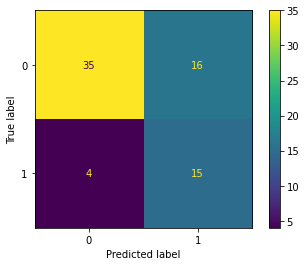

In [120]:
# Asssess the accuracy of your model and explain your key findings
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(score*100))
print("Weighted ROC AUC accuracy: {:.2f} %".format(roc_auc_score(y_test, y_pred, average='weighted')*100))
print("Confusion matrix:")
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Apply k-fold Cross Validation
# from sklearn.model_selection import cross_val_score
# from numpy import ravel
# accuracies = cross_val_score(estimator = classifier, X = x_train_processed, y = ravel(y_train.values), scoring = 'roc_auc_ovo', cv = 10)
# print("K-fold cross validation results")
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Visualise the loss and accuracy for each epoch

In [121]:
# list all data in history
print(my_model.model.history.keys())
# summarize history for accuracy
plt.plot(my_model.model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: ignored

In [ ]:
# summarize history for loss
plt.plot(my_model.model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model is approx 65-70% accurate at predicting whether cancer recurrence will occur.**

**Crucially, the proportion of False Negatives is low (<15%). In cancer diagnosis these are the outcomes that we want to minimise. False Positives, whilst undesirable, will likely lead to further diagnostic testing before it is realised that cancer is not present.**

### Unit tests:

###Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.

In [ ]:
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """
    
    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))
    
    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0

In [ ]:
# run null data unit test on both training and test data
test_no_nulls(x_train_processed)
test_no_nulls(x_test_processed)